## Gobernanza vs exceso de mortalidad 2020-2021

### World Governance Indicators

Los 6 indicadores de governanza fueron recabados del sitio http://info.worldbank.org/governance/wgi/ el cual es mantenido principalmente por Daniel Kaufmann, a continuación se extraen los datos correspondientes a los años de 2020 y 2021.

El proyecto Worldwide Governance Indicators (WGI) informa indicadores de gobernanza agregados e individuales para más de 200 países y territorios durante el período 1996–2021, para seis dimensiones de gobernanza:

    1. Voz y responsabilidad
    2. Estabilidad Política y Ausencia de Violencia/Terrorismo
    3. Efectividad del Gobierno
    4. Calidad regulatoria
    5. Imperio de la ley
    6. Control de la Corrupción

Estos indicadores agregados combinan las opiniones de un gran número de encuestados de empresas, ciudadanos y expertos en países industrializados y en desarrollo. Se basan en más de 30 fuentes de datos individuales producidas por una variedad de institutos de encuestas, grupos de expertos, organizaciones no gubernamentales, organizaciones internacionales y empresas del sector privado.

#### ¿Qué es la Gobernanza?

La gobernanza consiste en las tradiciones e instituciones mediante las cuales se ejerce la autoridad en un país. Esto incluye el proceso por el cual los gobiernos son seleccionados, monitoreados y reemplazados; la capacidad del gobierno para formular e implementar efectivamente políticas sólidas; y el respeto de los ciudadanos y el Estado por las instituciones que rigen las interacciones económicas y sociales entre ellos.

#### Criticas respecto al WGI

Es importante mencionar que existen varias críticas respecto a los análisis que podrían hacerse respecto al WGI, por lo que es importante revisar el trabajo en donde D. Kaufmann responde a varias de estas críticas:
https://papers.ssrn.com/sol3/papers.cfm?abstract_id=965077
Vale la pena considerarlas y hacer un análisis minucioso de ellas.

### Procediendo a cargar la información de los indicadores de governanza y a su procesamiento:

In [1]:
#Cargando librería para leer xlsx
library(readxl)

# Generando función para unificar 6 datasets de cada indicador en uno sólo
curing_governance = function(db){
    ind = grep(colnames(db), pattern = "2020|2021")
    countries = as.data.frame(db[2:nrow(db),1])[,1]
    codes = as.data.frame(db[2:nrow(db),2])[,1]
    db = db[,ind]
    db = db[,as.vector(as.matrix(db[1,])=="Estimate")]
    db = db[-1,]
    colnames(db) = c("Y_2020", "Y_2021")
    db[db=="#N/A"] = NA
    db$country = countries
    db$code = codes
    write.csv(db,"temp.csv")
    db = read.csv("temp.csv",row.names=1)
    return(db)
}

db0 = read_excel("wgidataset.xlsx", sheet = 2, skip = 13)
db0 = curing_governance(db0)
for(i in 3:7){
    db = read_excel("wgidataset.xlsx", sheet = i, skip = 13)
    db = curing_governance(db)
    db0 = merge(db, db0, by=c("country","code"))
}

# Generando nombres correctos para las columnas del dataset
vars = excel_sheets("wgidataset.xlsx")[7:2]
nombres = list()
i = 0
for(var in vars){
    i = i+1
    nombre1 = paste0("Y_2020_", var)
    nombre2 = paste0("Y_2021_", var)
    nombres[[i]] = c(nombre1, nombre2)
}
nombres = unlist(nombres)
colnames(db0)[3:14] = gsub(nombres,pattern=" ",replacement = "")

New names:
• `` -> `...1`
• `` -> `...2`
• `1996` -> `1996...3`
• `1996` -> `1996...4`
• `1996` -> `1996...5`
• `1996` -> `1996...6`
• `1996` -> `1996...7`
• `1996` -> `1996...8`
• `1998` -> `1998...9`
• `1998` -> `1998...10`
• `1998` -> `1998...11`
• `1998` -> `1998...12`
• `1998` -> `1998...13`
• `1998` -> `1998...14`
• `2000` -> `2000...15`
• `2000` -> `2000...16`
• `2000` -> `2000...17`
• `2000` -> `2000...18`
• `2000` -> `2000...19`
• `2000` -> `2000...20`
• `2002` -> `2002...21`
• `2002` -> `2002...22`
• `2002` -> `2002...23`
• `2002` -> `2002...24`
• `2002` -> `2002...25`
• `2002` -> `2002...26`
• `2003` -> `2003...27`
• `2003` -> `2003...28`
• `2003` -> `2003...29`
• `2003` -> `2003...30`
• `2003` -> `2003...31`
• `2003` -> `2003...32`
• `2004` -> `2004...33`
• `2004` -> `2004...34`
• `2004` -> `2004...35`
• `2004` -> `2004...36`
• `2004` -> `2004...37`
• `2004` -> `2004...38`
• `2005` -> `2005...39`
• `2005` -> `2005...40`
• `2005` -> `2005...41`
• `2005` -> `2005...42`
• `200

New names:
• `` -> `...1`
• `` -> `...2`
• `1996` -> `1996...3`
• `1996` -> `1996...4`
• `1996` -> `1996...5`
• `1996` -> `1996...6`
• `1996` -> `1996...7`
• `1996` -> `1996...8`
• `1998` -> `1998...9`
• `1998` -> `1998...10`
• `1998` -> `1998...11`
• `1998` -> `1998...12`
• `1998` -> `1998...13`
• `1998` -> `1998...14`
• `2000` -> `2000...15`
• `2000` -> `2000...16`
• `2000` -> `2000...17`
• `2000` -> `2000...18`
• `2000` -> `2000...19`
• `2000` -> `2000...20`
• `2002` -> `2002...21`
• `2002` -> `2002...22`
• `2002` -> `2002...23`
• `2002` -> `2002...24`
• `2002` -> `2002...25`
• `2002` -> `2002...26`
• `2003` -> `2003...27`
• `2003` -> `2003...28`
• `2003` -> `2003...29`
• `2003` -> `2003...30`
• `2003` -> `2003...31`
• `2003` -> `2003...32`
• `2004` -> `2004...33`
• `2004` -> `2004...34`
• `2004` -> `2004...35`
• `2004` -> `2004...36`
• `2004` -> `2004...37`
• `2004` -> `2004...38`
• `2005` -> `2005...39`
• `2005` -> `2005...40`
• `2005` -> `2005...41`
• `2005` -> `2005...42`
• `200

Warning message in merge.data.frame(db, db0, by = c("country", "code")):
“column names ‘Y_2020.x’, ‘Y_2021.x’, ‘Y_2020.y’, ‘Y_2021.y’ are duplicated in the result”
New names:
• `` -> `...1`
• `` -> `...2`
• `1996` -> `1996...3`
• `1996` -> `1996...4`
• `1996` -> `1996...5`
• `1996` -> `1996...6`
• `1996` -> `1996...7`
• `1996` -> `1996...8`
• `1998` -> `1998...9`
• `1998` -> `1998...10`
• `1998` -> `1998...11`
• `1998` -> `1998...12`
• `1998` -> `1998...13`
• `1998` -> `1998...14`
• `2000` -> `2000...15`
• `2000` -> `2000...16`
• `2000` -> `2000...17`
• `2000` -> `2000...18`
• `2000` -> `2000...19`
• `2000` -> `2000...20`
• `2002` -> `2002...21`
• `2002` -> `2002...22`
• `2002` -> `2002...23`
• `2002` -> `2002...24`
• `2002` -> `2002...25`
• `2002` -> `2002...26`
• `2003` -> `2003...27`
• `2003` -> `2003...28`
• `2003` -> `2003...29`
• `2003` -> `2003...30`
• `2003` -> `2003...31`
• `2003` -> `2003...32`
• `2004` -> `2004...33`
• `2004` -> `2004...34`
• `2004` -> `2004...35`
• `2004` -

Warning message in merge.data.frame(db, db0, by = c("country", "code")):
“column names ‘Y_2020.x’, ‘Y_2021.x’, ‘Y_2020.y’, ‘Y_2021.y’ are duplicated in the result”


In [2]:
# Estructurando dataset en formato long
library(reshape2)
db01 = melt(db0, id = c("country","code"))
db01$year = as.numeric(gsub(db01$variable, pattern = "Y_|_[A-z]*$", replacement = ""))
db01$variable = gsub(db01$variable, pattern = ".*_", replacement = "")
db02 = dcast(db01, formula = country + code + year ~ variable, 
       value.var = "value", 
       fun.aggregate = function(x) sum(x,na.rm = T))
db_wgi= db02[!is.na(db02$year),]
db_wgi$country = as.factor(gsub(db_wgi$country, pattern = " ", replacement = ""))
db_wgi$code = as.factor(db_wgi$code)
db_wgi$year = as.factor(db_wgi$year)
head(db_wgi)
summary(db_wgi)

country     code year ControlofCorruption GovernmentEffectiveness
1 Afghanistan AFG  2020 -1.4805378          -1.585144877           
2 Afghanistan AFG  2021 -1.1423769          -1.634369612           
3 Albania     ALB  2020 -0.5519311          -0.124956653           
4 Albania     ALB  2021 -0.5559242          -0.003363639           
5 Algeria     DZA  2020 -0.6450683          -0.544885635           
6 Algeria     DZA  2021 -0.6141844          -0.620759845           
  PoliticalStabilityNoViolence RegulatoryQuality RuleofLaw 
1 -2.70502973                  -1.4027610        -1.8198975
2 -2.52985525                  -1.3380222        -1.8714361
3  0.08755231                   0.2358646        -0.3491652
4  0.10944585                   0.1927540        -0.2561009
5 -0.84025383                  -1.3392982        -0.7931003
6 -0.87646502                  -1.1708724        -0.8160400
  VoiceandAccountability
1 -1.07773638           
2 -1.57088327           
3  0.08836246           
4  0.09120497           
5 -1.08801770           
6 -1.00951934

          country         code       year     ControlofCorruption
 Afghanistan  :  2   ABW    :  2   2020:214   Min.   :-1.9165    
 Albania      :  2   ADO    :  2   2021:214   1st Qu.:-0.7423    
 Algeria      :  2   AFG    :  2              Median :-0.1082    
 AmericanSamoa:  2   AGO    :  2              Mean   : 0.0000    
 Andorra      :  2   AIA    :  2              3rd Qu.: 0.6809    
 Angola       :  2   ALB    :  2              Max.   : 2.3662    
 (Other)      :416   (Other):416                                 
 GovernmentEffectiveness PoliticalStabilityNoViolence RegulatoryQuality  
 Min.   :-2.38261        Min.   :-2.7081              Min.   :-2.351887  
 1st Qu.:-0.71769        1st Qu.:-0.6089              1st Qu.:-0.738851  
 Median :-0.05966        Median : 0.1006              Median :-0.004591  
 Mean   : 0.00000        Mean   : 0.0000              Mean   : 0.000000  
 3rd Qu.: 0.72950        3rd Qu.: 0.8576              3rd Qu.: 0.798667  
 Max.   : 2.32486        Max

In [40]:
length(unique(db_wgi$country))

[1] 214

### Estadística descriptiva de nuestras variables de gobernanza

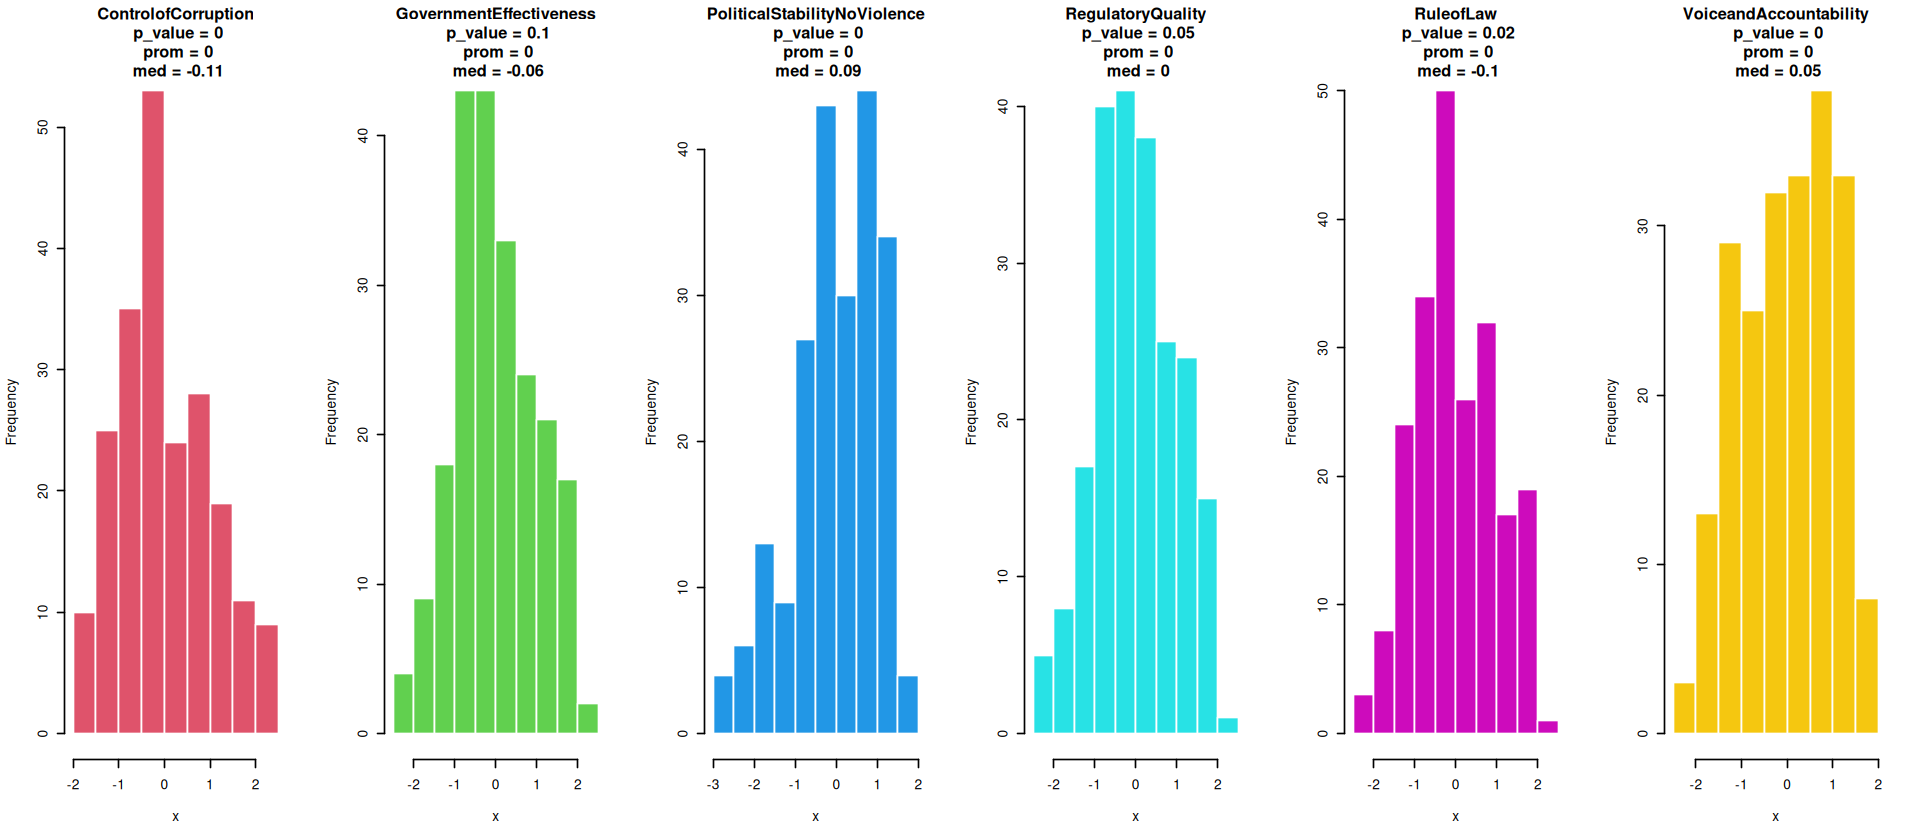

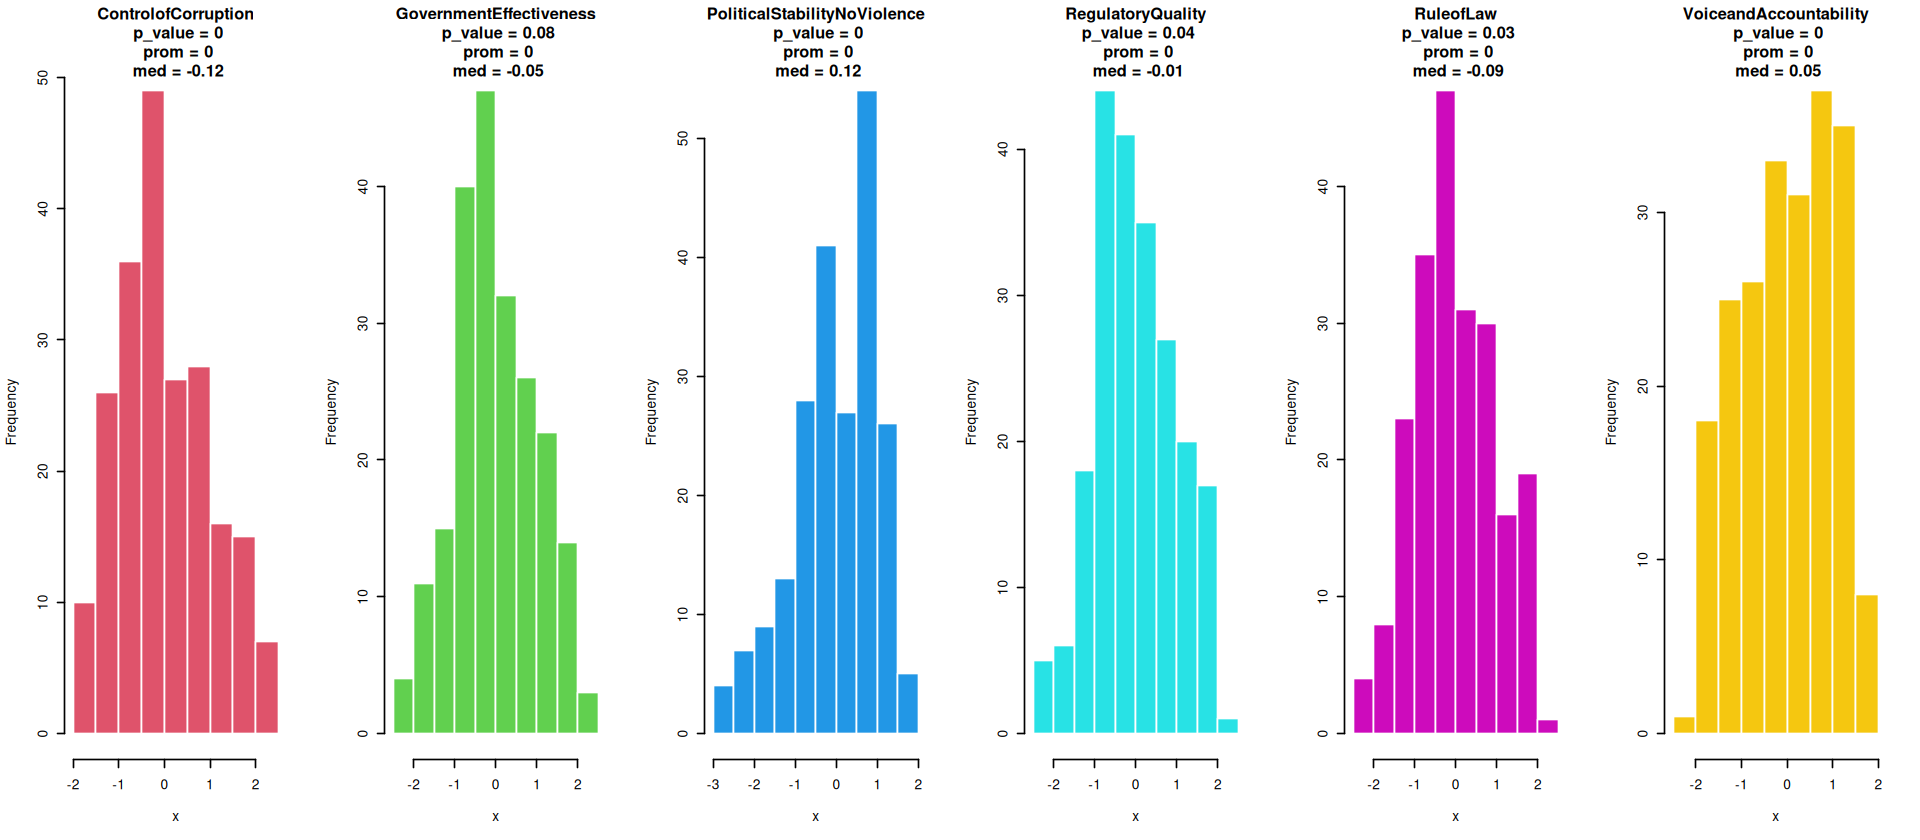

In [3]:
options(repr.plot.width = 16, repr.plot.height = 7)
db_wgi_20 = db_wgi[db_wgi$year == 2020,]
db_wgi_21 = db_wgi[db_wgi$year == 2021,]
par(mfrow=c(1,6))
variable = colnames(db_wgi_20)[4:9]
i = 1
l20 = lapply(db_wgi_20[,4:9], function(x){
  i <<- i + 1
  p = round(shapiro.test(x)$p.value, digits = 2)
  prom = round(mean(x), digits = 2)
  mediana = round(median(x), digits = 2)
  hist(x, col = i, border = "white", main = paste0("\n",variable[i-1], "\n p_value = ", p, "\n prom = ", prom, "\n med = ", mediana))
  
})
j = 1
l21 = lapply(db_wgi_21[,4:9], function(x){
  j <<- j + 1
  p = round(shapiro.test(x)$p.value, digits = 2)
  prom = round(mean(x), digits = 2)
  mediana = round(median(x), digits = 2)
  hist(x, col = j, border = "white", main = paste0("\n", variable[j-1], "\n p_value = ", p, "\n prom = ", prom, "\n med = ", mediana))
}) 

corrplot 0.92 loaded



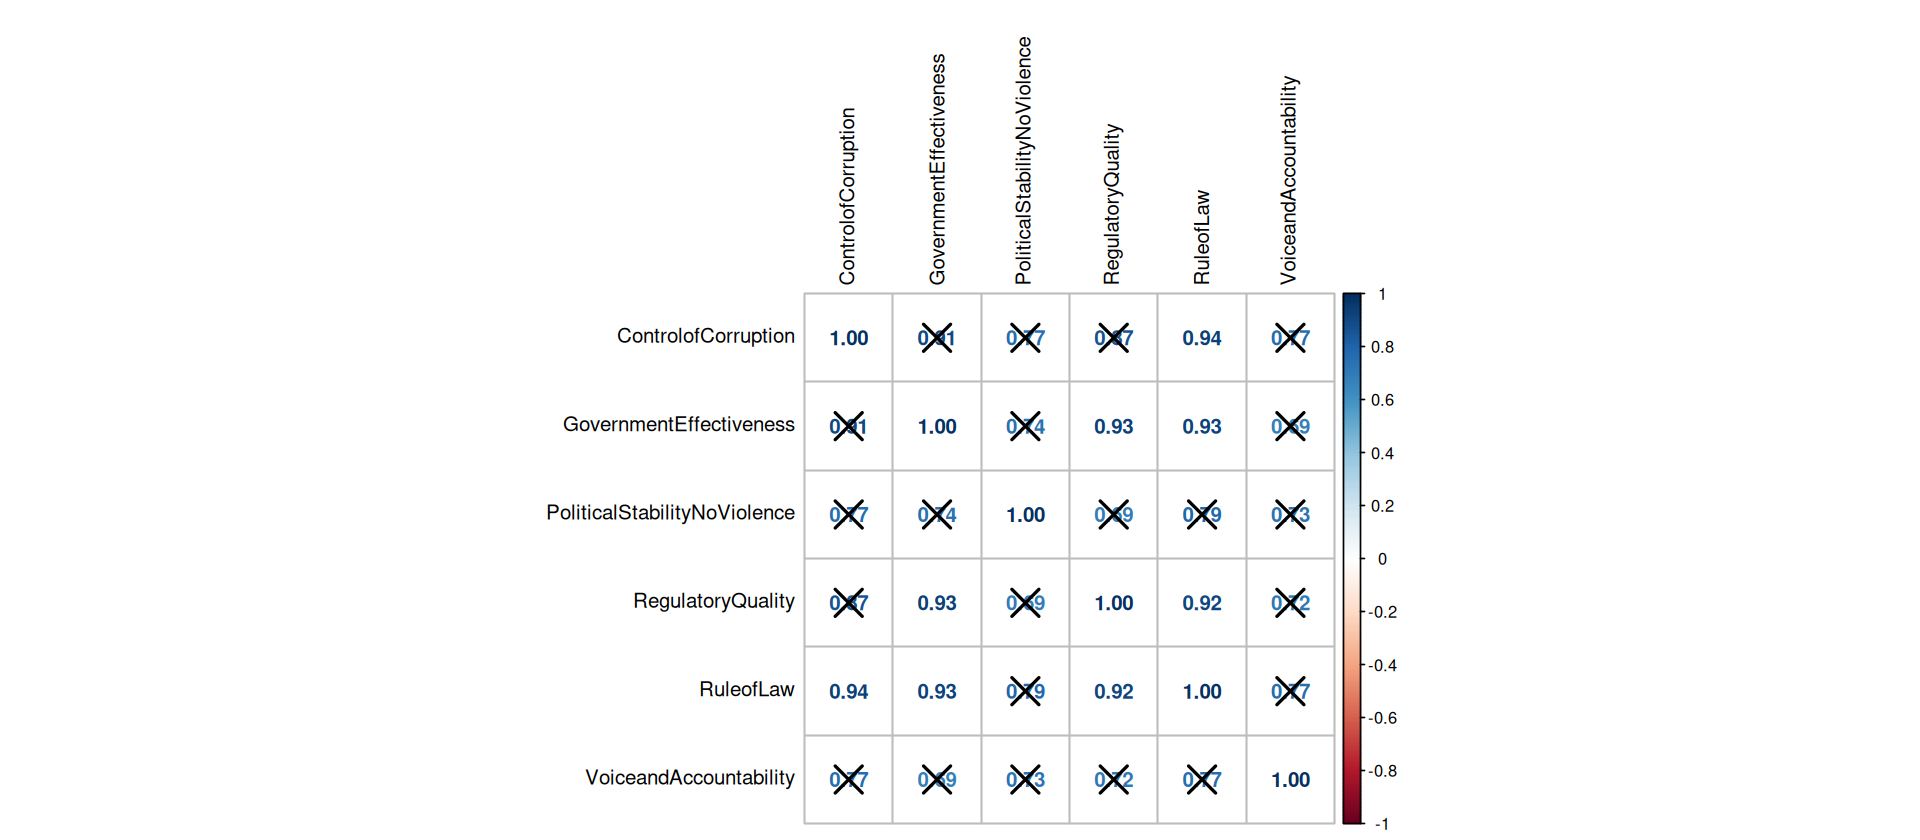

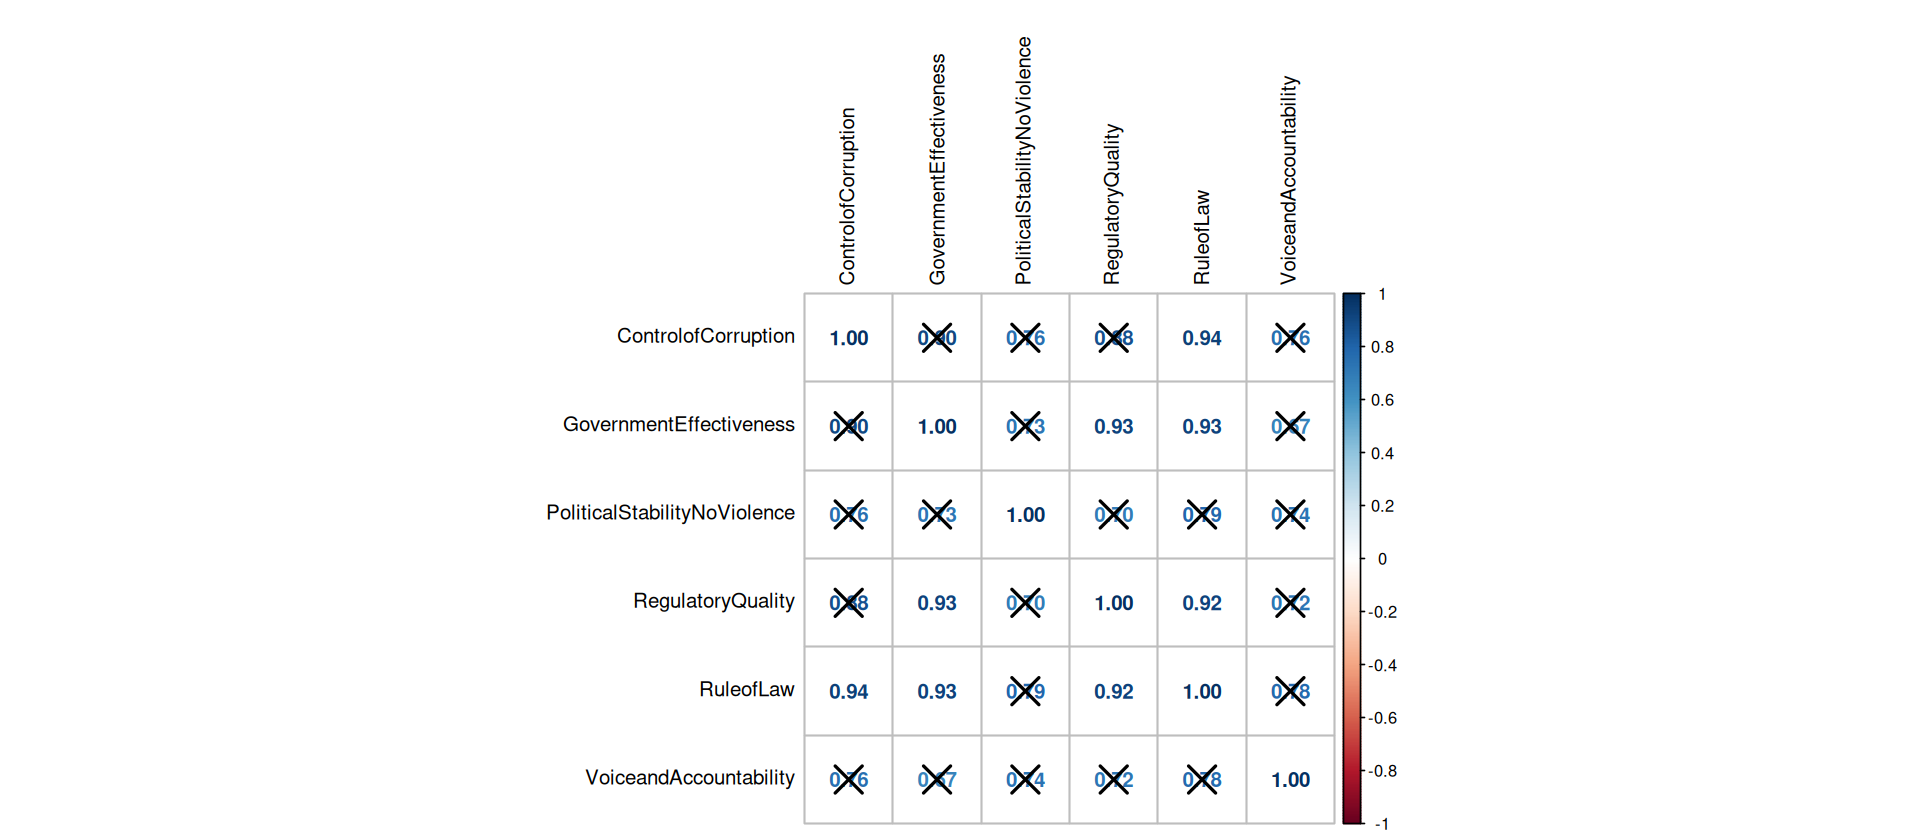

In [4]:
library(corrplot)
p_20 = cor.mtest(cor(db_wgi_20[,4:9]))$p
corrplot(cor(db_wgi_20[,4:9]), p.mat = p_20, method = "number",tl.col = "black")
p_21 = cor.mtest(cor(db_wgi_20[,4:9]))$p
corrplot(cor(db_wgi_21[,4:9]), p.mat = p_21, method = "number",tl.col = "black")

In [5]:
test = shapiro.test(db_wgi_20[,4])
names(test)

[1] "statistic" "p.value"   "method"    "data.name"

### Creando catálogo de países y códigos

In [6]:
cata_coun_code = db_wgi[!duplicated(db_wgi$country),c("country", "code")]
rownames(cata_coun_code) = 1:nrow(cata_coun_code)

### Mostrando el top 10 de países con los peores indicadores durante 2020 y 2021 para los 6 indicadores:

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


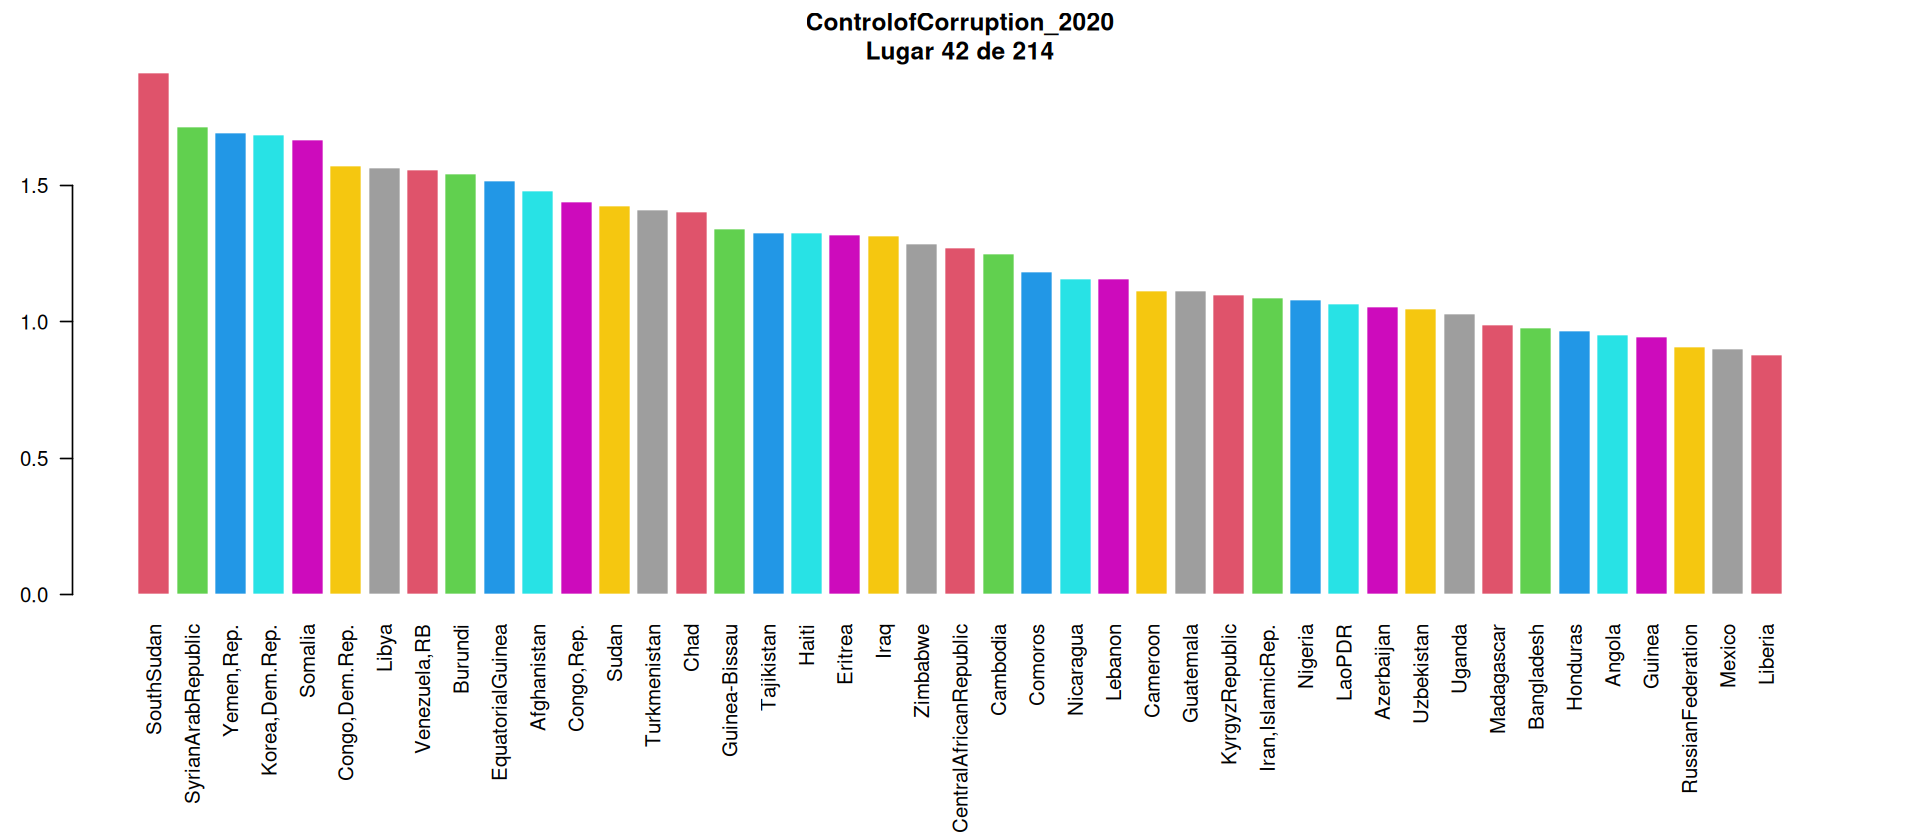

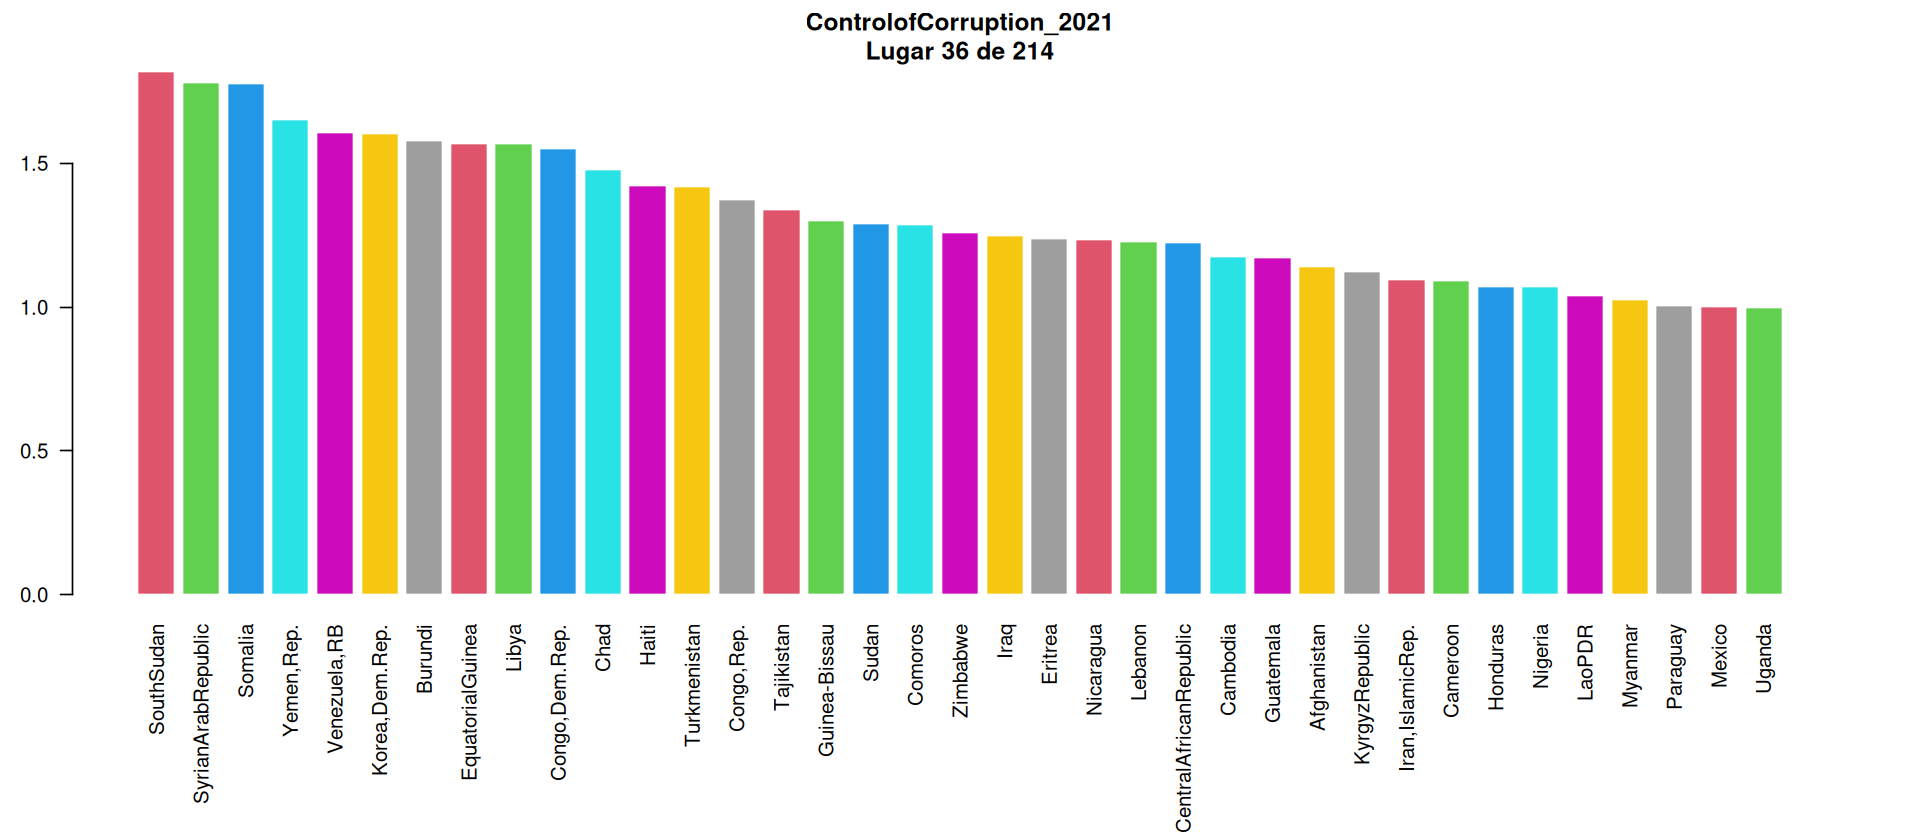

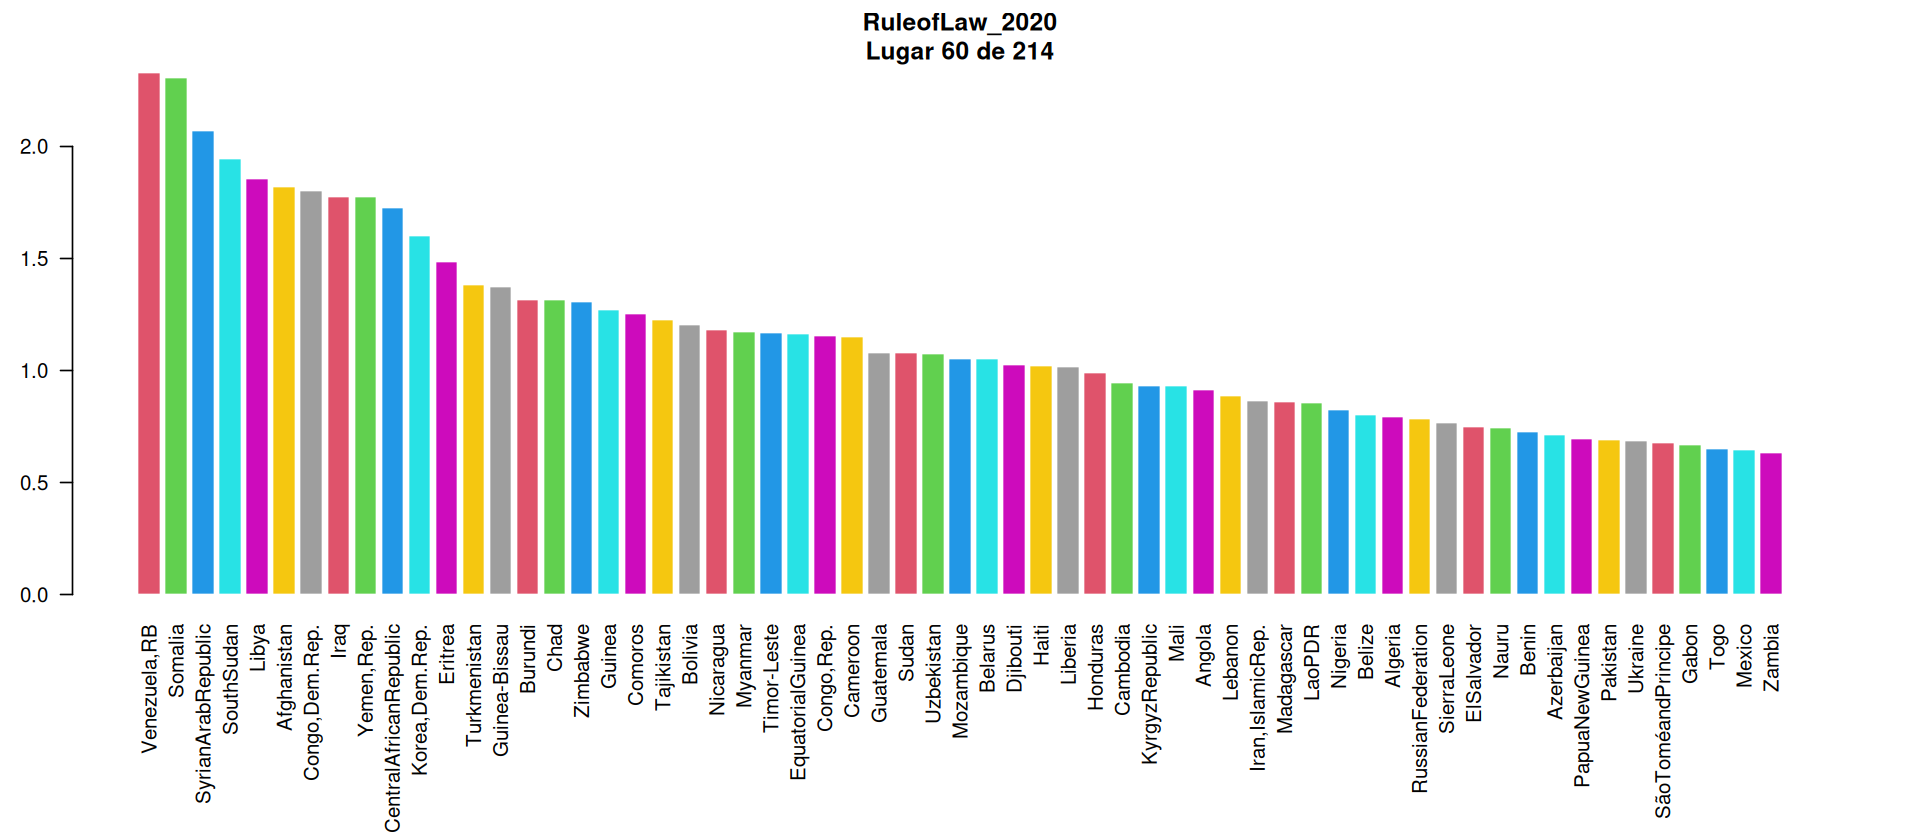

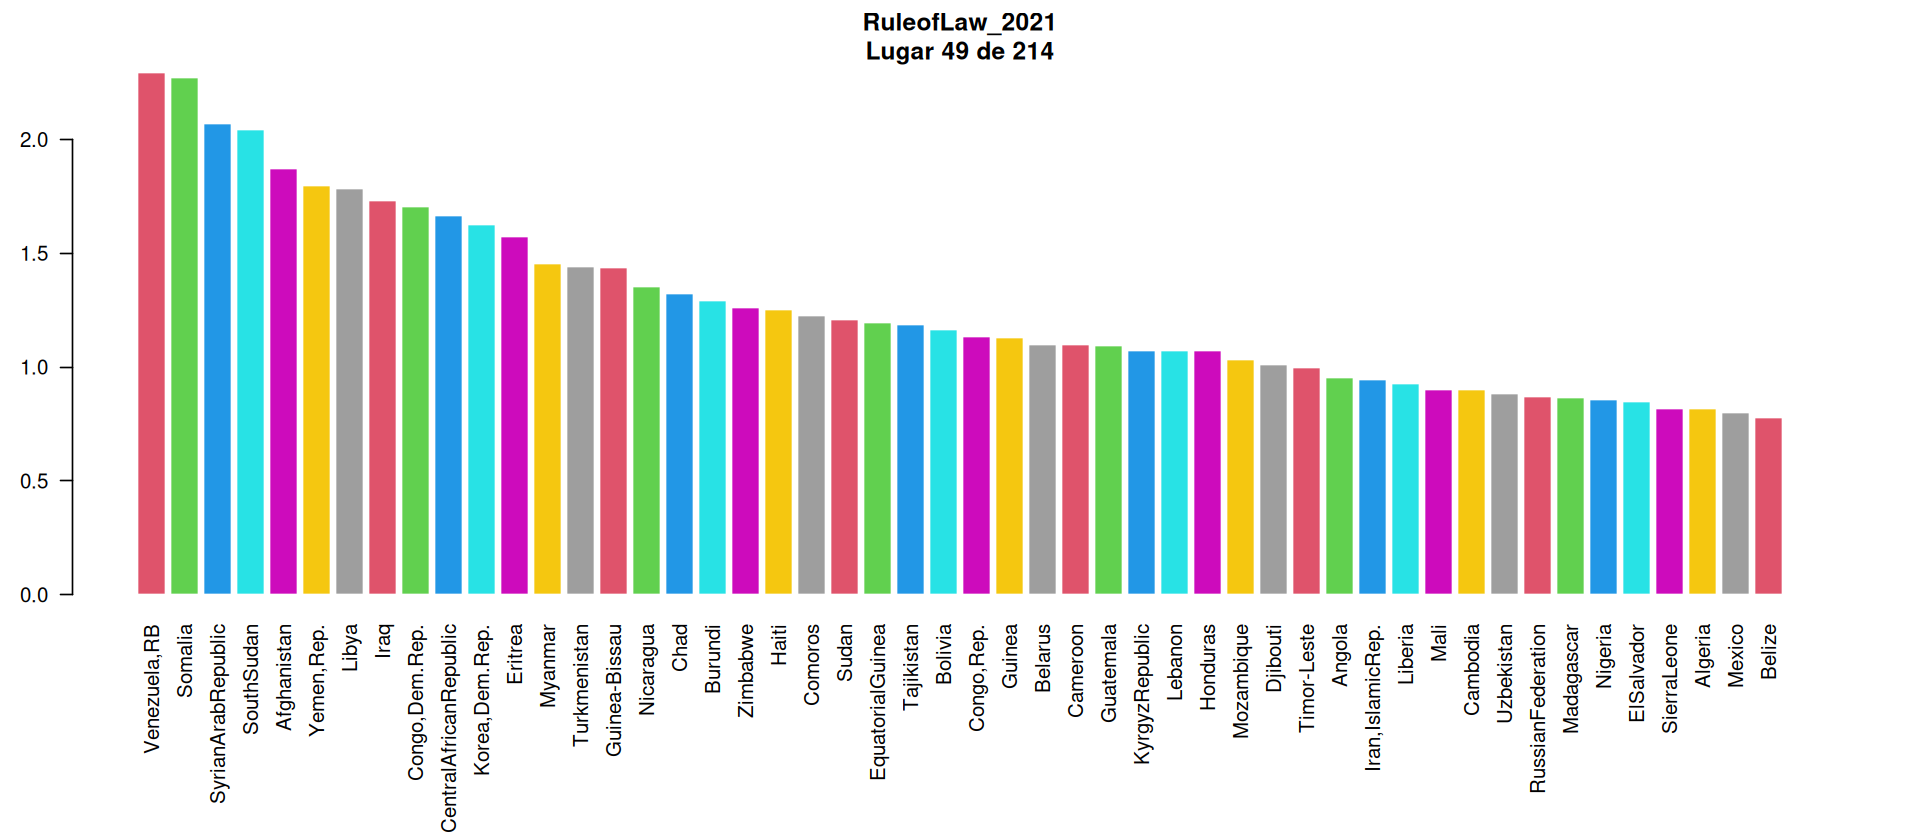

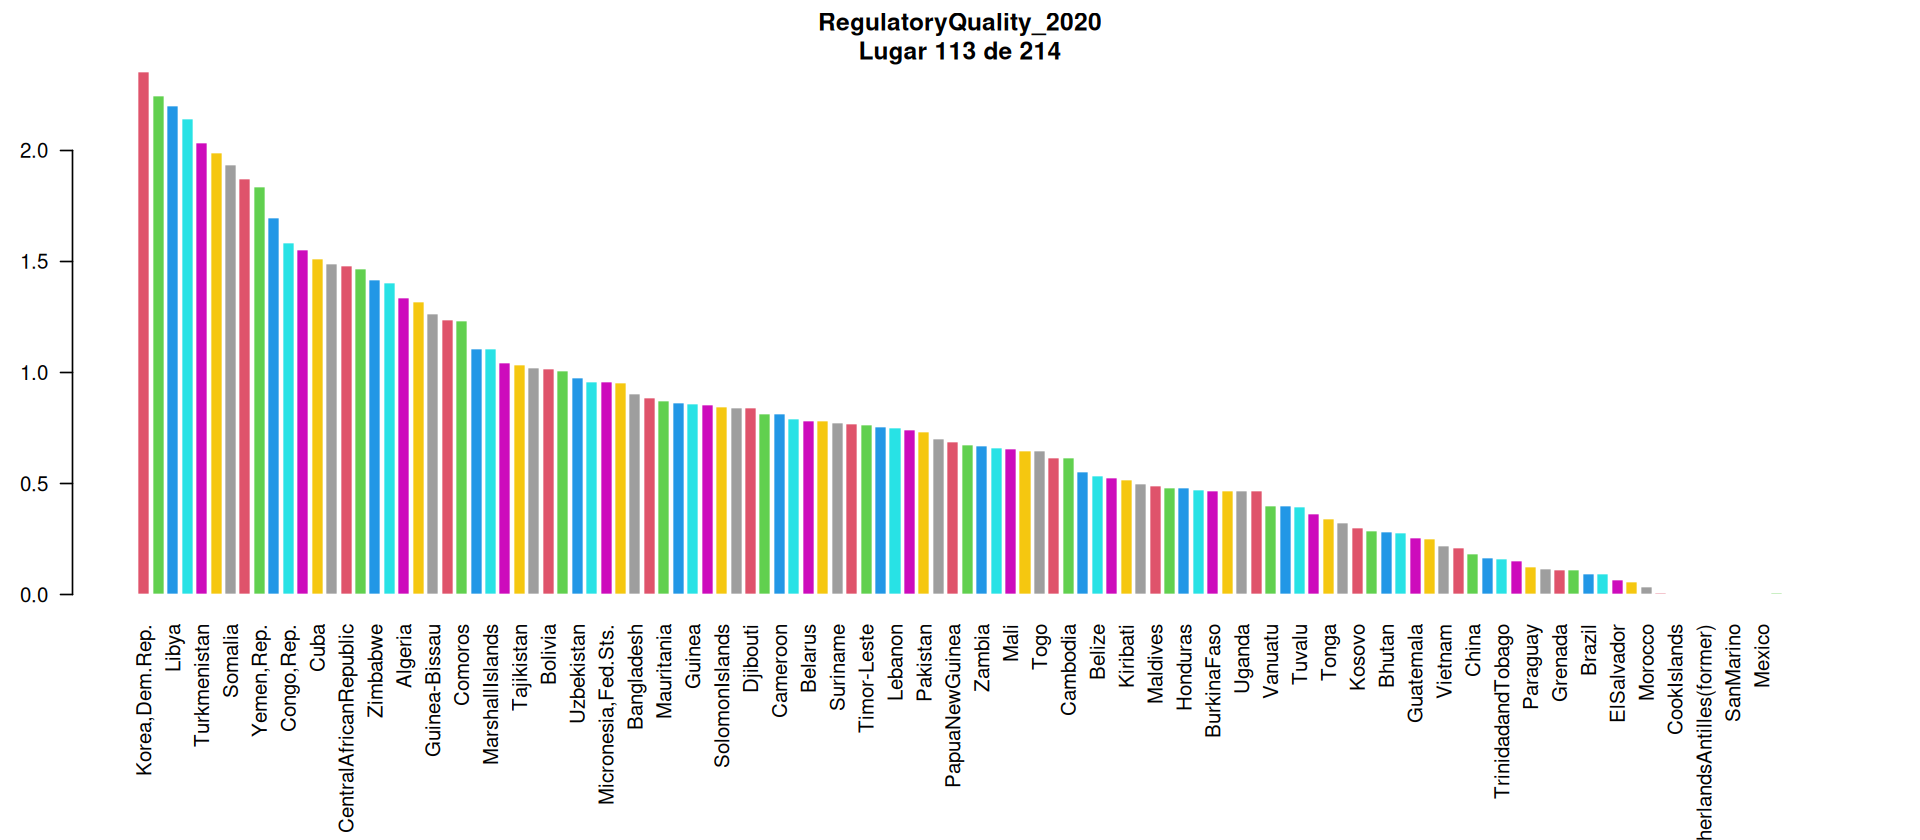

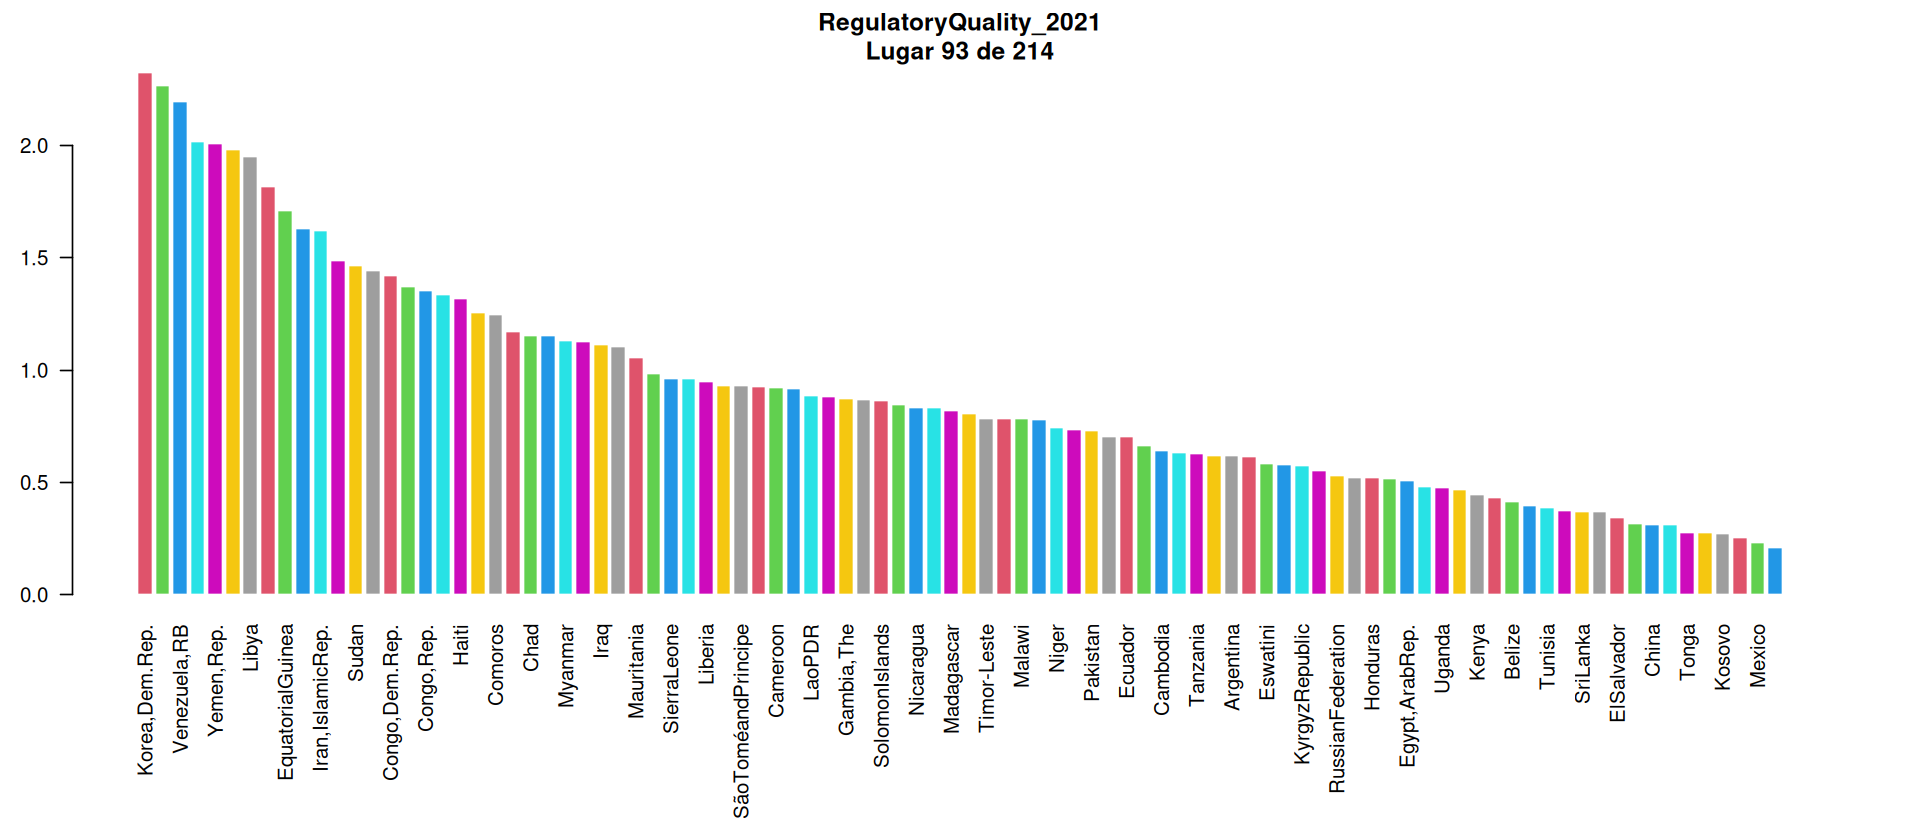

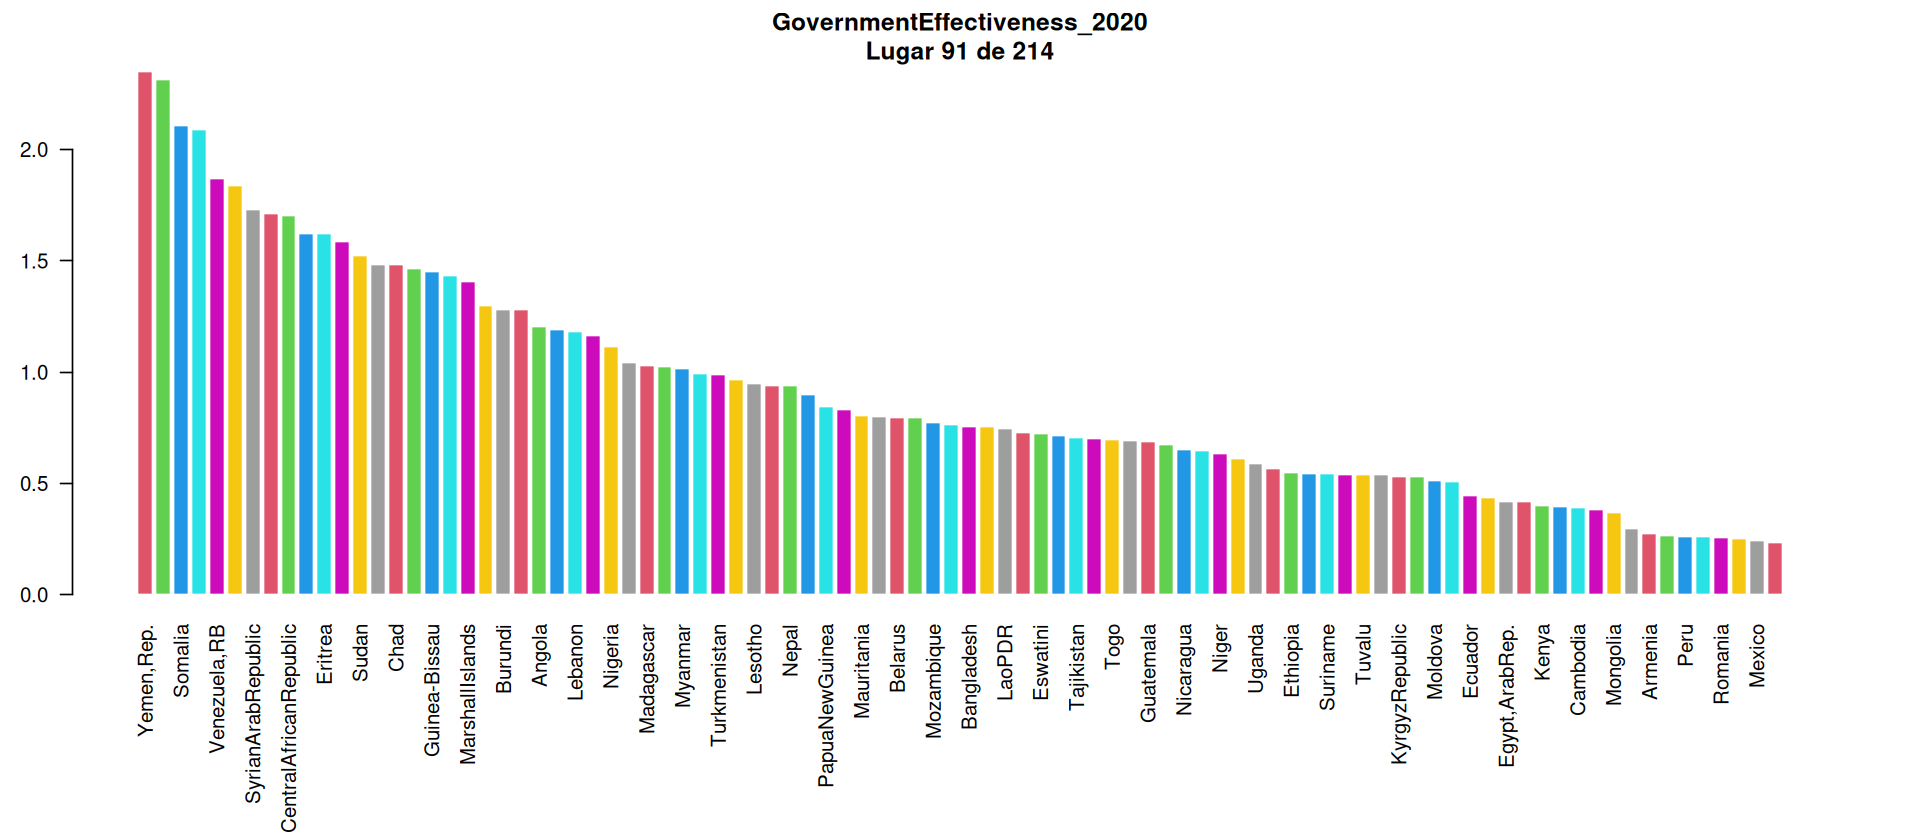

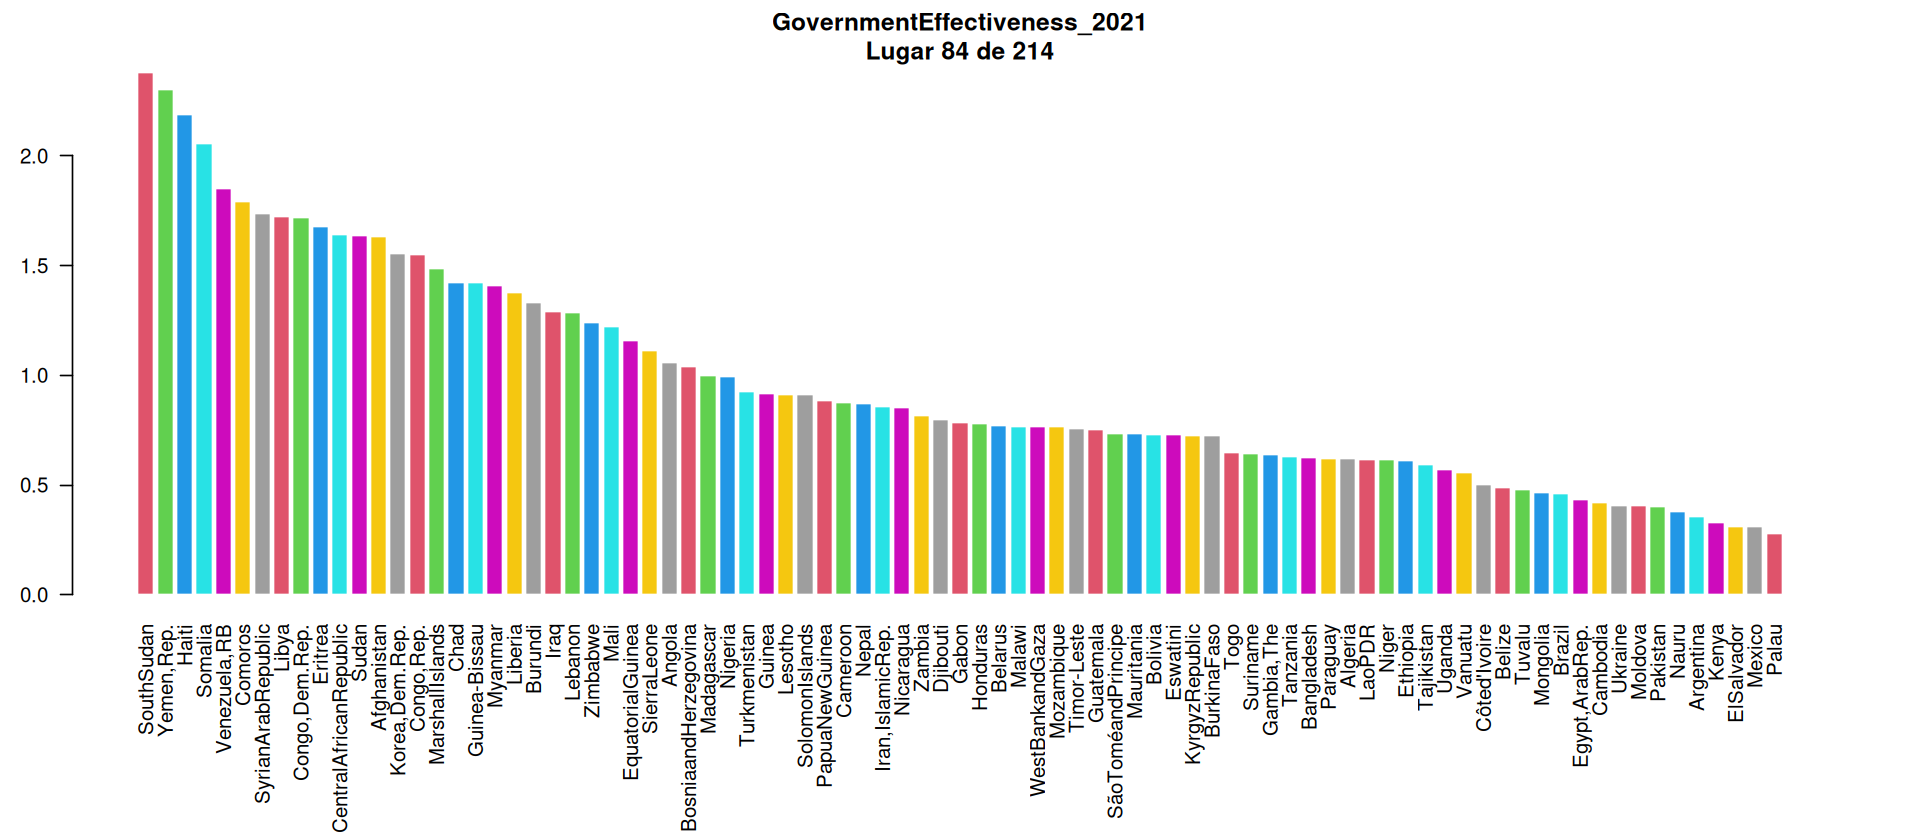

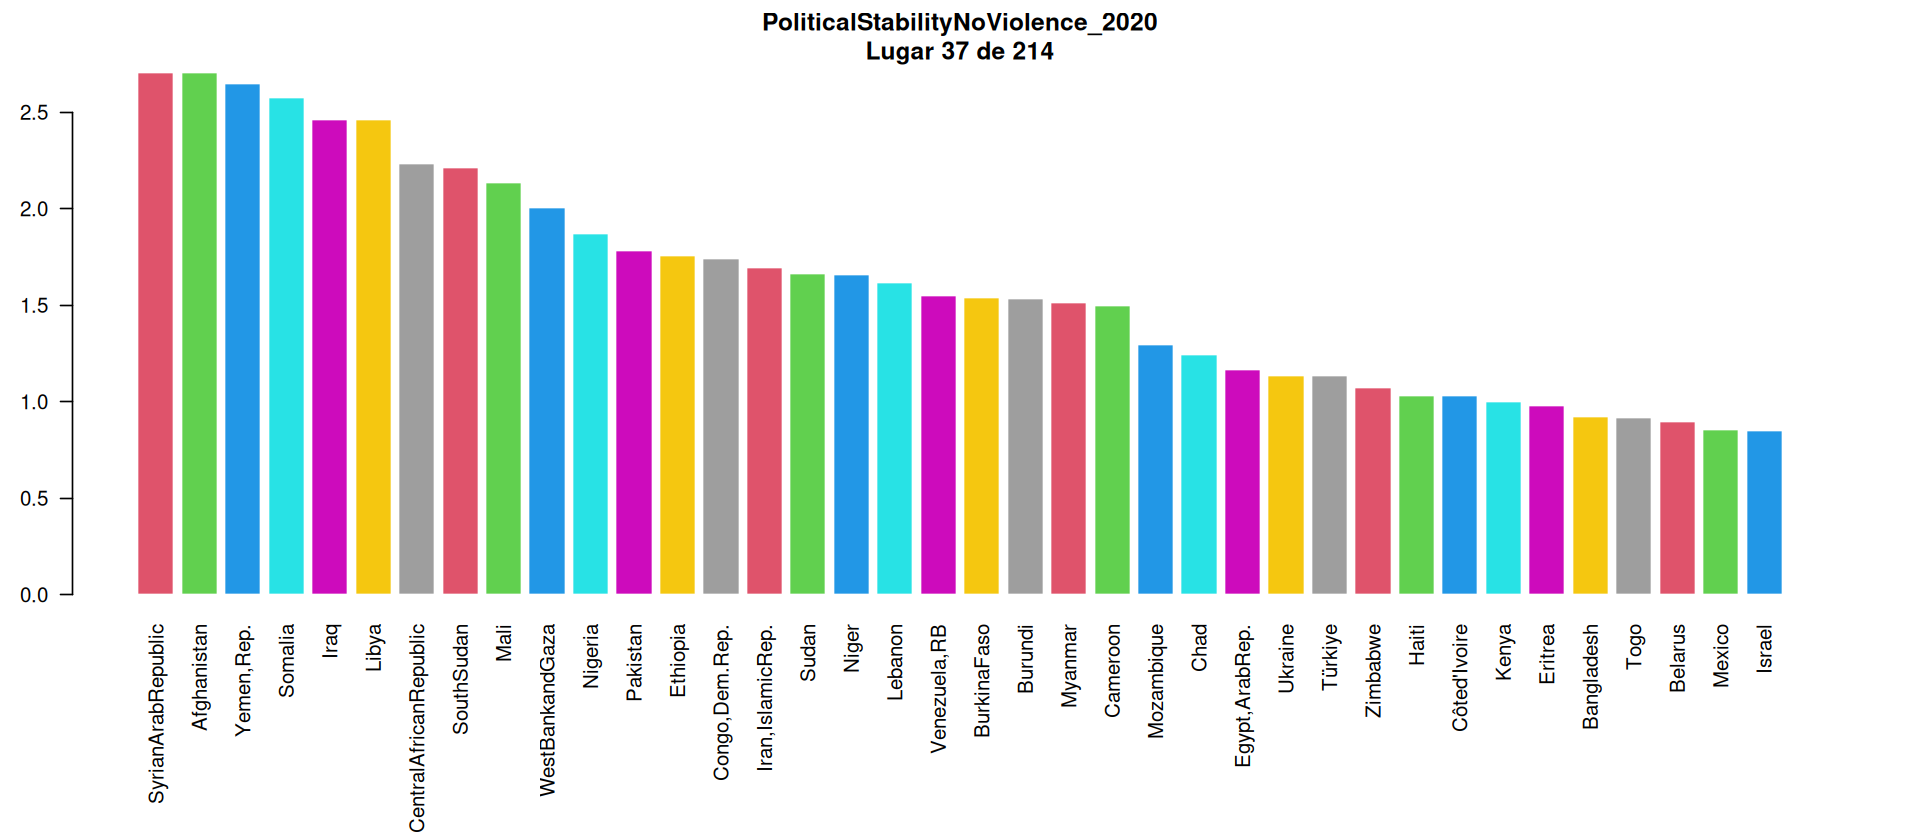

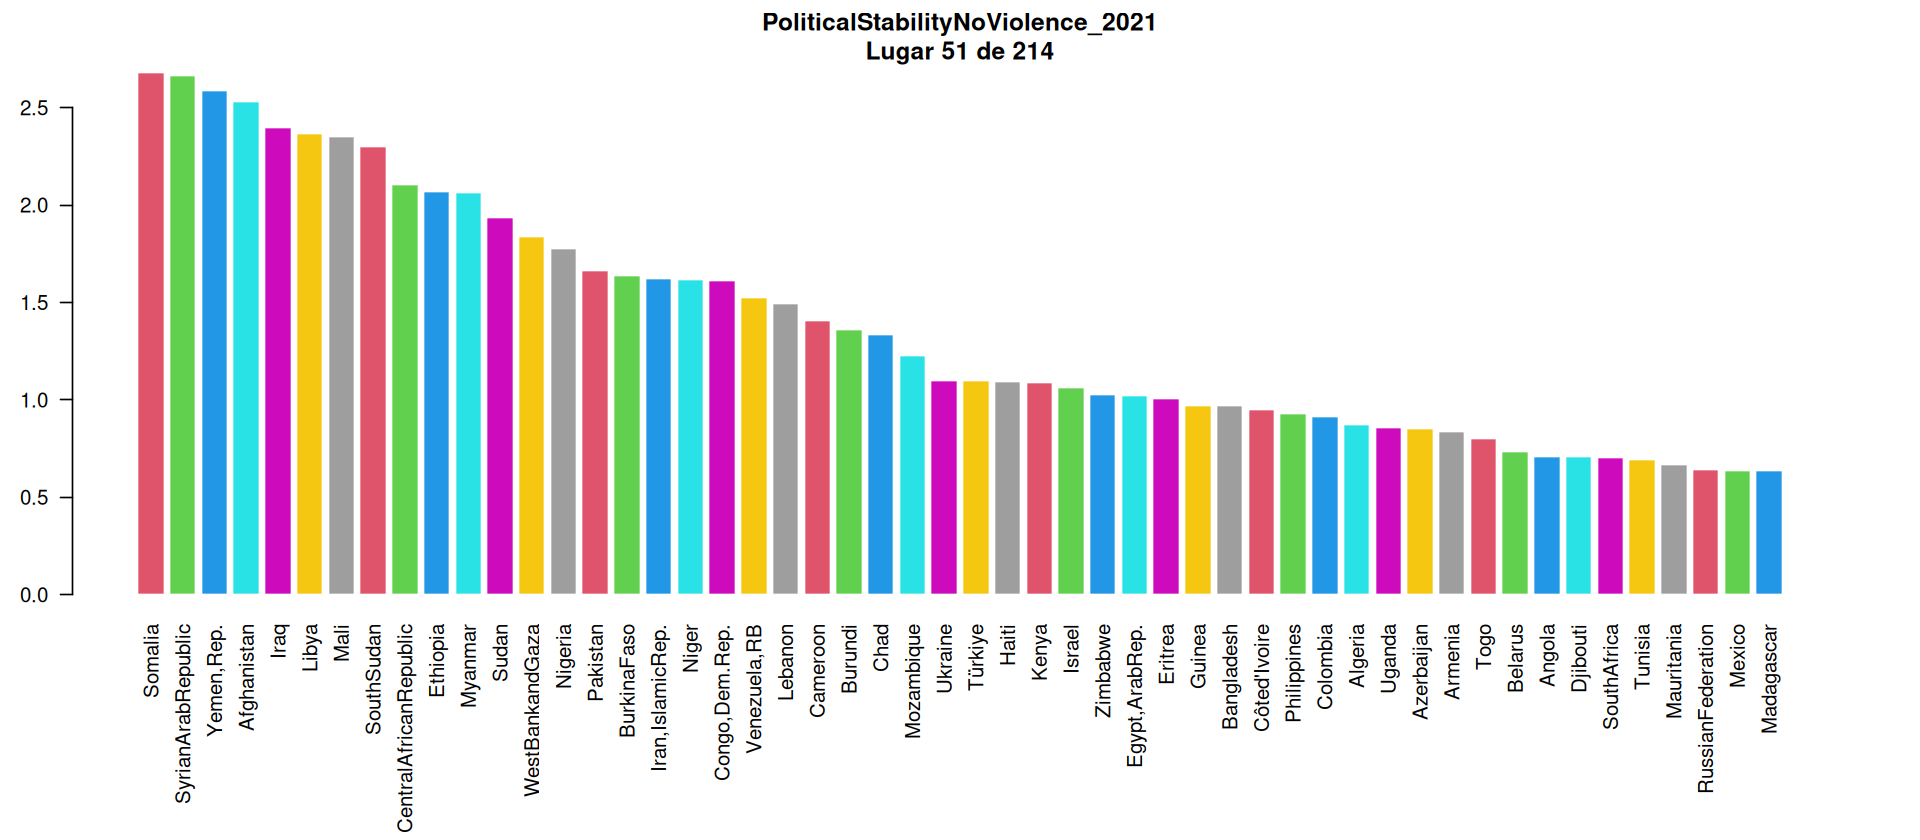

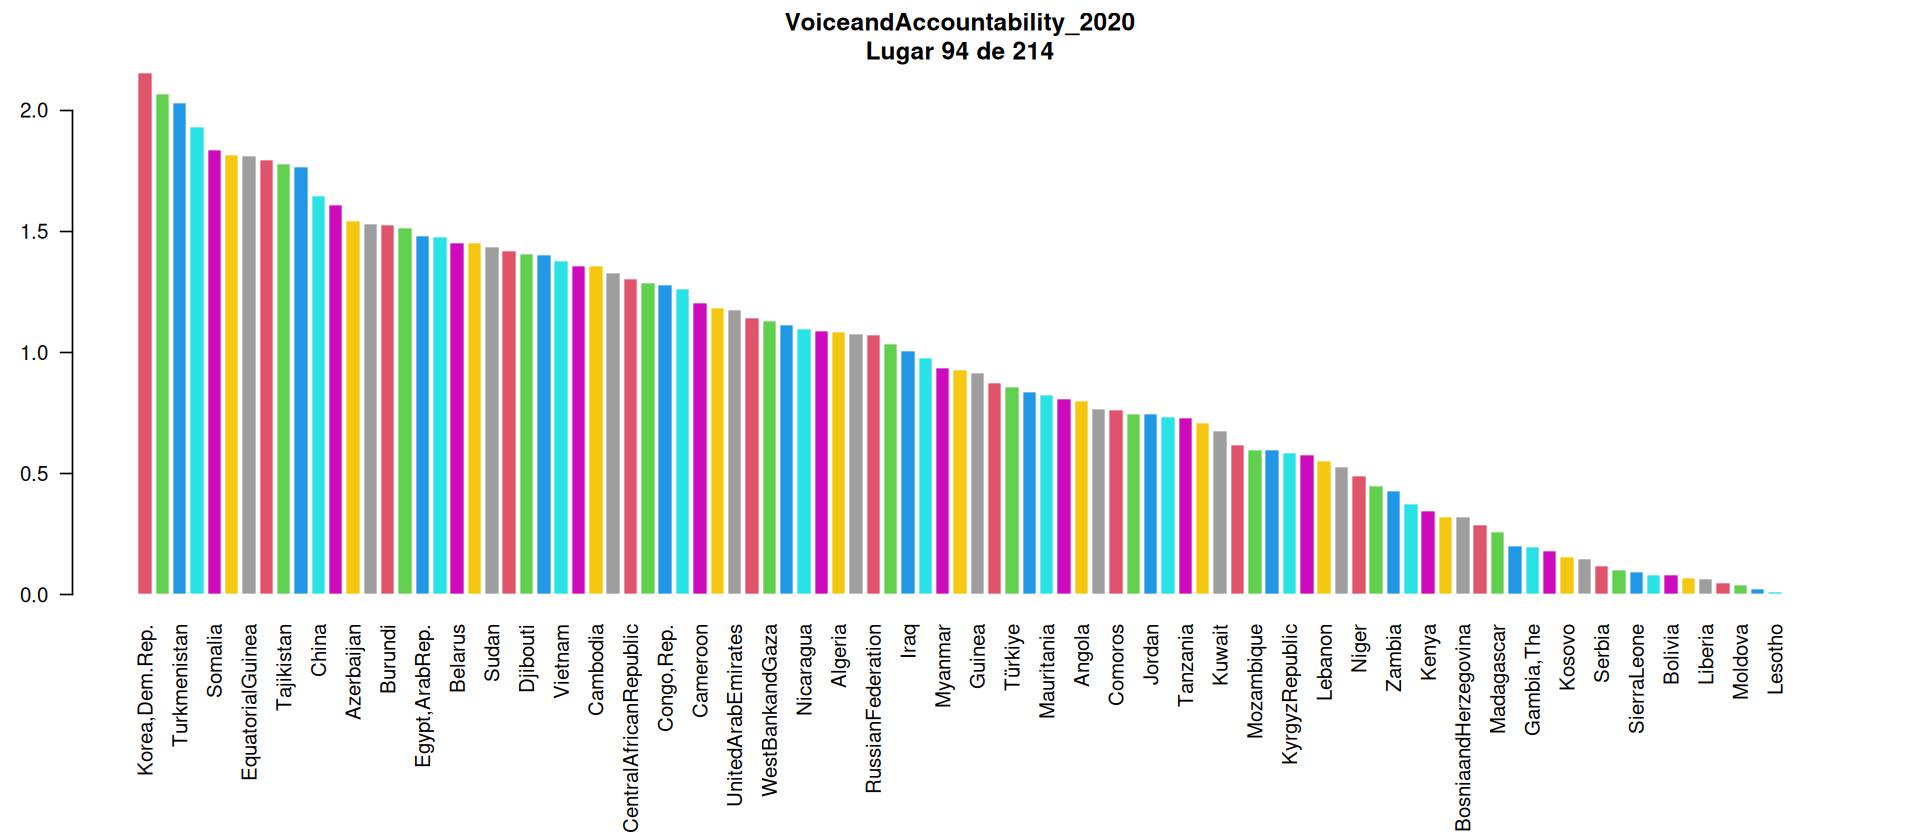

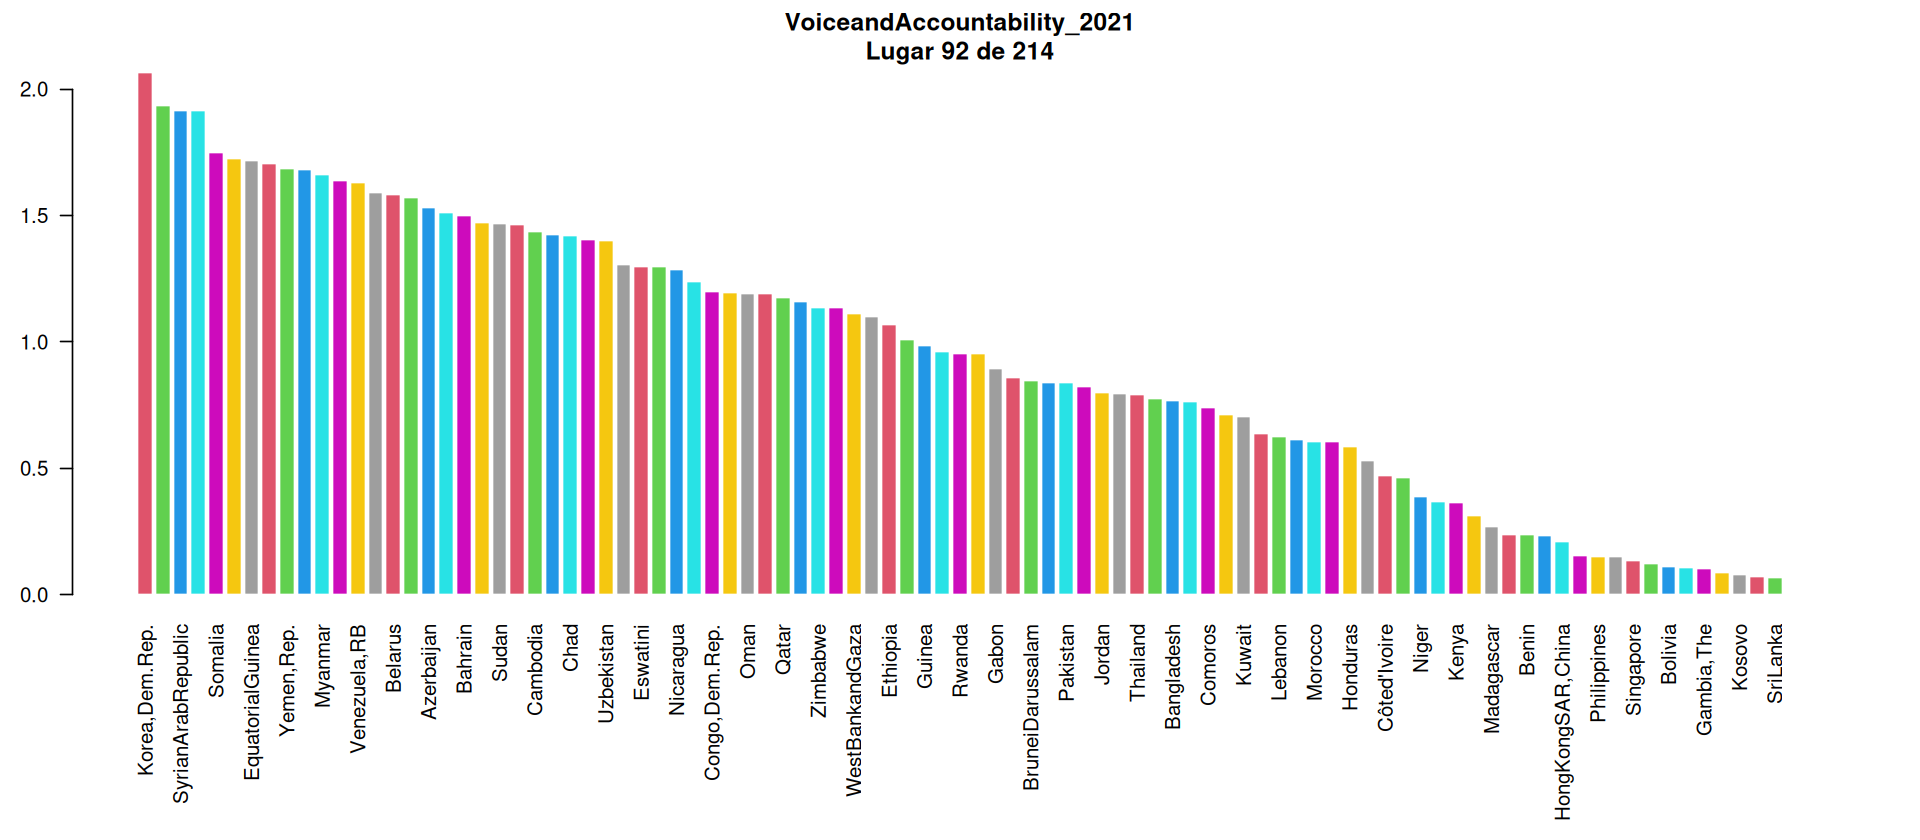

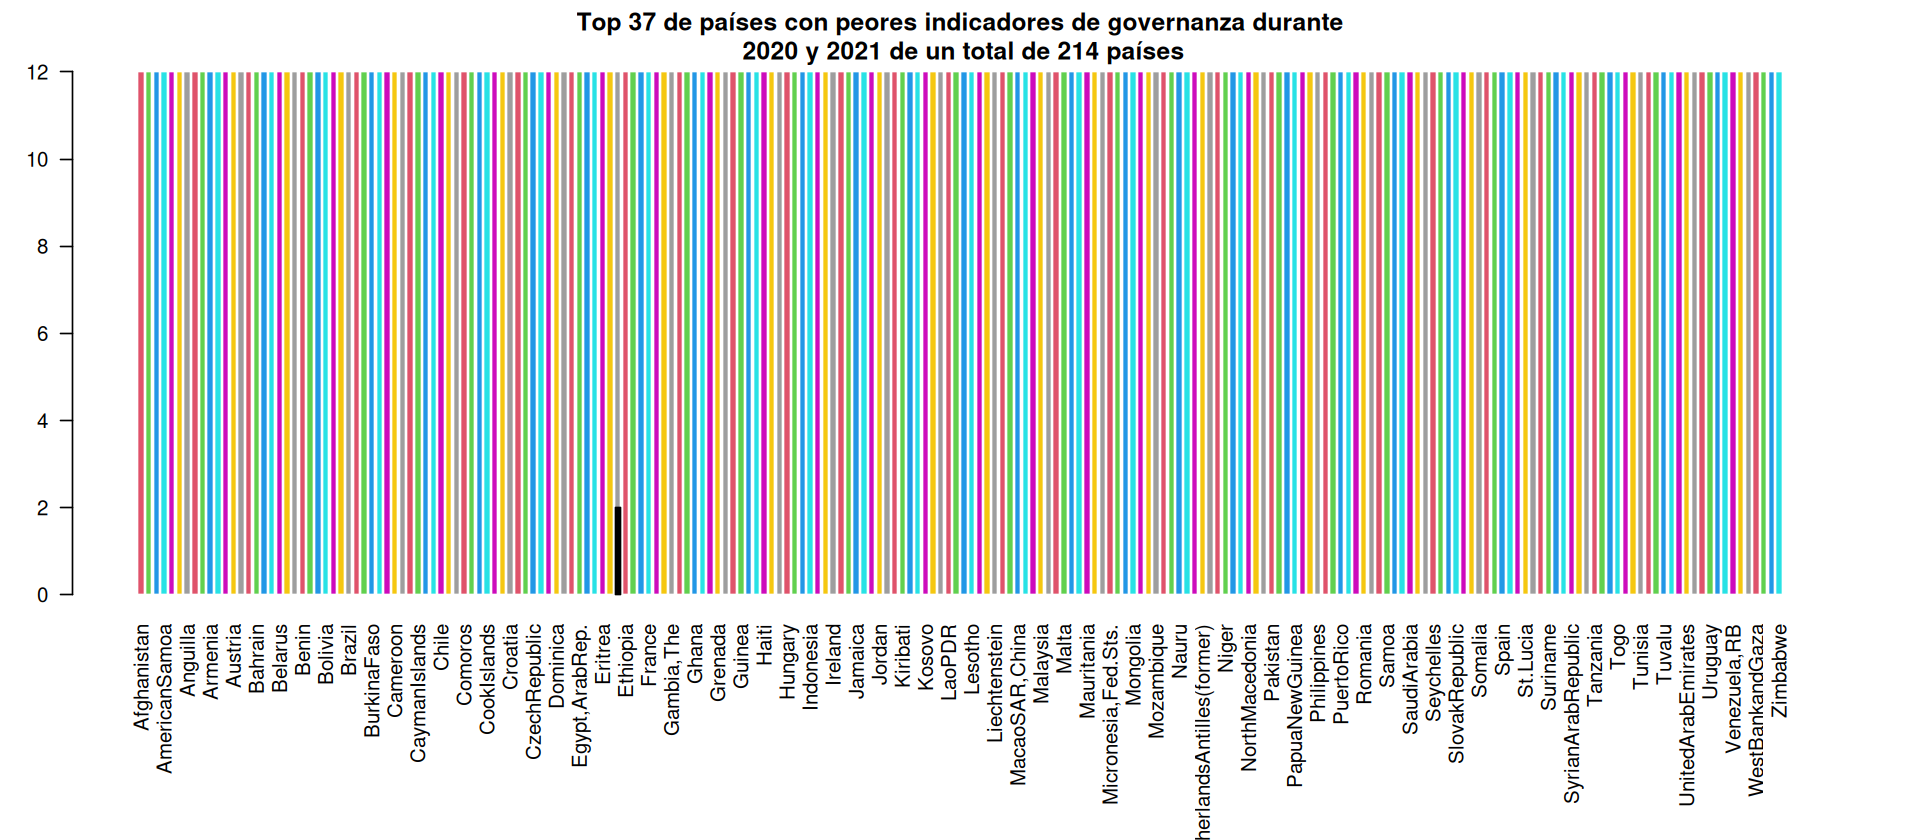

In [7]:
options(repr.plot.width = 16, repr.plot.height = 7)
library(tidyverse)

n_top = 10
lista_countries = list()
numero = 0

for(nombre in unique(db01$variable)){
    for(y in 2020:2021){
        numero = numero+1
        db_wgi_o = db_wgi[order(db_wgi[,nombre]),]
        db_wgi_o_y = db_wgi_o[db_wgi_o$year == y,]
        countries_top_bad_gov = as.character(db_wgi_o_y$country)
        par(mar = c(10,3,3,3))
        ind_mex = grep(countries_top_bad_gov, pattern = "Mexico", ignore.case = T)
        #print(grep(countries_top_bad_gov, pattern = "united", ignore.case = T, value = T))
        #png(paste0(nombre,"_",y,".png"), res =800, width = 12, height = 8)
        barplot(abs(head(db_wgi_o_y[,nombre], ind_mex+1)), 
                names.arg = head(db_wgi_o_y$country,ind_mex+1),
               las = 2,
               col = 2:8,
               border = "white",
               main = paste0(nombre,"_",y, "\nLugar ",ind_mex," de ", length(countries_top_bad_gov)))
        #dev.off()
        lista_countries[[numero]] = countries_top_bad_gov
    }

}
tabla_top_countries_bad = table(unlist(lista_countries))
tabla_top_countries_bad_o = tabla_top_countries_bad[order(tabla_top_countries_bad, decreasing = T)]

par(mar = c(10,3,3,3))
barplot(tabla_top_countries_bad_o, 
        las = 2, 
        col = 2:8, 
        border = "white",
        main = "Top 37 de países con peores indicadores de governanza durante\n 2020 y 2021 de un total de 214 países"
       )
rect(74.7, 0, 75.5, 2, col = 1)

### Cargando datos del exceso de mortalidad por Covid 19 para 2020 y 2021, estos datos fueron descargados de https://ourworldindata.org/excess-mortality-covid

El exceso de mortalidad en este trabajo se reporta utilizando el **P-score**:

El **P-score**: una medida del exceso de mortalidad que es más comparable entre países

El número bruto de muertes en exceso nos da una idea de la escala, pero es menos comparable entre países debido a las grandes diferencias en la población. Para facilitar las comparaciones entre países, medimos el exceso de mortalidad como la diferencia porcentual entre el número de muertes informado y proyectado. Esta métrica se llama **P-score** y la calculamos como:

$$P-score = {{Muertes~reportadas~-Muertes~proyectadas}\over{Muertes~proyectadas}}*100$$

Por ejemplo, si un país tuviera una puntuación P del 100 % en una semana determinada en 2020, eso significaría que el recuento de muertes para esa semana fue un 100 % más alto que, es decir, el doble, el recuento de muertes proyectado para esa semana.

Ícono de validado por la comunidad


Los datos de exceso de mortalidad fueron colapsados por año utilizando su media, su mediana, su máximo, su mínimo y su agregado.

In [8]:
library(tidyverse)

db1 = read.csv("excess-mortality-p-scores-projected-baseline.csv")
db1$Day = as.Date(db1$Day)
db1$year = year(db1$Day)
db_mort_ex = db1 %>%
    group_by(Code, year) %>%
    summarise(median_mort_excess = median(p_proj_all_ages, na.rm = T),
              mean_mort_excess = mean(p_proj_all_ages, na.rm = T),
              min_mort_excess = min(p_proj_all_ages, na.rm = T),
              max_mort_excess = max(p_proj_all_ages, na.rm = T),
              agg_mort_excess = sum(p_proj_all_ages, na.rm = T)) %>%
    filter(year == 2020  | year == 2021)
colnames(db_mort_ex)[1] = "code"
db_mort_ex$code = as.factor(db_mort_ex$code)
db_mort_ex$year = as.factor(db_mort_ex$year)
db_mort_ex = merge(cata_coun_code, db_mort_ex, by = "code")
head(db_mort_ex)
summary(db_mort_ex)

`summarise()` has grouped output by 'Code'. You can override using the
`.groups` argument.


code country            year median_mort_excess mean_mort_excess
1 ABW  Aruba              2021 37.415             43.83250        
2 ABW  Aruba              2020  7.550              9.72000        
3 ALB  Albania            2020 16.955             27.99500        
4 ALB  Albania            2021 38.335             40.43333        
5 ARE  UnitedArabEmirates 2020 -0.180             13.21667        
6 ARG  Argentina          2020  2.310             10.91417        
  min_mort_excess max_mort_excess agg_mort_excess
1 -11.94          120.18          525.99         
2 -24.32           59.84          116.64         
3 -10.16          120.15          335.94         
4   4.20           92.80          485.20         
5 -18.47          116.97          158.60         
6 -14.65           45.20          130.97

      code                  country      year     median_mort_excess
 ABW    :  2   Albania          :  2   2020:114   Min.   :-18.180   
 ALB    :  2   AntiguaandBarbuda:  2   2021:110   1st Qu.:  1.680   
 ARG    :  2   Argentina        :  2              Median :  7.617   
 ARM    :  2   Armenia          :  2              Mean   : 10.780   
 ATG    :  2   Aruba            :  2              3rd Qu.: 18.624   
 AUS    :  2   Australia        :  2              Max.   : 47.790   
 (Other):212   (Other)          :212                                
 mean_mort_excess min_mort_excess   max_mort_excess  agg_mort_excess 
 Min.   :-20.14   Min.   :-95.920   Min.   : -4.69   Min.   :-308.4  
 1st Qu.:  4.06   1st Qu.:-17.560   1st Qu.: 34.94   1st Qu.: 101.1  
 Median : 12.73   Median :-11.210   Median : 61.09   Median : 272.7  
 Mean   : 15.92   Mean   :-12.806   Mean   : 69.58   Mean   : 429.0  
 3rd Qu.: 26.49   3rd Qu.: -5.082   3rd Qu.: 95.74   3rd Qu.: 494.9  
 Max.   : 63.73   Max.   : 1

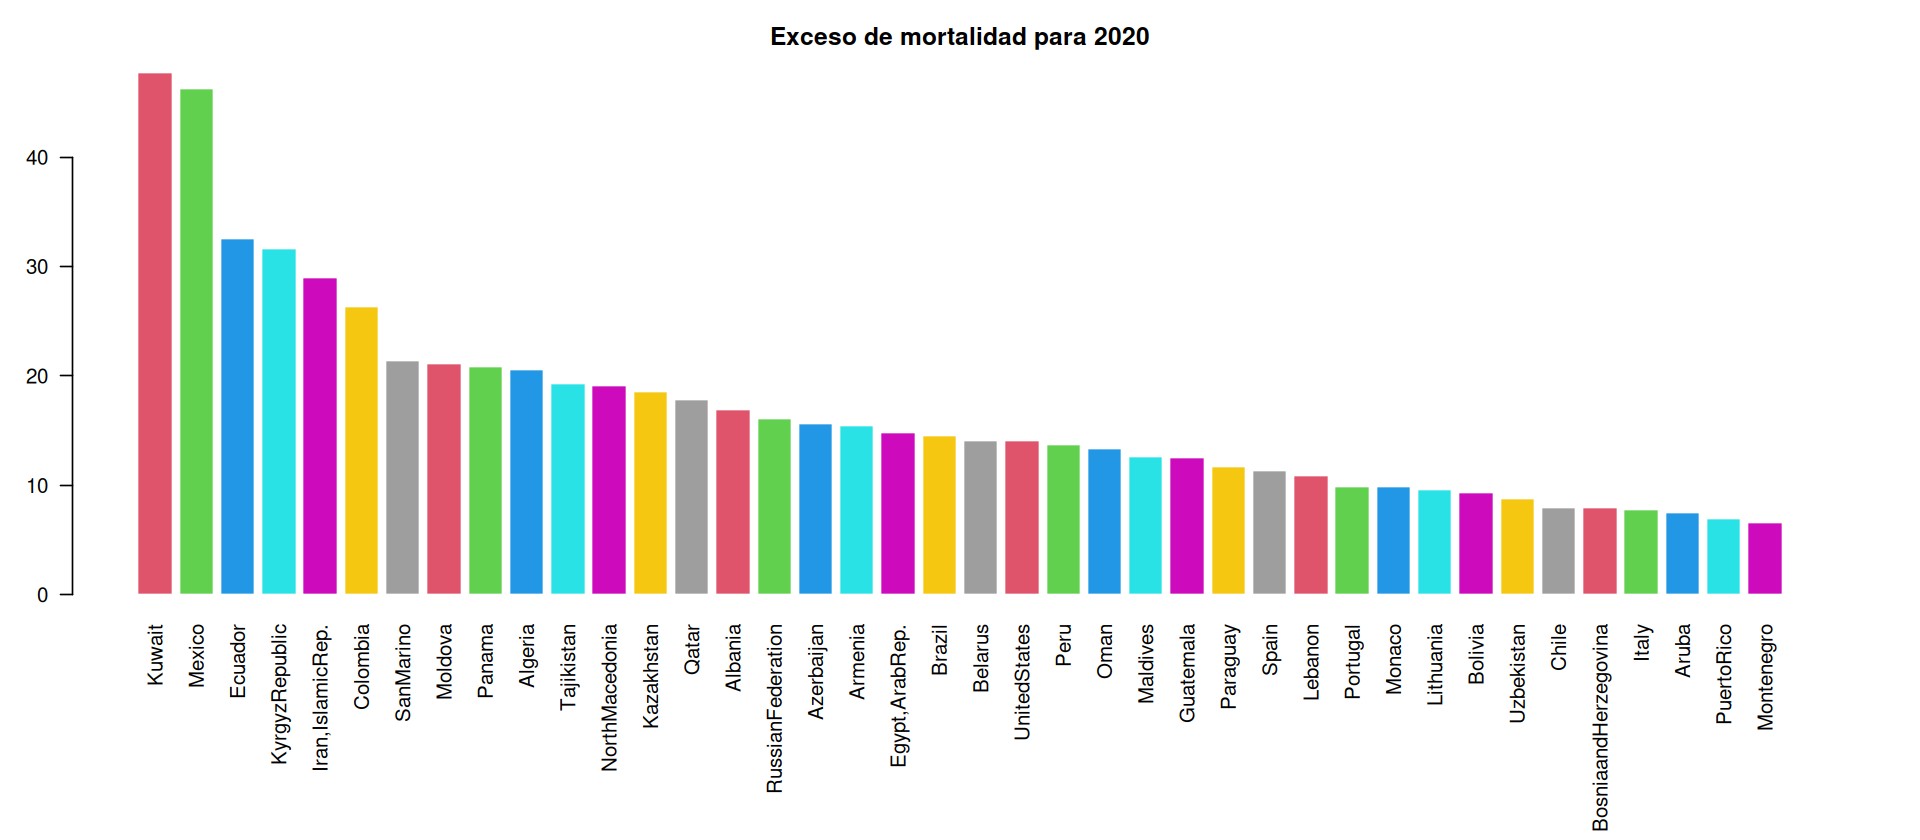

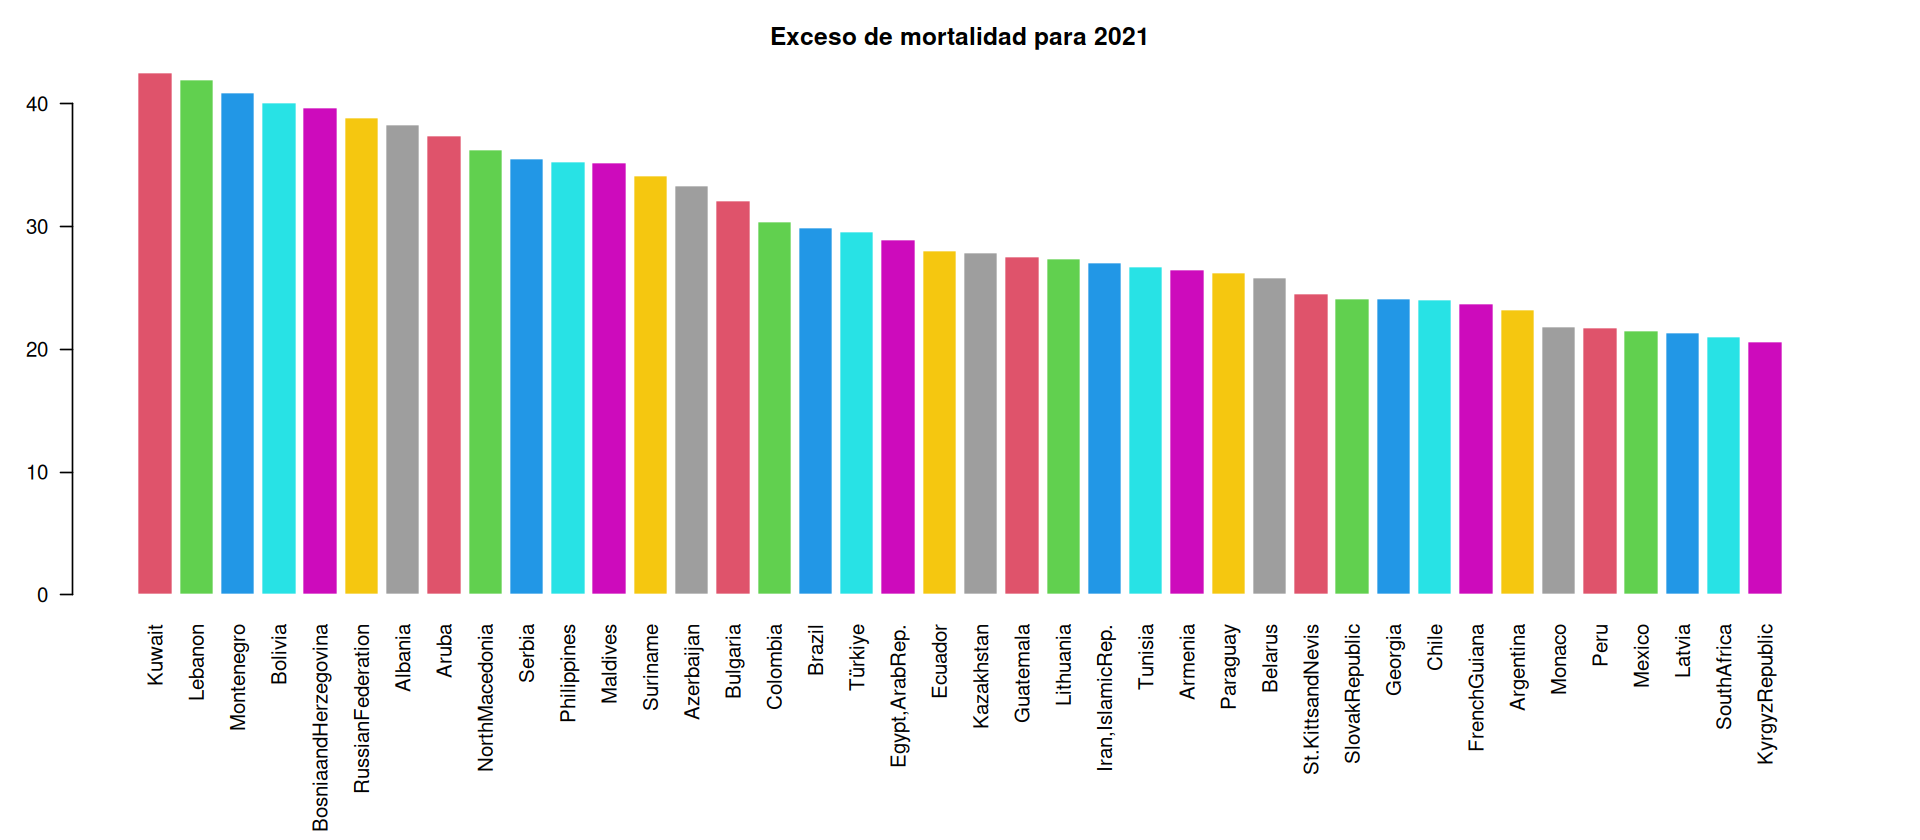

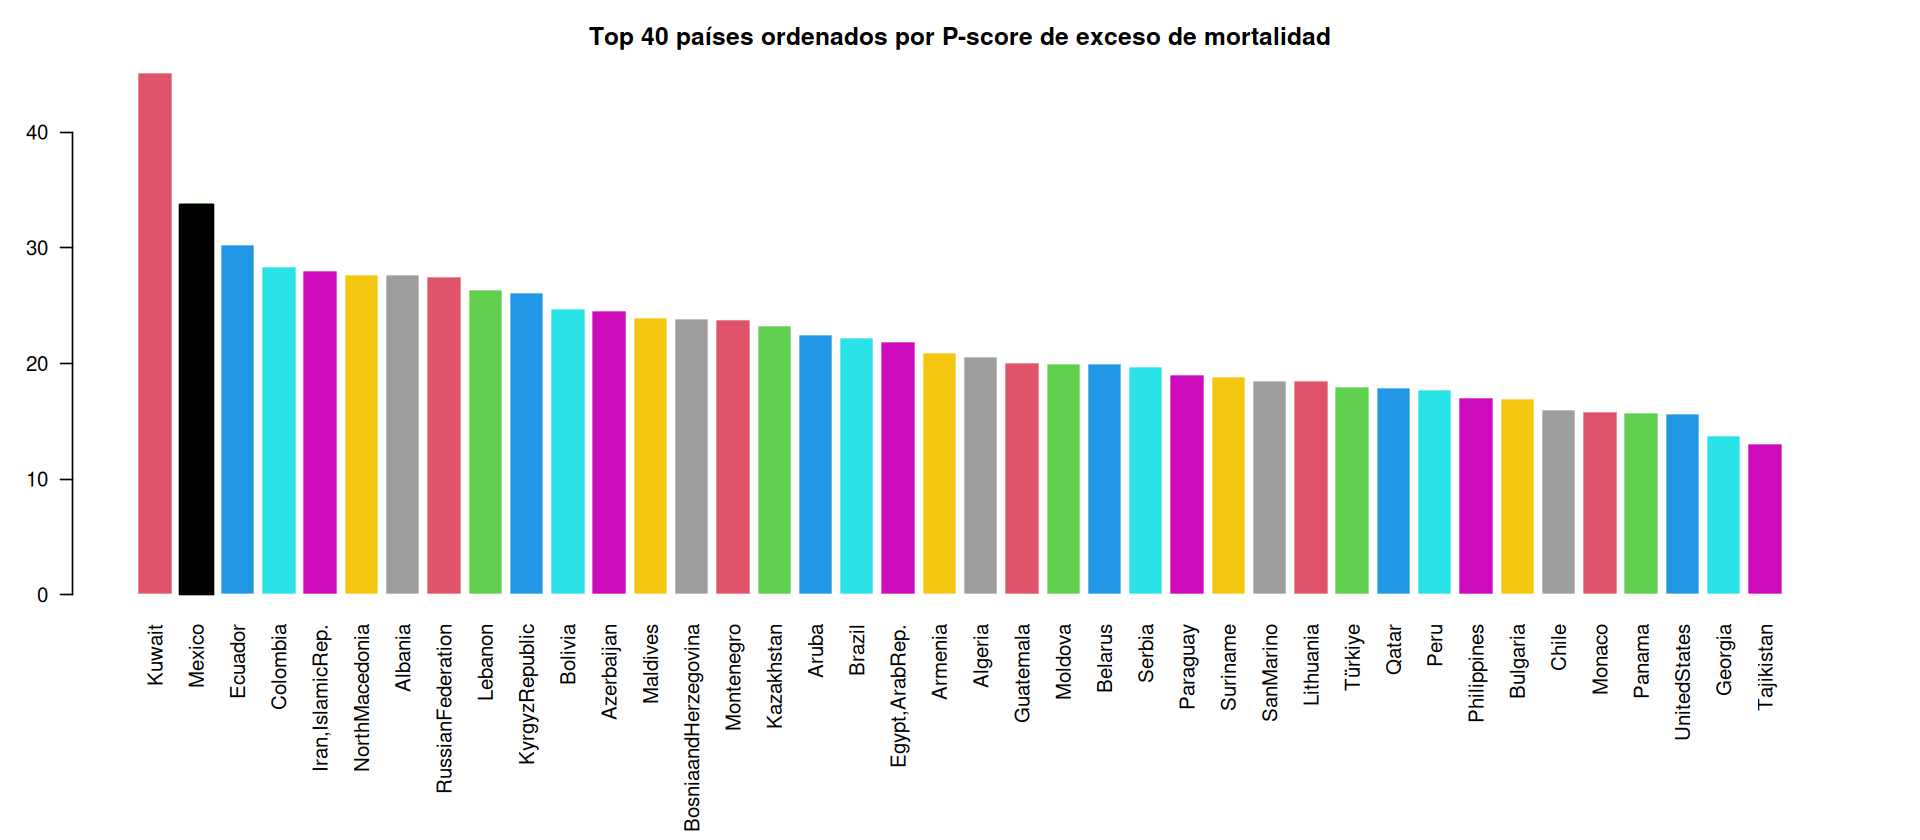

In [9]:
options(repr.plot.width = 16, repr.plot.height = 7)
for(y in c(2020, 2021)) {
    par(mar = c(10,3,3,3))
    #db_mort_ex_o = db_mort_ex[order(db_mort_ex$median_mort_excess, decreasing = T),]
    db_mort_ex_o = db_mort_ex %>%
                   filter(year == y) %>%
                   group_by(country) %>%
                   summarise(per_acum = mean(median_mort_excess)) %>%
                   arrange(desc(per_acum))
    barplot(head(db_mort_ex_o$per_acum, 40),
            names.arg = head(db_mort_ex_o$country,40), 
            col = 2:8,,
            border = "white",
            las = 2,
            main = paste0("Exceso de mortalidad para ", y)
           )
    }
par(mar = c(10,3,3,3))
#db_mort_ex_o = db_mort_ex[order(db_mort_ex$median_mort_excess, decreasing = T),]
db_mort_ex_o = db_mort_ex %>%
               group_by(country) %>%
               summarise(per_acum = mean(median_mort_excess)) %>%
               arrange(desc(per_acum))
barplot(head(db_mort_ex_o$per_acum, 40),
        names.arg = head(db_mort_ex_o$country,40), 
        col = 2:8,,
        border = "white",
        las = 2,
        main = "Top 40 países ordenados por P-score de exceso de mortalidad"
       )
rect(1.4, 0, 2.4, 33.7, col = 1)

### Uniendo datos de exceso de mortalidad con datos de governanza:

In [10]:
db3 = merge(db_wgi, db_mort_ex, by = c("year", "code", "country"))
db3$year = as.factor(db3$year)

In [11]:
db3[db3$country == "Mexico",]

year code country ControlofCorruption GovernmentEffectiveness
72  2020 MEX  Mexico  -0.9020775          -0.2426632             
183 2021 MEX  Mexico  -1.0016289          -0.3121623             
    PoliticalStabilityNoViolence RegulatoryQuality RuleofLaw 
72  -0.8563815                    0.002554335      -0.6477694
183 -0.6367402                   -0.230723783      -0.7997135
    VoiceandAccountability median_mort_excess mean_mort_excess min_mort_excess
72  -0.02503033            46.25              41.03385         -8.79          
183 -0.07418738            21.50              41.80288          1.58          
    max_mort_excess agg_mort_excess
72   95.69          2133.76        
183 168.45          2173.75

### Análisis de correlaciones entre indicadores de gobernanza y estadísticos de exceso de mortalidad

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



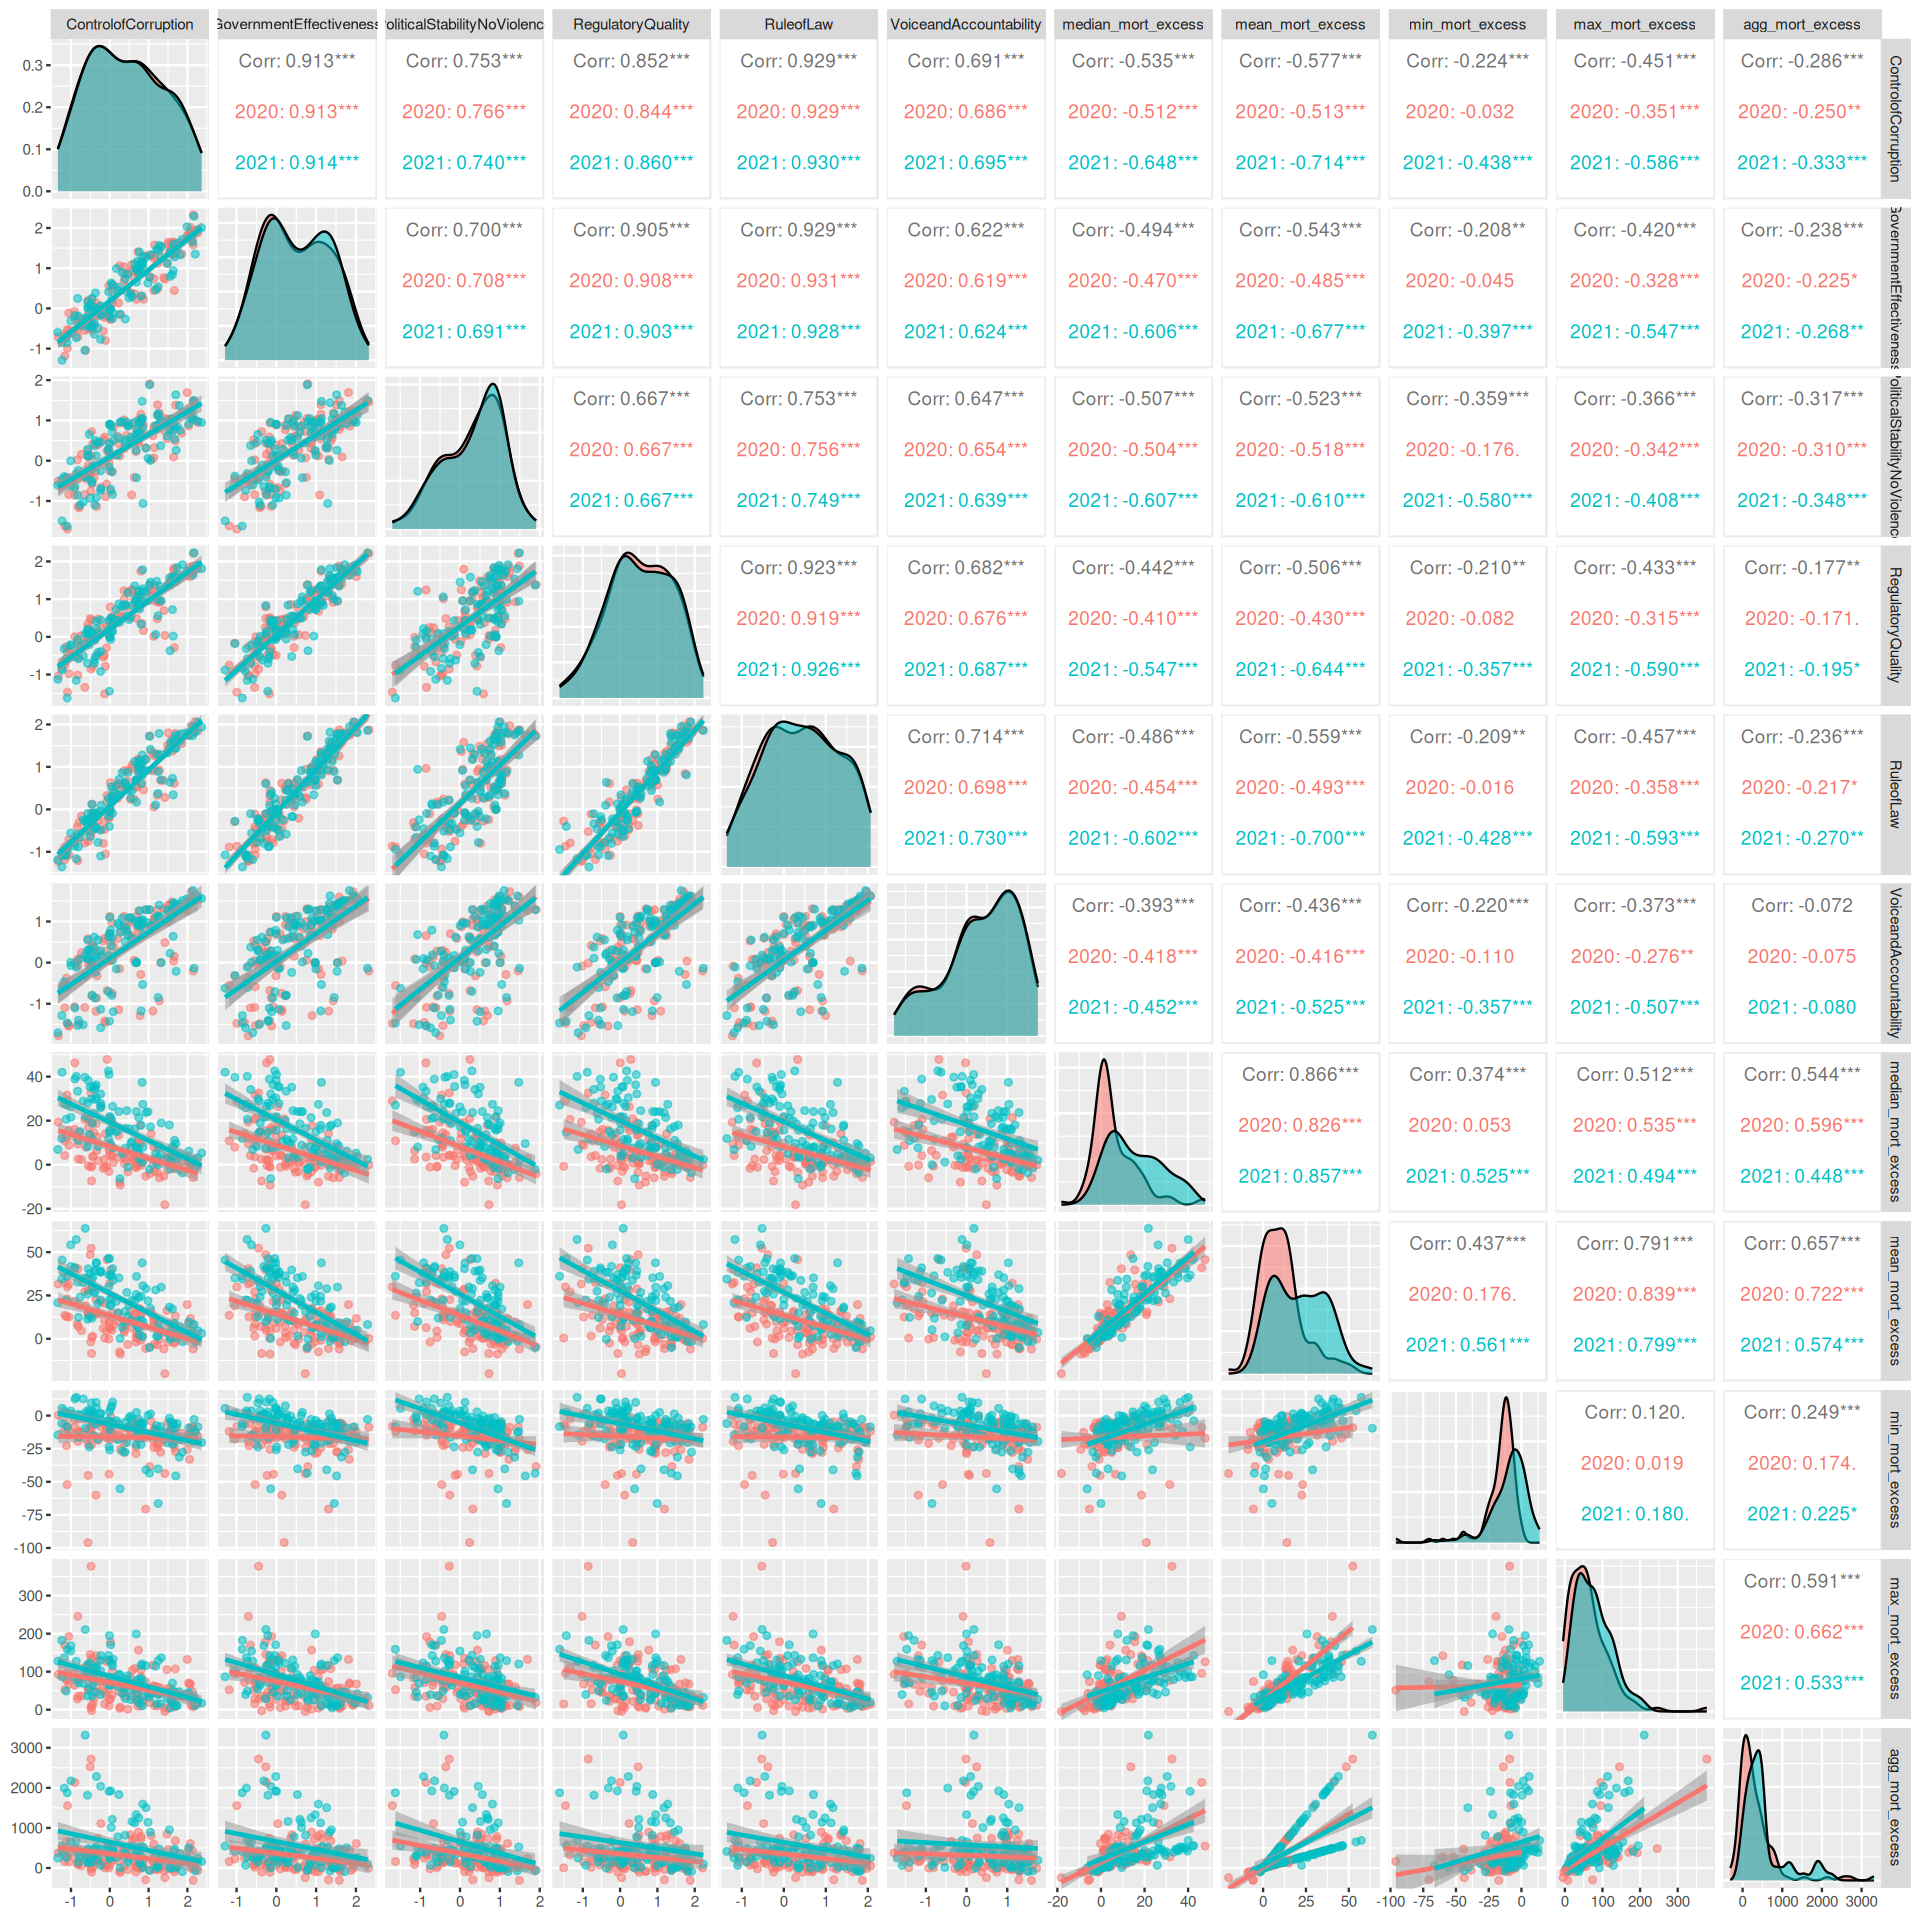

In [12]:
options(repr.plot.width = 16, repr.plot.height = 16)
library(GGally)
ggpairs(db3, columns = 4:14, 
        mapping = ggplot2::aes(colour = year, alpha = 0.5),
        lower = list(continuous = "smooth"))

### Significancia de las correlaciones entre variables

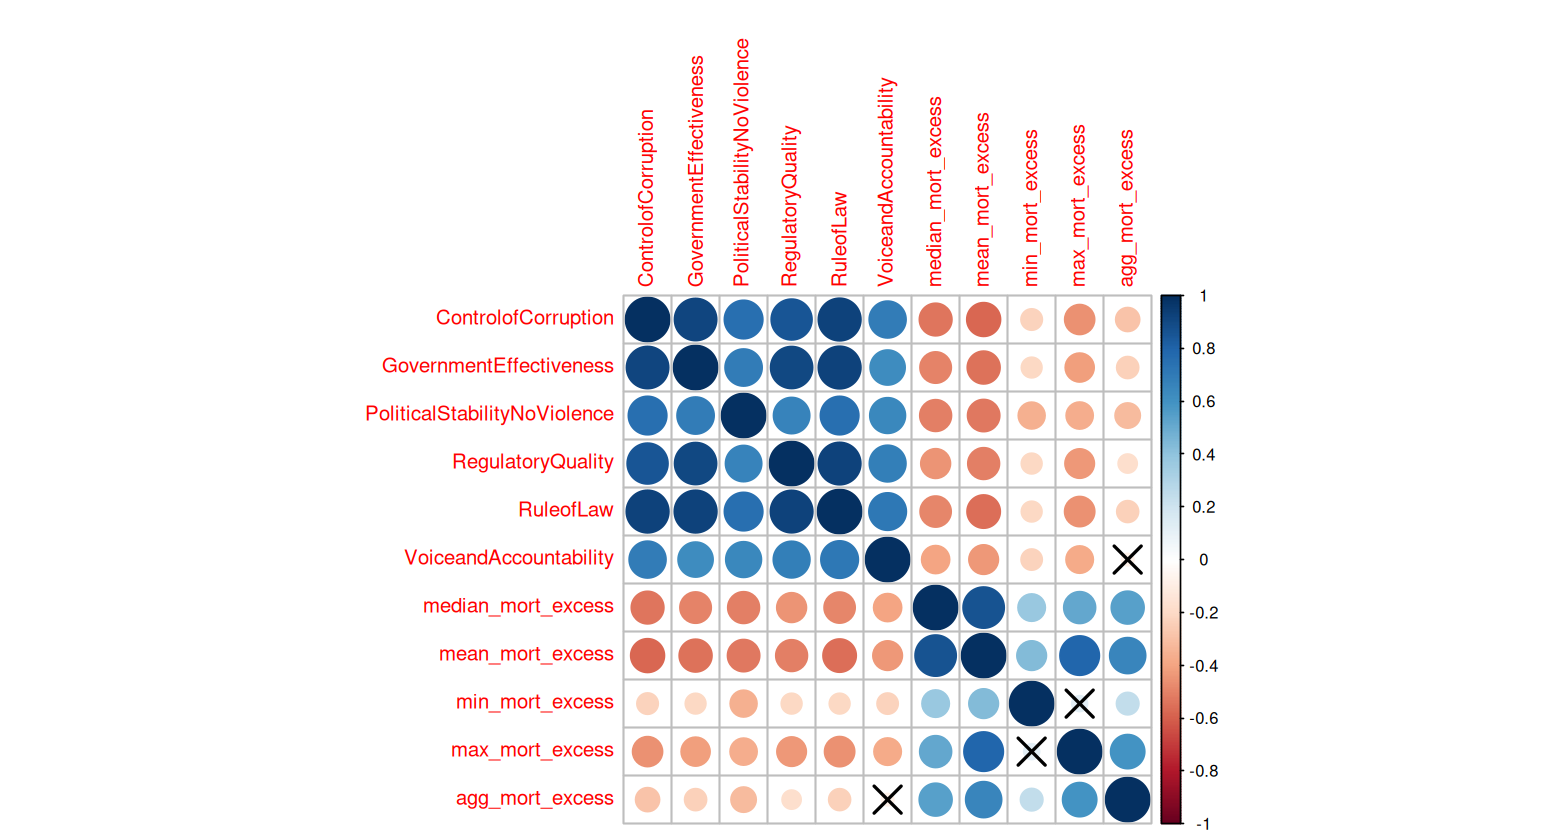

In [13]:
options(repr.plot.width = 13, repr.plot.height = 7)
library(corrplot)
p.mat = cor.mtest(db3[,4:14])$p
corrplot(cor(db3[,4:14]), p.mat = p.mat, sig.level = 0.025)

In [14]:
mod_median = lm(data = db3[,c(4:9,10)], median_mort_excess~.)
summary(mod_median)


Call:
lm(formula = median_mort_excess ~ ., data = db3[, c(4:9, 10)])

Residuals:
    Min      1Q  Median      3Q     Max 
-20.920  -6.805  -0.512   5.404  32.485 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   14.1890     0.8817  16.093  < 2e-16 ***
ControlofCorruption           -5.6255     2.2042  -2.552  0.01139 *  
GovernmentEffectiveness       -2.5631     2.7481  -0.933  0.35203    
PoliticalStabilityNoViolence  -4.4107     1.5136  -2.914  0.00394 ** 
RegulatoryQuality              0.5128     2.3598   0.217  0.82818    
RuleofLaw                      3.7124     3.0649   1.211  0.22711    
VoiceandAccountability        -0.3869     1.2024  -0.322  0.74793    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.38 on 217 degrees of freedom
Multiple R-squared:  0.3188,	Adjusted R-squared:    0.3 
F-statistic: 16.93 on 6 and 217 DF,  p-value: 5.183e-16


In [15]:
mod_mean = lm(data = db3[,c(4:9,11)], mean_mort_excess~.)
summary(mod_mean)


Call:
lm(formula = mean_mort_excess ~ ., data = db3[, c(4:9, 11)])

Residuals:
    Min      1Q  Median      3Q     Max 
-29.102  -7.908  -0.790   6.983  37.695 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   20.3153     1.0486  19.373   <2e-16 ***
ControlofCorruption           -4.8111     2.6217  -1.835   0.0679 .  
GovernmentEffectiveness       -1.5941     3.2686  -0.488   0.6263    
PoliticalStabilityNoViolence  -3.8623     1.8003  -2.145   0.0330 *  
RegulatoryQuality              0.9127     2.8067   0.325   0.7453    
RuleofLaw                     -1.3497     3.6453  -0.370   0.7116    
VoiceandAccountability        -0.4258     1.4301  -0.298   0.7662    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.35 on 217 degrees of freedom
Multiple R-squared:  0.3532,	Adjusted R-squared:  0.3353 
F-statistic: 19.75 on 6 and 217 DF,  p-value: < 2.2e-16


In [16]:
mod_min = lm(data = db3[,c(4:9,12)], min_mort_excess~.)
summary(mod_min)


Call:
lm(formula = min_mort_excess ~ ., data = db3[, c(4:9, 12)])

Residuals:
    Min      1Q  Median      3Q     Max 
-80.574  -4.284   1.766   8.146  24.173 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -10.3055     1.1245  -9.164  < 2e-16 ***
ControlofCorruption           -0.3288     2.8114  -0.117    0.907    
GovernmentEffectiveness       -0.6424     3.5051  -0.183    0.855    
PoliticalStabilityNoViolence  -8.8704     1.9305  -4.595 7.34e-06 ***
RegulatoryQuality             -3.0175     3.0098  -1.003    0.317    
RuleofLaw                      6.1382     3.9090   1.570    0.118    
VoiceandAccountability        -0.5451     1.5336  -0.355    0.723    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.24 on 217 degrees of freedom
Multiple R-squared:  0.144,	Adjusted R-squared:  0.1204 
F-statistic: 6.086 on 6 and 217 DF,  p-value: 6.56e-06


In [17]:
mod_max = lm(data = db3[,c(4:9,13)], max_mort_excess~.)
summary(mod_max)


Call:
lm(formula = max_mort_excess ~ ., data = db3[, c(4:9, 13)])

Residuals:
    Min      1Q  Median      3Q     Max 
-89.876 -30.090  -5.472  22.029 281.225 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    81.103      3.922  20.679   <2e-16 ***
ControlofCorruption           -12.483      9.806  -1.273    0.204    
GovernmentEffectiveness         9.149     12.225   0.748    0.455    
PoliticalStabilityNoViolence   -0.965      6.733  -0.143    0.886    
RegulatoryQuality              -7.787     10.498  -0.742    0.459    
RuleofLaw                     -11.739     13.634  -0.861    0.390    
VoiceandAccountability         -3.571      5.349  -0.668    0.505    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 46.18 on 217 degrees of freedom
Multiple R-squared:  0.2203,	Adjusted R-squared:  0.1987 
F-statistic: 10.22 on 6 and 217 DF,  p-value: 5.903e-10


### Considerando todos los modelos anteriores

El mejor modelo es el que hace regresión respecto a la mediana del exceso de mortalidad por lo que lo someteremos a un protocolo de stepAIC para encontrar el modelo mínimo adecuado.

In [18]:
mod_med_good = step(mod_median)
summary(mod_med_good)

Start:  AIC=1055.2
median_mort_excess ~ ControlofCorruption + GovernmentEffectiveness + 
    PoliticalStabilityNoViolence + RegulatoryQuality + RuleofLaw + 
    VoiceandAccountability

                               Df Sum of Sq   RSS    AIC
- RegulatoryQuality             1      5.09 23391 1053.2
- VoiceandAccountability        1     11.16 23397 1053.3
- GovernmentEffectiveness       1     93.74 23480 1054.1
- RuleofLaw                     1    158.11 23544 1054.7
<none>                                      23386 1055.2
- ControlofCorruption           1    701.94 24088 1059.8
- PoliticalStabilityNoViolence  1    915.15 24301 1061.8

Step:  AIC=1053.25
median_mort_excess ~ ControlofCorruption + GovernmentEffectiveness + 
    PoliticalStabilityNoViolence + RuleofLaw + VoiceandAccountability

                               Df Sum of Sq   RSS    AIC
- VoiceandAccountability        1      8.61 23399 1051.3
- GovernmentEffectiveness       1     92.02 23483 1052.1
<none>                     


Call:
lm(formula = median_mort_excess ~ ControlofCorruption + PoliticalStabilityNoViolence, 
    data = db3[, c(4:9, 10)])

Residuals:
    Min      1Q  Median      3Q     Max 
-22.851  -6.712  -0.662   5.124  34.454 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   14.0406     0.7645  18.365  < 2e-16 ***
ControlofCorruption           -4.5214     1.0859  -4.164 4.49e-05 ***
PoliticalStabilityNoViolence  -4.0487     1.4250  -2.841  0.00491 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.34 on 221 degrees of freedom
Multiple R-squared:  0.3115,	Adjusted R-squared:  0.3053 
F-statistic:    50 on 2 and 221 DF,  p-value: < 2.2e-16


### Descargando los datos de índice de masa corporal por países para ver su correlación y su influencia sobre el exceso de mortalidad:

In [19]:
library(rvest)
# Reading in the table from Wikipedia
page = read_html("https://en.wikipedia.org/wiki/List_of_sovereign_states_by_body_mass_index")
# Obtain the piece of the web page that corresponds to the "wikitable" node
db_bmi = html_node(page, ".wikitable")
# Convert the html table element into a data frame
db_bmi = html_table(db_bmi, fill = TRUE)
db_bmi$Country = gsub(db_bmi$Country, pattern = "\\*| | ", replacement = "")
db_bmi = as.data.frame(lapply(db_bmi, function(x) gsub(x, pattern = "—", replacement="NA")))
colnames(db_bmi) = tolower(colnames(db_bmi))
db_bmi$country = as.factor(db_bmi$country)
db_bmi$both = as.numeric(db_bmi$both)
db_bmi$male = as.numeric(db_bmi$male)
db_bmi$female = as.numeric(db_bmi$female)
db_bmi = na.omit(db_bmi)
head(db_bmi)


Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding




country            both male female
1 Nauru              32.5 32.1 32.8  
2 Tonga              31.9 30.4 33.5  
3 Samoa              31.7 29.9 33.5  
4 Kuwait             30.0 29.5 30.8  
5 SaintKittsandNevis 29.7 28.4 30.9  
6 SaintLucia         29.6 28.9 30.2

In [20]:
summary(db_bmi)

              country         both            male           female     
 Afghanistan      :  1   Min.   :20.50   Min.   :20.10   Min.   :21.00  
 Albania          :  1   1st Qu.:23.93   1st Qu.:23.20   1st Qu.:24.30  
 Algeria          :  1   Median :26.00   Median :25.85   Median :26.00  
 Andorra          :  1   Mean   :25.67   Mean   :25.31   Mean   :26.04  
 Angola           :  1   3rd Qu.:27.20   3rd Qu.:27.20   3rd Qu.:27.50  
 AntiguaandBarbuda:  1   Max.   :32.50   Max.   :32.10   Max.   :33.50  
 (Other)          :184                                                  

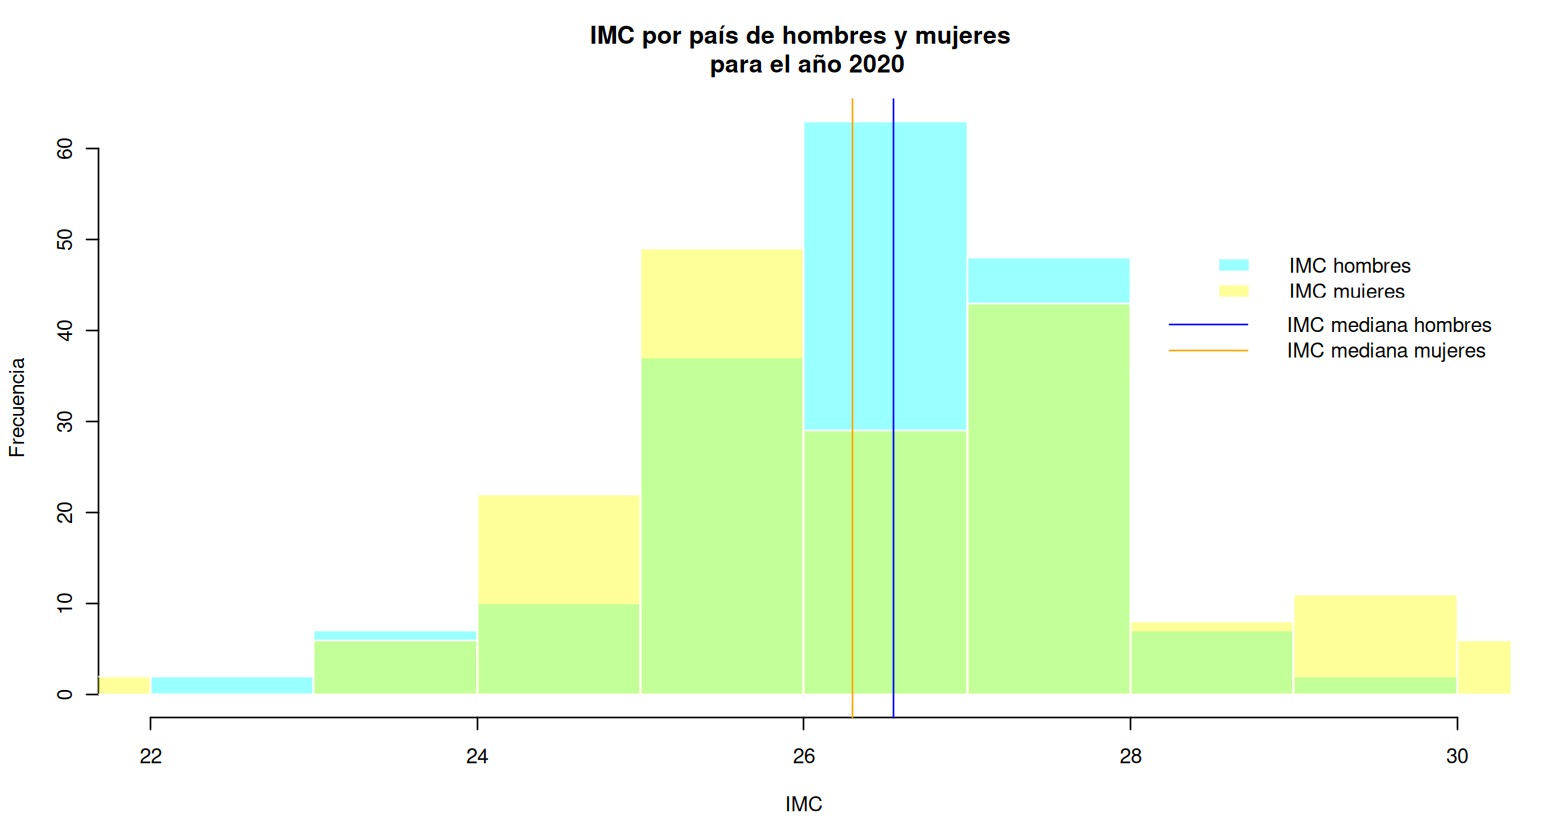

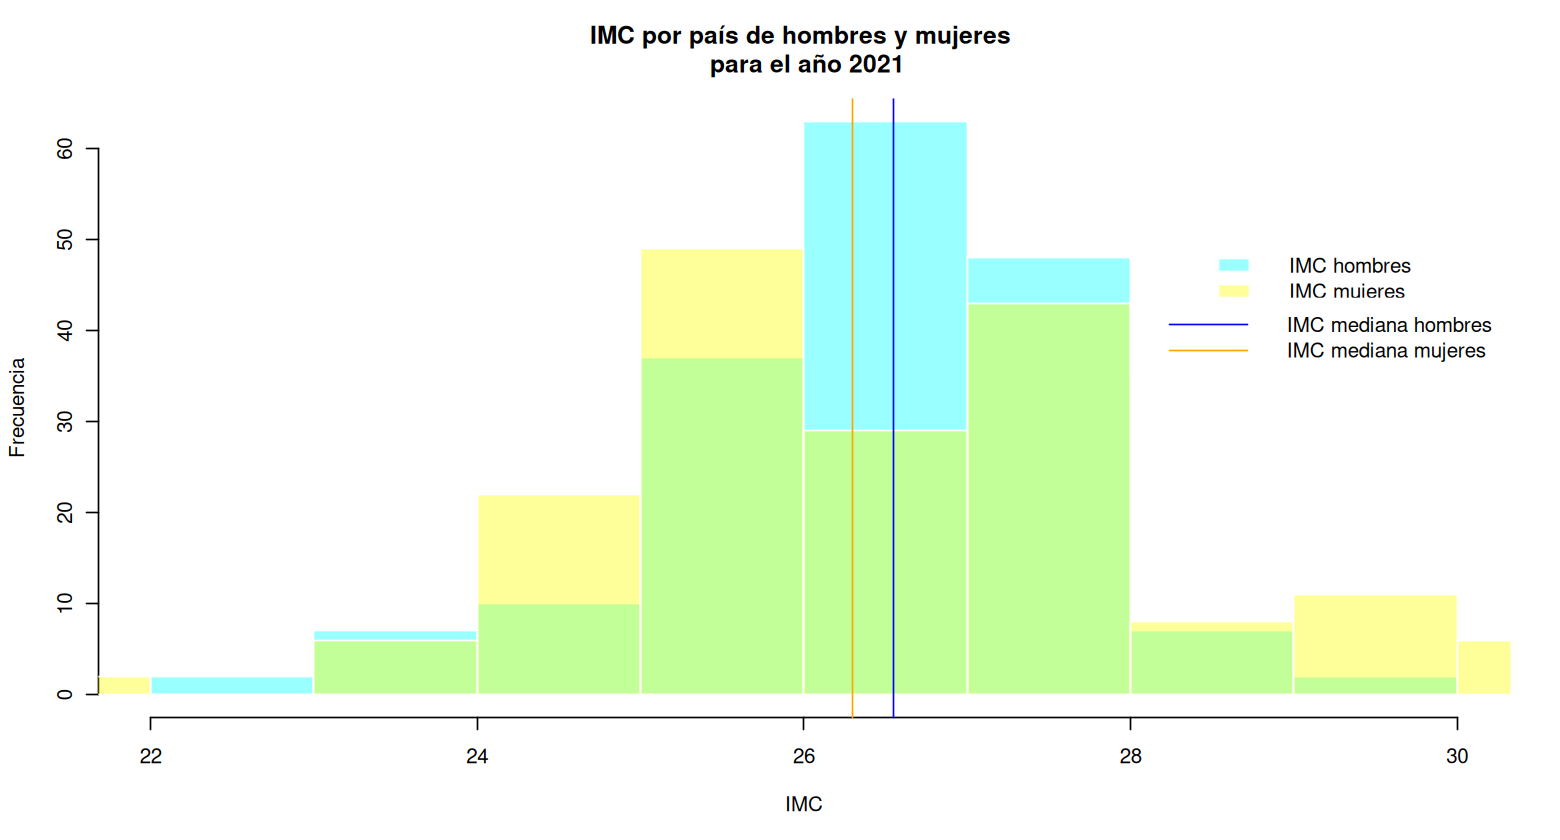

In [21]:
db4 = merge(db3, db_bmi, by = "country")

transp_col = function(color, pct_alpha = 50){
   rgb.val <- col2rgb(color)
    t.col <- rgb(rgb.val[1], rgb.val[2], rgb.val[3],
             max = 255,
             alpha = (100 - pct_alpha) * 255 / 100)
    return(t.col)
}

hist_bmi = function(db4,year){
    
   
    
    db4[db4$year == year,]
    col_male = transp_col("cyan",60)
    col_female = transp_col("yellow",60)
    
    hist(db4$male, 
     col = col_male, 
     border = "white", 
     main = paste0("IMC por país de hombres y mujeres \n para el año ", year),
     xlab = "IMC",
     ylab = "Frecuencia"
    )
    hist(db4$female, col = col_female, add = T, border = "white")
    legend(x = 28.3, 
           y = 50,
           legend = c("IMC hombres", "IMC mujeres"),
           fill = c(col_male, col_female),
           border = "white",
           #lty = c(NA, NA, 1, 1),
           col = c(col_male, col_female),
           box.col = "white"
          )
    legend(x = 28, 
           y = 43.5,
           legend = c("IMC mediana hombres","IMC mediana mujeres"),
           #fill = c(col_male, col_female, NA, NA),
           border = "white",
           lty = c(1, 1),
           col = c("blue", "orange"),
           box.col = "white"
          )

    abline(v = median(db4$male), col = "blue")
    abline(v = median(db4$female), col = "orange") 
}

hist_bmi(db4, 2020)
hist_bmi(db4, 2021)



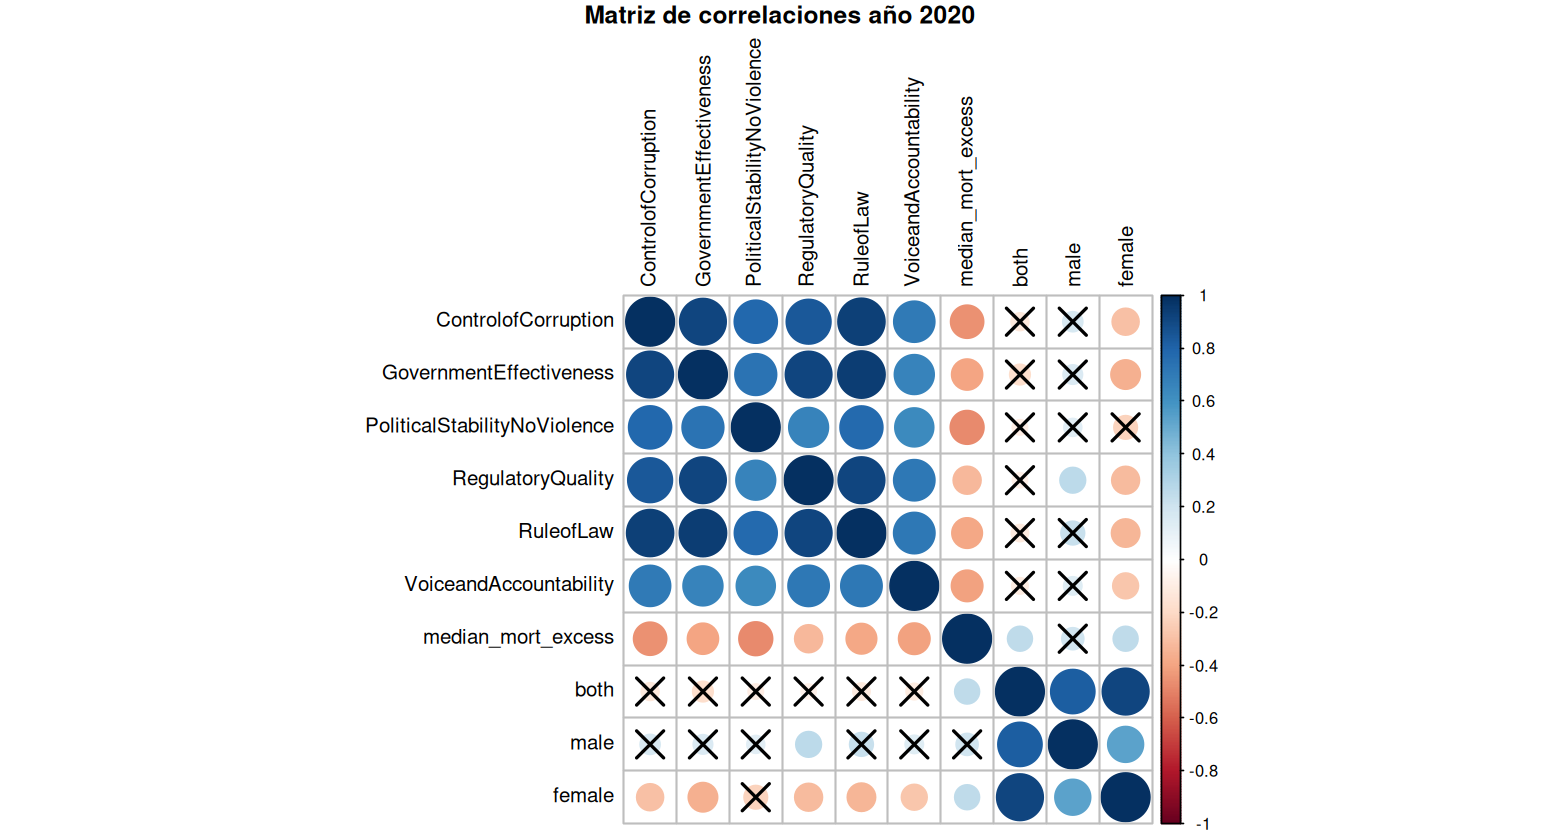

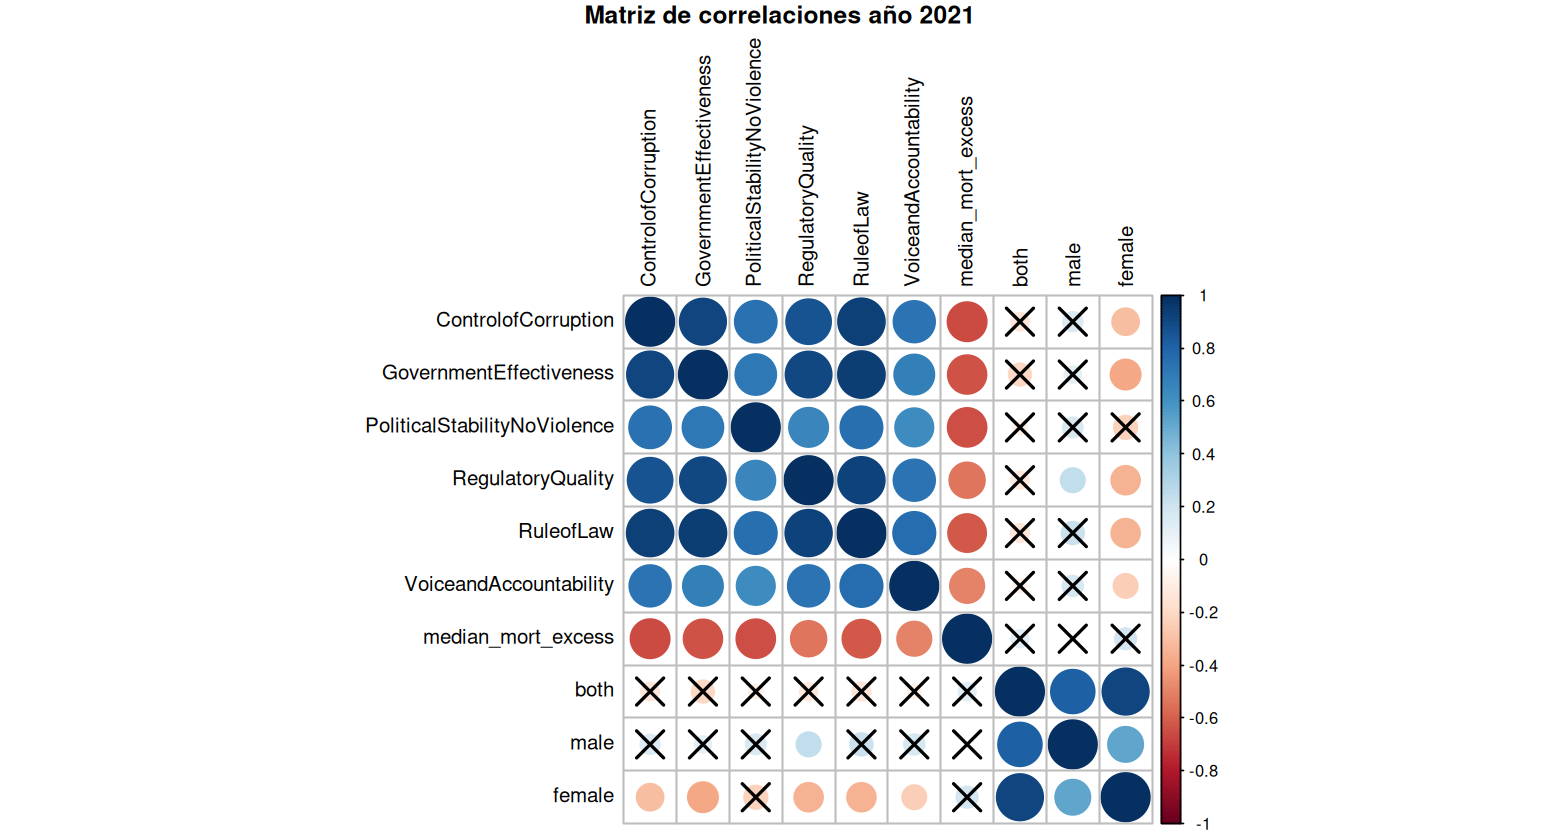

In [22]:
options(repr.plot.width = 13, repr.plot.height = 7)
library(corrplot)
cor_imc = function(db4, year){
    p.mat = cor.mtest(db4[db4$year == year,c(4:10,15,16,17)])$p
    corrplot(cor(db4[db4$year == year,c(4:10,15,16,17)]), 
             p.mat = p.mat, sig.level = 0.025, tl.col = "black",
             title = paste0("\nMatriz de correlaciones año ", year))  
}

cor_imc(db4, 2020)
cor_imc(db4, 2021)

In [23]:
# Standardizing BMI
db4$both = as.numeric(scale(as.numeric(db4$both)))
db4$male = as.numeric(scale(as.numeric(db4$male)))
db4$female = as.numeric(scale(as.numeric(db4$female)))
# Fitting lm model
lm_bmi = function(db4, year){
mod_med_gov_bmi = lm(data = db4[db4$year == year,c(4:10,16,17)], median_mort_excess~.)
mod_adecuado = step(mod_med_gov_bmi)
summary(mod_adecuado)}
lm_bmi(db4, 2020)
#lm_bmi(db4, 2021)

Start:  AIC=399.96
median_mort_excess ~ ControlofCorruption + GovernmentEffectiveness + 
    PoliticalStabilityNoViolence + RegulatoryQuality + RuleofLaw + 
    VoiceandAccountability + male + female

                               Df Sum of Sq    RSS    AIC
- RegulatoryQuality             1     4.902 6276.8 398.03
- female                        1     7.413 6279.3 398.07
- GovernmentEffectiveness       1     8.972 6280.9 398.09
- RuleofLaw                     1    56.498 6328.4 398.77
- VoiceandAccountability        1   138.170 6410.1 399.92
<none>                                      6271.9 399.96
- ControlofCorruption           1   162.744 6434.7 400.27
- PoliticalStabilityNoViolence  1   287.471 6559.4 402.00
- male                          1   316.154 6588.1 402.39

Step:  AIC=398.03
median_mort_excess ~ ControlofCorruption + GovernmentEffectiveness + 
    PoliticalStabilityNoViolence + RuleofLaw + VoiceandAccountability + 
    male + female

                               Df Sum 


Call:
lm(formula = median_mort_excess ~ ControlofCorruption + PoliticalStabilityNoViolence + 
    male, data = db4[db4$year == year, c(4:10, 16, 17)])

Residuals:
    Min      1Q  Median      3Q     Max 
-17.318  -5.739  -0.428   4.347  33.269 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    8.4608     1.0009   8.453 6.39e-13 ***
ControlofCorruption           -2.7540     1.4859  -1.853  0.06724 .  
PoliticalStabilityNoViolence  -4.5259     2.1403  -2.115  0.03736 *  
male                           2.8290     0.9206   3.073  0.00284 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.699 on 86 degrees of freedom
Multiple R-squared:  0.3176,	Adjusted R-squared:  0.2938 
F-statistic: 13.34 on 3 and 86 DF,  p-value: 3.154e-07


### Uniendo datos de diabetes

Podemos notar que el fenómeno del exceso de mortalidad por COVID-19 no es totalmente explicado por la gobernanza, y en el caso de México no parece ser un factor determinante.

A continuación buscaremos conjuntar los datos de prevalencia de diabetes para el año 2021, con el fin de evaluar la relevancia de dicho factor en la variable examinada.

Los datos provienene del Banco Mundial y fueron recopilados a partir de la siguiente liga:
https://data.worldbank.org/indicator/SH.STA.DIAB.ZS?end=2021&most_recent_year_desc=true&start=2009

In [24]:
db_diab = read.csv("diabetes.csv")
db_diab = db_diab[,c("Country.Name", "Country.Code", "X2021")]
colnames(db_diab) = c("country", "code", "diab")
db_diab$country = as.factor(db_diab$country)
db_diab$code = as.factor(db_diab$code)
db_diab = db_diab %>%
    arrange(desc(diab))
db_diab$diab = as.numeric(scale(db_diab$diab))
str(db_diab)
head(db_diab,30)
summary(db_diab)

'data.frame':	266 obs. of  3 variables:
 $ country: Factor w/ 266 levels "Afghanistan",..: 189 85 129 182 175 172 155 157 125 68 ...
 $ code   : Factor w/ 266 levels "ABW","AFE","AFG",..: 185 200 128 165 173 180 156 168 125 68 ...
 $ diab   : num  4.41 3.27 3.21 2.91 2.91 ...


country                     code diab    
1  Pakistan                    PAK  4.409260
2  French Polynesia            PYF  3.272531
3  Kuwait                      KWT  3.211635
4  Northern Mariana Islands    MNP  2.907154
5  New Caledonia               NCL  2.907154
6  Nauru                       NRU  2.907154
7  Marshall Islands            MHL  2.825959
8  Mauritius                   MUS  2.744764
9  Kiribati                    KIR  2.643270
10 Egypt, Arab Rep.            EGY  2.399685
11 American Samoa              ASM  2.277893
12 Tuvalu                      TUV  2.277893
13 Solomon Islands             SLB  2.176399
14 Qatar                       QAT  2.115503
15 Guam                        GUM  2.034308
16 Malaysia                    MYS  2.014009
17 Sudan                       SDN  1.993711
18 Saudi Arabia                SAU  1.953113
19 Fiji                        FJI  1.750126
20 Pacific island small states PSS  1.696683
21 Palau                       PLW  1.608035
22 Mexico                      MEX  1.587736
23 Papua New Guinea            PNG  1.547138
24 United Arab Emirates        ARE  1.486242
25 St. Kitts and Nevis         KNA  1.425346
26 Micronesia, Fed. Sts.       FSM  1.323852
27 Vanuatu                     VUT  1.323852
28 Jordan                      JOR  1.283255
29 IDA blend                   IDB  1.240518
30 Tonga                       TON  1.202060

                        country         code          diab        
 Afghanistan                :  1   ABW    :  1   Min.   :-1.6195  
 Africa Eastern and Southern:  1   AFE    :  1   1st Qu.:-0.6654  
 Africa Western and Central :  1   AFG    :  1   Median :-0.2189  
 Albania                    :  1   AFW    :  1   Mean   : 0.0000  
 Algeria                    :  1   AGO    :  1   3rd Qu.: 0.3800  
 American Samoa             :  1   ALB    :  1   Max.   : 4.4093  
 (Other)                    :260   (Other):260   NA's   :6        

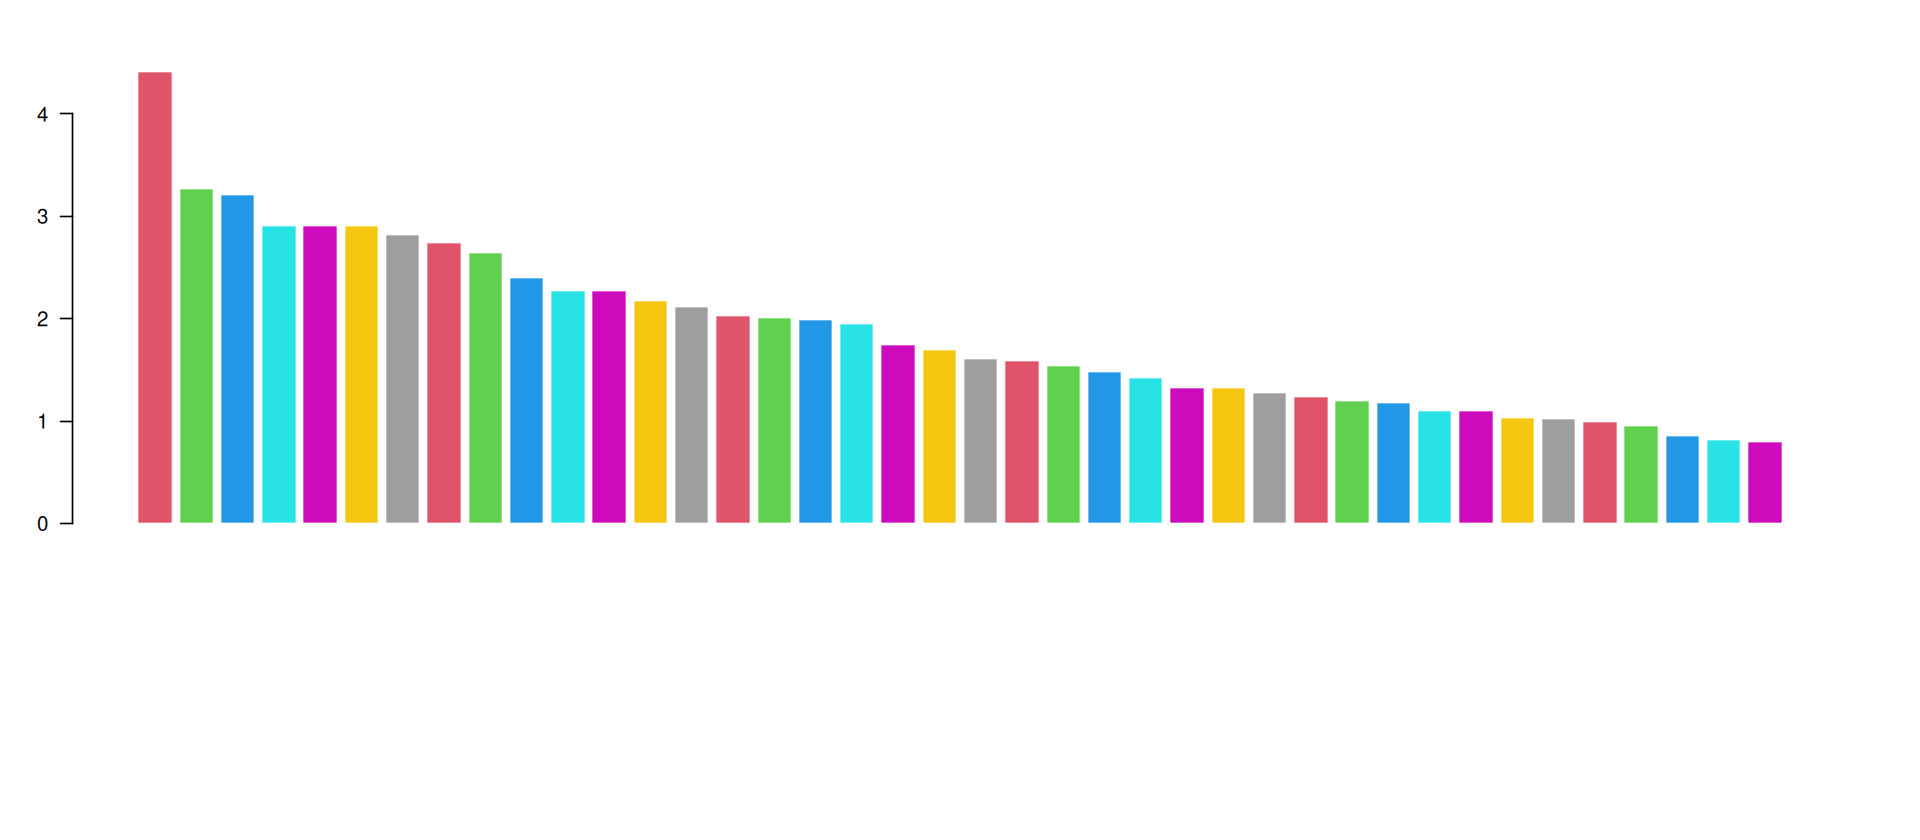

In [25]:
options(repr.plot.width = 16, repr.plot.height = 7)
par(mar = c(13,3,3,3))
db_diab_40 = head(db_diab, 40)
barplot(db_diab_40$diab, las = 2, col = 2:8, border = "white")
#rect(25.4, 0, 26.4, 16.75, col = 1)

In [26]:
levels(db_diab$code)
levels(db4$code)

[1] "ABW" "AFE" "AFG" "AFW" "AGO" "ALB" "AND" "ARB" "ARE" "ARG" "ARM" "ASM"
 [13] "ATG" "AUS" "AUT" "AZE" "BDI" "BEL" "BEN" "BFA" "BGD" "BGR" "BHR" "BHS"
 [25] "BIH" "BLR" "BLZ" "BMU" "BOL" "BRA" "BRB" "BRN" "BTN" "BWA" "CAF" "CAN"
 [37] "CEB" "CHE" "CHI" "CHL" "CHN" "CIV" "CMR" "COD" "COG" "COL" "COM" "CPV"
 [49] "CRI" "CSS" "CUB" "CUW" "CYM" "CYP" "CZE" "DEU" "DJI" "DMA" "DNK" "DOM"
 [61] "DZA" "EAP" "EAR" "EAS" "ECA" "ECS" "ECU" "EGY" "EMU" "ERI" "ESP" "EST"
 [73] "ETH" "EUU" "FCS" "FIN" "FJI" "FRA" "FRO" "FSM" "GAB" "GBR" "GEO" "GHA"
 [85] "GIB" "GIN" "GMB" "GNB" "GNQ" "GRC" "GRD" "GRL" "GTM" "GUM" "GUY" "HIC"
 [97] "HKG" "HND" "HPC" "HRV" "HTI" "HUN" "IBD" "IBT" "IDA" "IDB" "IDN" "IDX"
[109] "IMN" "IND" "INX" "IRL" "IRN" "IRQ" "ISL" "ISR" "ITA" "JAM" "JOR" "JPN"
[121] "KAZ" "KEN" "KGZ" "KHM" "KIR" "KNA" "KOR" "KWT" "LAC" "LAO" "LBN" "LBR"
[133] "LBY" "LCA" "LCN" "LDC" "LIC" "LIE" "LKA" "LMC" "LMY" "LSO" "LTE" "LTU"
[145] "LUX" "LVA" "MAC" "MAF" "MAR" "MCO" "MDA" "MDG" "MDV" "MEA" "MEX" "MHL"
[157] "MIC" "MKD" "MLI" "MLT" "MMR" "MNA" "MNE" "MNG" "MNP" "MOZ" "MRT" "MUS"
[169] "MWI" "MYS" "NAC" "NAM" "NCL" "NER" "NGA" "NIC" "NLD" "NOR" "NPL" "NRU"
[181] "NZL" "OED" "OMN" "OSS" "PAK" "PAN" "PER" "PHL" "PLW" "PNG" "POL" "PRE"
[193] "PRI" "PRK" "PRT" "PRY" "PSE" "PSS" "PST" "PYF" "QAT" "ROU" "RUS" "RWA"
[205] "SAS" "SAU" "SDN" "SEN" "SGP" "SLB" "SLE" "SLV" "SMR" "SOM" "SRB" "SSA"
[217] "SSD" "SSF" "SST" "STP" "SUR" "SVK" "SVN" "SWE" "SWZ" "SXM" "SYC" "SYR"
[229] "TCA" "TCD" "TEA" "TEC" "TGO" "THA" "TJK" "TKM" "TLA" "TLS" "TMN" "TON"
[241] "TSA" "TSS" "TTO" "TUN" "TUR" "TUV" "TZA" "UGA" "UKR" "UMC" "URY" "USA"
[253] "UZB" "VCT" "VEN" "VGB" "VIR" "VNM" "VUT" "WLD" "WSM" "XKX" "YEM" "ZAF"
[265] "ZMB" "ZWE"

[1] "ABW" "ADO" "AFG" "AGO" "AIA" "ALB" "ANT" "ARE" "ARG" "ARM" "ASM" "ATG"
 [13] "AUS" "AUT" "AZE" "BDI" "BEL" "BEN" "BFA" "BGD" "BGR" "BHR" "BHS" "BIH"
 [25] "BLR" "BLZ" "BMU" "BOL" "BRA" "BRB" "BRN" "BTN" "BWA" "CAF" "CAN" "CHE"
 [37] "CHL" "CHN" "CIV" "CMR" "COG" "COK" "COL" "COM" "CPV" "CRI" "CUB" "CYM"
 [49] "CYP" "CZE" "DEU" "DJI" "DMA" "DNK" "DOM" "DZA" "ECU" "EGY" "ERI" "ESP"
 [61] "EST" "ETH" "FIN" "FJI" "FRA" "FSM" "GAB" "GBR" "GEO" "GHA" "GIN" "GMB"
 [73] "GNB" "GNQ" "GRC" "GRD" "GRL" "GTM" "GUF" "GUM" "GUY" "HKG" "HND" "HRV"
 [85] "HTI" "HUN" "IDN" "IND" "IRL" "IRN" "IRQ" "ISL" "ISR" "ITA" "JAM" "JEY"
 [97] "JOR" "JPN" "KAZ" "KEN" "KGZ" "KHM" "KIR" "KNA" "KOR" "KSV" "KWT" "LAO"
[109] "LBN" "LBR" "LBY" "LCA" "LIE" "LKA" "LSO" "LTU" "LUX" "LVA" "MAC" "MAR"
[121] "MCO" "MDA" "MDG" "MDV" "MEX" "MHL" "MKD" "MLI" "MLT" "MMR" "MNE" "MNG"
[133] "MOZ" "MRT" "MTQ" "MUS" "MWI" "MYS" "NAM" "NER" "NGA" "NIC" "NIU" "NLD"
[145] "NOR" "NPL" "NRU" "NZL" "OMN" "PAK" "PAN" "PER" "PHL" "PLW" "PNG" "POL"
[157] "PRI" "PRK" "PRT" "PRY" "QAT" "REU" "ROM" "RUS" "RWA" "SAU" "SDN" "SEN"
[169] "SGP" "SLB" "SLE" "SLV" "SMR" "SOM" "SRB" "SSD" "STP" "SUR" "SVK" "SVN"
[181] "SWE" "SWZ" "SYC" "SYR" "TCD" "TGO" "THA" "TJK" "TKM" "TMP" "TON" "TTO"
[193] "TUN" "TUR" "TUV" "TWN" "TZA" "UGA" "UKR" "URY" "USA" "UZB" "VCT" "VEN"
[205] "VIR" "VNM" "VUT" "WBG" "WSM" "YEM" "ZAF" "ZAR" "ZMB" "ZWE"

In [27]:
db5 = merge(db4, db_diab[,c("code", "diab")], by = "code")
str(db5)
head(db5)
summary(db5)

'data.frame':	176 obs. of  18 variables:
 $ code                        : Factor w/ 214 levels "ABW","ADO","AFG",..: 6 6 8 9 9 10 10 12 12 13 ...
 $ country                     : Factor w/ 214 levels "Afghanistan",..: 2 2 202 9 9 10 10 8 8 12 ...
 $ year                        : Factor w/ 2 levels "2020","2021": 2 1 1 1 2 2 1 1 2 1 ...
 $ ControlofCorruption         : num  -0.556 -0.552 1.111 -0.141 -0.401 ...
 $ GovernmentEffectiveness     : num  -0.00336 -0.12496 1.31697 -0.22429 -0.35666 ...
 $ PoliticalStabilityNoViolence: num  0.1094 0.0876 0.6205 -0.0792 -0.1064 ...
 $ RegulatoryQuality           : num  0.193 0.236 1.086 -0.483 -0.618 ...
 $ RuleofLaw                   : num  -0.256 -0.349 0.909 -0.473 -0.462 ...
 $ VoiceandAccountability      : num  0.0912 0.0884 -1.1785 0.5881 0.6196 ...
 $ median_mort_excess          : num  38.34 16.96 -0.18 2.31 23.27 ...
 $ mean_mort_excess            : num  40.4 28 13.2 10.9 27.4 ...
 $ min_mort_excess             : num  4.2 -10.16 -18.47 -

code country            year ControlofCorruption GovernmentEffectiveness
1 ALB  Albania            2021 -0.55592418         -0.003363639           
2 ALB  Albania            2020 -0.55193108         -0.124956653           
3 ARE  UnitedArabEmirates 2020  1.11124730          1.316968679           
4 ARG  Argentina          2020 -0.14087410         -0.224287480           
5 ARG  Argentina          2021 -0.40077755         -0.356661767           
6 ARM  Armenia            2021  0.07214987         -0.249556035           
  PoliticalStabilityNoViolence RegulatoryQuality RuleofLaw  
1  0.10944585                   0.1927540        -0.25610086
2  0.08755231                   0.2358646        -0.34916523
3  0.62047577                   1.0859106         0.90919775
4 -0.07921351                  -0.4834922        -0.47304535
5 -0.10636664                  -0.6181448        -0.46230417
6 -0.83559227                   0.1451526        -0.09590425
  VoiceandAccountability median_mort_excess mean_mort_excess min_mort_excess
1  0.09120497            38.335             40.43333           4.20         
2  0.08836246            16.955             27.99500         -10.16         
3 -1.17846525            -0.180             13.21667         -18.47         
4  0.58811468             2.310             10.91417         -14.65         
5  0.61961973            23.265             27.44000           0.37         
6  0.05920416            26.465             40.51083          10.35         
  max_mort_excess agg_mort_excess both       male        female     diab      
1  92.80          485.20          -0.3055801  0.07891904 -0.5258242  0.2277206
2 120.15          335.94          -0.3055801  0.07891904 -0.5258242  0.2277206
3 116.97          158.60           1.9914460  1.73246076  1.8986790  1.4862422
4  45.20          130.97           0.9617446  1.07104407  0.5977260 -0.7466187
5  75.38          329.28           0.9617446  1.07104407  0.5977260 -0.7466187
6 115.09          486.13           0.1696667 -0.49982057  0.5385918 -0.7060212

      code                  country      year    ControlofCorruption
 ALB    :  2   Albania          :  2   2020:90   Min.   :-1.3382    
 ARG    :  2   AntiguaandBarbuda:  2   2021:86   1st Qu.:-0.4409    
 ARM    :  2   Argentina        :  2             Median : 0.2173    
 ATG    :  2   Armenia          :  2             Mean   : 0.4081    
 AUS    :  2   Australia        :  2             3rd Qu.: 1.2810    
 AUT    :  2   Austria          :  2             Max.   : 2.3662    
 (Other):164   (Other)          :164                                
 GovernmentEffectiveness PoliticalStabilityNoViolence RegulatoryQuality
 Min.   :-1.2870         Min.   :-1.6184              Min.   :-1.5129  
 1st Qu.:-0.1862         1st Qu.:-0.2708              1st Qu.:-0.0632  
 Median : 0.3900         Median : 0.4272              Median : 0.4577  
 Mean   : 0.4815         Mean   : 0.2841              Mean   : 0.5118  
 3rd Qu.: 1.1333         3rd Qu.: 0.8752              3rd Qu.: 1.2378  
 Max.   : 2.3249

In [28]:
db5$code

[1] ALB ALB ARE ARG ARG ARM ARM ATG ATG AUS AUS AUT AUT AZE AZE BEL BEL BGR
 [19] BGR BIH BIH BLR BLR BLZ BLZ BOL BOL BRA BRA BRB BRB BTN BTN CAN CAN CHE
 [37] CHE CHL CHL COL COL CPV CRI CRI CUB CUB CYP CYP CZE CZE DEU DEU DNK DNK
 [55] DOM DOM DZA ECU ECU ESP ESP EST EST FIN FIN FRA FRA GBR GBR GEO GEO GRC
 [73] GRC GTM GTM HRV HRV HUN HUN IRL IRL ISL ISL ISR ISR ITA ITA JAM JAM JOR
 [91] JOR JPN JPN KAZ KAZ KWT KWT LBN LBN LTU LTU LUX LUX LVA LVA MDA MDA MDV
[109] MDV MEX MEX MKD MKD MLT MLT MNE MNE MNG MNG MUS MUS MYS MYS NIC NIC NLD
[127] NLD NOR NOR NZL NZL OMN OMN PAN PAN PER PER PHL PHL POL POL PRT PRT PRY
[145] PRY QAT QAT SGP SGP SLV SRB SRB SUR SUR SVN SVN SWE SWE SYC SYC THA THA
[163] TJK TJK TUN TUN UKR UKR URY URY USA USA UZB UZB ZAF ZAF
214 Levels: ABW ADO AFG AGO AIA ALB ANT ARE ARG ARM ASM ATG AUS AUT AZE ... ZWE

In [29]:
mod_med_gov_bmi_diab = lm(data = db5[,c(4:10,16,18)], median_mort_excess~.)
summary(mod_med_gov_bmi_diab)
mod_adecuado0 = step(mod_med_gov_bmi_diab)
summary(mod_adecuado0)


Call:
lm(formula = median_mort_excess ~ ., data = db5[, c(4:10, 16, 
    18)])

Residuals:
     Min       1Q   Median       3Q      Max 
-20.1626  -6.5940  -0.1745   4.9583  27.6360 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   14.2188     1.0016  14.196  < 2e-16 ***
ControlofCorruption           -4.8369     2.4646  -1.963  0.05136 .  
GovernmentEffectiveness       -2.8274     3.4147  -0.828  0.40885    
PoliticalStabilityNoViolence  -5.7184     1.9230  -2.974  0.00338 ** 
RegulatoryQuality              0.9819     2.8174   0.349  0.72790    
RuleofLaw                      4.0150     3.7550   1.069  0.28650    
VoiceandAccountability        -1.1886     1.5174  -0.783  0.43453    
male                           1.8662     0.8660   2.155  0.03260 *  
diab                           0.3185     1.0739   0.297  0.76713    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.41 on

Start:  AIC=833.42
median_mort_excess ~ ControlofCorruption + GovernmentEffectiveness + 
    PoliticalStabilityNoViolence + RegulatoryQuality + RuleofLaw + 
    VoiceandAccountability + male + diab

                               Df Sum of Sq   RSS    AIC
- diab                          1      9.53 18107 831.51
- RegulatoryQuality             1     13.16 18111 831.54
- VoiceandAccountability        1     66.50 18164 832.06
- GovernmentEffectiveness       1     74.30 18172 832.14
- RuleofLaw                     1    123.90 18221 832.62
<none>                                      18097 833.42
- ControlofCorruption           1    417.40 18515 835.43
- male                          1    503.20 18601 836.24
- PoliticalStabilityNoViolence  1    958.29 19056 840.50

Step:  AIC=831.51
median_mort_excess ~ ControlofCorruption + GovernmentEffectiveness + 
    PoliticalStabilityNoViolence + RegulatoryQuality + RuleofLaw + 
    VoiceandAccountability + male

                               Df Sum o


Call:
lm(formula = median_mort_excess ~ ControlofCorruption + PoliticalStabilityNoViolence + 
    male, data = db5[, c(4:10, 16, 18)])

Residuals:
     Min       1Q   Median       3Q      Max 
-21.0396  -6.7521  -0.0134   4.7894  29.2385 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   14.0269     0.8518  16.468  < 2e-16 ***
ControlofCorruption           -3.8687     1.2113  -3.194  0.00167 ** 
PoliticalStabilityNoViolence  -5.4562     1.7622  -3.096  0.00229 ** 
male                           2.2723     0.7917   2.870  0.00462 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.33 on 172 degrees of freedom
Multiple R-squared:  0.3287,	Adjusted R-squared:  0.317 
F-statistic: 28.08 on 3 and 172 DF,  p-value: 7.894e-15


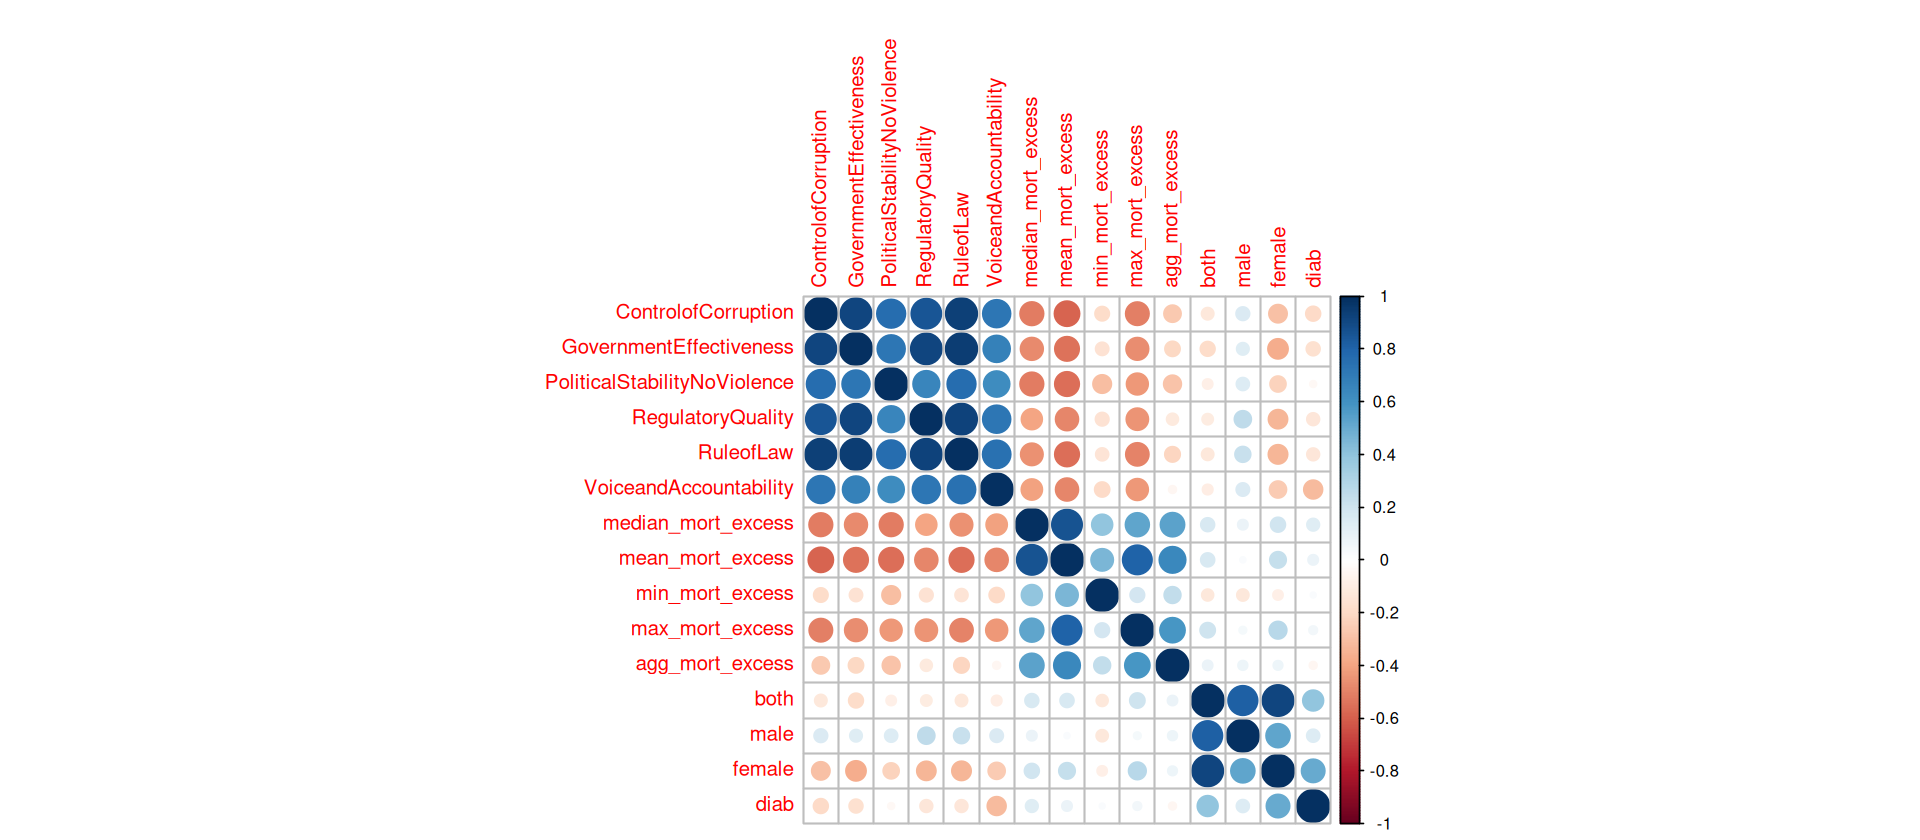

In [30]:
corrplot(cor(db5[,4:ncol(db5)]))

### Añadir datos de densidad poblacional y tamaño poblacional y PIB

In [31]:
page = read_html("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)")
# Obtain the piece of the web page that corresponds to the "wikitable" node
db_gdp = html_node(page, ".wikitable")
# Convert the html table element into a data frame
db_gdp = html_table(db_gdp, fill = TRUE)
db_gdp = db_gdp[-c(1,2),]
colnames(db_gdp) = c("country", "imf_gdp", "imf_year", "wb_gdp", "wb_year", "un_gdp", "un_year")
db_gdp$imf_gdp = as.numeric(scale(as.numeric(gsub(db_gdp$imf_gdp, pattern = ",", replacement = ""))))
db_gdp$wb_gdp = as.numeric(scale(as.numeric(gsub(db_gdp$wb_gdp, pattern = ",", replacement = ""))))
db_gdp$un_gdp = as.numeric(scale(as.numeric(gsub(db_gdp$un_gdp, pattern = ",", replacement = ""))))
db_gdp$imf_year = 2023
db_gdp$wb_year = 2022
db_gdp$un_year = 2021
db_gdp$year = db_gdp$un_year
db_gdp

Warning message in scale(as.numeric(gsub(db_gdp$imf_gdp, pattern = ",", replacement = ""))):
“NAs introduced by coercion”
Warning message in scale(as.numeric(gsub(db_gdp$wb_gdp, pattern = ",", replacement = ""))):
“NAs introduced by coercion”
Warning message in scale(as.numeric(gsub(db_gdp$un_gdp, pattern = ",", replacement = ""))):
“NAs introduced by coercion”


country                          imf_gdp       imf_year wb_gdp      
1   United States                    11.1333113473 2023     11.317044550
2   China                             6.9363094041 2023      7.283960419
3   Germany                           1.5439554562 2023      1.660372406
4   India                             1.3363344521 2023      1.278335072
5   Japan                             1.3361163296 2023      1.557866420
6   United Kingdom                    1.2068616117 2023      1.189846844
7   France                            0.9731474215 2023      1.059518672
8   Italy                             0.6796732431 2023      0.732335212
9   Canada                            0.6061540413 2023      0.683950360
10  Brazil                            0.5691614290 2023      0.698107667
11  Russia                            0.5507133257 2023      0.633921270
12  Spain                             0.4476504330 2023      0.448111464
13  South Korea                       0.4442300783 2023      0.503803898
14  Australia                         0.4372914742 2023      0.508455825
15  Mexico                            0.4078706168 2023      0.535885081
16  Turkey                            0.3128667186 2023      0.248832822
17  Indonesia                         0.3100143758 2023      0.359776276
18  Netherlands                       0.2513029390 2023      0.253092240
19  Saudi Arabia                      0.1812275420 2023      0.231783765
20  Poland                            0.1425949163 2023      0.123705078
21  Switzerland                       0.1303729827 2023      0.154781590
22  Taiwan                            0.0774295094 2023               NA
23  Belgium                           0.0327534753 2023      0.048233731
24  Argentina                         0.0322580468 2023      0.051764204
25  Sweden                            0.0087201698 2023      0.031812857
26  Ireland                           0.0007333865 2023      0.011728284
27  Israel                           -0.0050282492 2023     -0.003334197
28  Singapore                        -0.0119467532 2023     -0.006906830
29  United Arab Emirates             -0.0179678282 2023     -0.005749539
30  Thailand                         -0.0188514850 2023     -0.001208071
⋮   ⋮                                ⋮             ⋮        ⋮           
180 Greenland                                NA    2023     -0.2169443  
181 Cape Verde                       -0.2211315    2023     -0.2172179  
182 Gambia                           -0.2211370    2023     -0.2173220  
183 Saint Lucia                      -0.2211888    2023     -0.2172461  
184 Lesotho                          -0.2212737    2023     -0.2174460  
185 Eritrea                                  NA    2023             NA  
186 Antigua and Barbuda              -0.2212852    2023     -0.2174514  
187 Zanzibar                                 NA    2023             NA  
188 Guinea-Bissau                    -0.2213220    2023     -0.2174797  
189 Seychelles                       -0.2213503    2023     -0.2174059  
190 Timor-Leste                      -0.2213812    2023     -0.2173629  
191 San Marino                       -0.2214065    2023     -0.2175265  
192 Solomon Islands                  -0.2215331    2023     -0.2176209  
193 Sint Maarten                             NA    2023     -0.2176243  
194 Comoros                          -0.2215923    2023     -0.2177386  
195 Grenada                          -0.2216235    2023     -0.2177521  
196 Turks and Caicos Islands                 NA    2023     -0.2177175  
197 Vanuatu                          -0.2216969    2023     -0.2178338  
198 Saint Vincent and the Grenadines -0.2217062    2023     -0.2178591  
199 Samoa                            -0.2217367    2023     -0.2179148  
200 Saint Kitts and Nevis            -0.2217482    2023     -0.2178545  
201 São Tomé and Príncipe            -0.2218469    2023     -0.2180543  
202 Dominica                         -0.2218923    2023     -0

In [32]:
db6 = merge(db5, db_gdp[,c("country", "year", "un_gdp")], by = c("country", "year"))
summary(db6)

       country     year         code    ControlofCorruption
 Albania   : 1   2020: 0   ALB    : 1   Min.   :-1.3382    
 Argentina : 1   2021:76   ARG    : 1   1st Qu.:-0.4399    
 Armenia   : 1             ARM    : 1   Median : 0.1284    
 Australia : 1             AUS    : 1   Mean   : 0.4036    
 Austria   : 1             AUT    : 1   3rd Qu.: 1.3539    
 Azerbaijan: 1             AZE    : 1   Max.   : 2.3662    
 (Other)   :70             (Other):70                      
 GovernmentEffectiveness PoliticalStabilityNoViolence RegulatoryQuality
 Min.   :-1.2870         Min.   :-1.4935              Min.   :-1.4434  
 1st Qu.:-0.1999         1st Qu.:-0.2686              1st Qu.:-0.1350  
 Median : 0.4288         Median : 0.4507              Median : 0.4450  
 Mean   : 0.5047         Mean   : 0.2761              Mean   : 0.4901  
 3rd Qu.: 1.1384         3rd Qu.: 0.8580              3rd Qu.: 1.2265  
 Max.   : 2.2915         Max.   : 1.4932              Max.   : 2.2310  
                

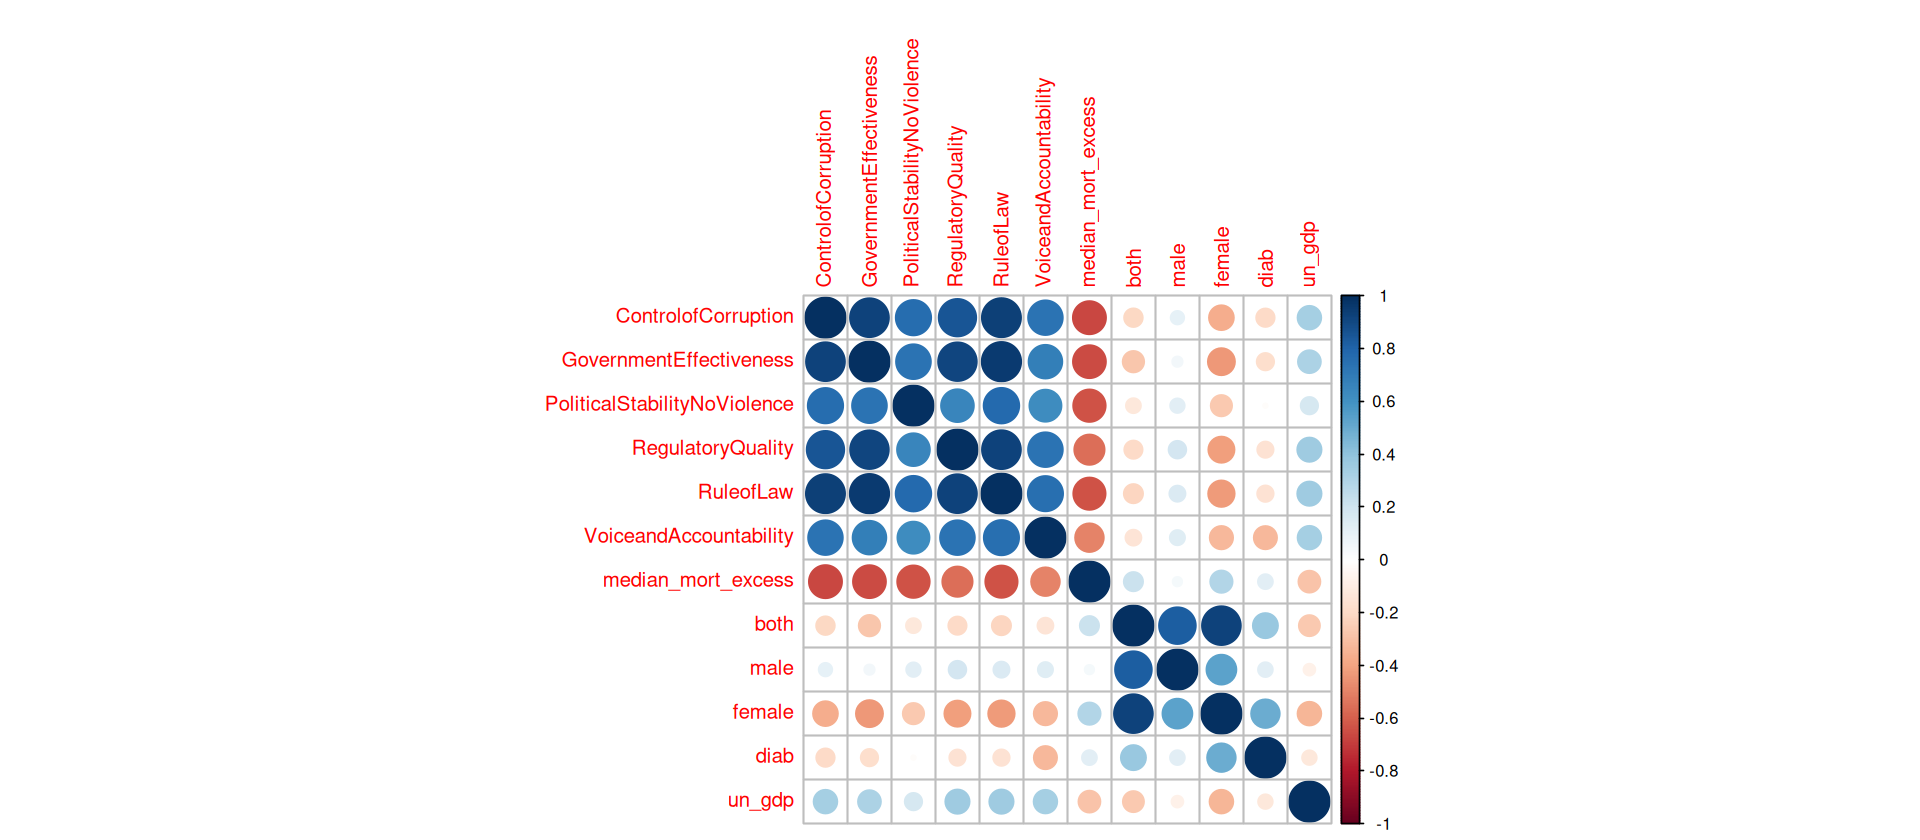

In [33]:
corrplot(cor(db6[,c(4:10,15:19)]))

In [34]:
mod_med_gov_bmi_diab_gdp = lm(data = db6[,c(4:10,16,18,19)], median_mort_excess~.)
summary(mod_med_gov_bmi_diab_gdp)
mod_adecuado1 = step(mod_med_gov_bmi_diab_gdp)
summary(mod_adecuado1)


Call:
lm(formula = median_mort_excess ~ ., data = db6[, c(4:10, 16, 
    18, 19)])

Residuals:
    Min      1Q  Median      3Q     Max 
-19.536  -5.690  -0.072   4.916  22.309 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   20.3593     1.4112  14.427   <2e-16 ***
ControlofCorruption           -3.5996     3.2094  -1.122   0.2661    
GovernmentEffectiveness       -7.7366     5.0247  -1.540   0.1284    
PoliticalStabilityNoViolence  -6.1595     2.6425  -2.331   0.0228 *  
RegulatoryQuality              2.5660     3.6967   0.694   0.4900    
RuleofLaw                      3.9220     5.1398   0.763   0.4481    
VoiceandAccountability        -0.2710     2.0254  -0.134   0.8940    
male                           0.8263     1.1725   0.705   0.4834    
diab                           0.2605     1.3879   0.188   0.8517    
un_gdp                        -3.8506     3.1685  -1.215   0.2286    
---
Signif. codes:  0 ‘***’ 0.001 ‘**

Start:  AIC=345.56
median_mort_excess ~ ControlofCorruption + GovernmentEffectiveness + 
    PoliticalStabilityNoViolence + RegulatoryQuality + RuleofLaw + 
    VoiceandAccountability + male + diab + un_gdp

                               Df Sum of Sq    RSS    AIC
- VoiceandAccountability        1      1.49 5512.3 343.58
- diab                          1      2.94 5513.8 343.60
- RegulatoryQuality             1     40.23 5551.0 344.12
- male                          1     41.47 5552.3 344.13
- RuleofLaw                     1     48.62 5559.4 344.23
- ControlofCorruption           1    105.03 5615.8 345.00
- un_gdp                        1    123.32 5634.1 345.25
<none>                                      5510.8 345.56
- GovernmentEffectiveness       1    197.95 5708.8 346.25
- PoliticalStabilityNoViolence  1    453.65 5964.5 349.58

Step:  AIC=343.58
median_mort_excess ~ ControlofCorruption + GovernmentEffectiveness + 
    PoliticalStabilityNoViolence + RegulatoryQuality + RuleofLaw 


Call:
lm(formula = median_mort_excess ~ GovernmentEffectiveness + PoliticalStabilityNoViolence, 
    data = db6[, c(4:10, 16, 18, 19)])

Residuals:
     Min       1Q   Median       3Q      Max 
-21.0030  -5.3486  -0.9533   4.5374  23.4891 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    20.665      1.214  17.025  < 2e-16 ***
GovernmentEffectiveness        -6.028      1.828  -3.298  0.00151 ** 
PoliticalStabilityNoViolence   -6.005      2.217  -2.709  0.00840 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.06 on 73 degrees of freedom
Multiple R-squared:  0.4848,	Adjusted R-squared:  0.4707 
F-statistic: 34.35 on 2 and 73 DF,  p-value: 3.06e-11


### Analizando y anexando datos de vacunación

In [35]:
library(tidyverse)
library(lubridate)

vac = read.csv("vaccination.csv", stringsAsFactors = T)
colnames(vac)[3] = "vac"
#summary(vac)
#str(vac)


vac_count_yr = vac %>%
    rename(country = Entity) %>%
    mutate(Day = as.Date(Day),
           mes = month(Day),
           year = year(Day)) %>%
    group_by(country, year) %>%
    summarize(vac_prom = mean(vac, na.rm =F),
              vac_med = median(vac, na.rm = T)) %>%
    filter(year %in% c(2020,2021)) #%>%
    #filter(country %in% c("Mexico", "France","Canada", "China"))
vac_count_yr$vac_prom = as.numeric(scale(vac_count_yr$vac_prom))
vac_count_yr$vac_med = as.numeric(scale(vac_count_yr$vac_med))

`summarise()` has grouped output by 'country'. You can override using the
`.groups` argument.


In [36]:
db7 = merge(db6, vac_count_yr, by = c("country", "year"))
dim(db7)
summary(db7)

[1] 76 21

       country     year         code    ControlofCorruption
 Albania   : 1   2020: 0   ALB    : 1   Min.   :-1.3382    
 Argentina : 1   2021:76   ARG    : 1   1st Qu.:-0.4399    
 Armenia   : 1             ARM    : 1   Median : 0.1284    
 Australia : 1             AUS    : 1   Mean   : 0.4036    
 Austria   : 1             AUT    : 1   3rd Qu.: 1.3539    
 Azerbaijan: 1             AZE    : 1   Max.   : 2.3662    
 (Other)   :70             (Other):70                      
 GovernmentEffectiveness PoliticalStabilityNoViolence RegulatoryQuality
 Min.   :-1.2870         Min.   :-1.4935              Min.   :-1.4434  
 1st Qu.:-0.1999         1st Qu.:-0.2686              1st Qu.:-0.1350  
 Median : 0.4288         Median : 0.4507              Median : 0.4450  
 Mean   : 0.5047         Mean   : 0.2761              Mean   : 0.4901  
 3rd Qu.: 1.1384         3rd Qu.: 0.8580              3rd Qu.: 1.2265  
 Max.   : 2.2915         Max.   : 1.4932              Max.   : 2.2310  
                

In [37]:
db7$country

[1] Albania     Argentina   Armenia     Australia   Austria     Azerbaijan 
 [7] Barbados    Belarus     Belgium     Belize      Bhutan      Bolivia    
[13] Brazil      Bulgaria    Canada      Chile       Colombia    Croatia    
[19] Cuba        Cyprus      Denmark     Ecuador     Estonia     Finland    
[25] France      Georgia     Germany     Greece      Guatemala   Hungary    
[31] Iceland     Ireland     Israel      Italy       Jamaica     Japan      
[37] Jordan      Kazakhstan  Kuwait      Latvia      Lebanon     Lithuania  
[43] Luxembourg  Malaysia    Maldives    Malta       Mauritius   Mexico     
[49] Moldova     Mongolia    Montenegro  Netherlands Nicaragua   Norway     
[55] Oman        Panama      Paraguay    Peru        Philippines Poland     
[61] Portugal    Qatar       Serbia      Seychelles  Singapore   Slovenia   
[67] Spain       Suriname    Sweden      Switzerland Tajikistan  Thailand   
[73] Tunisia     Ukraine     Uruguay     Uzbekistan 
214 Levels: Afghanistan Albania Algeria AmericanSamoa Andorra ... Zimbabwe

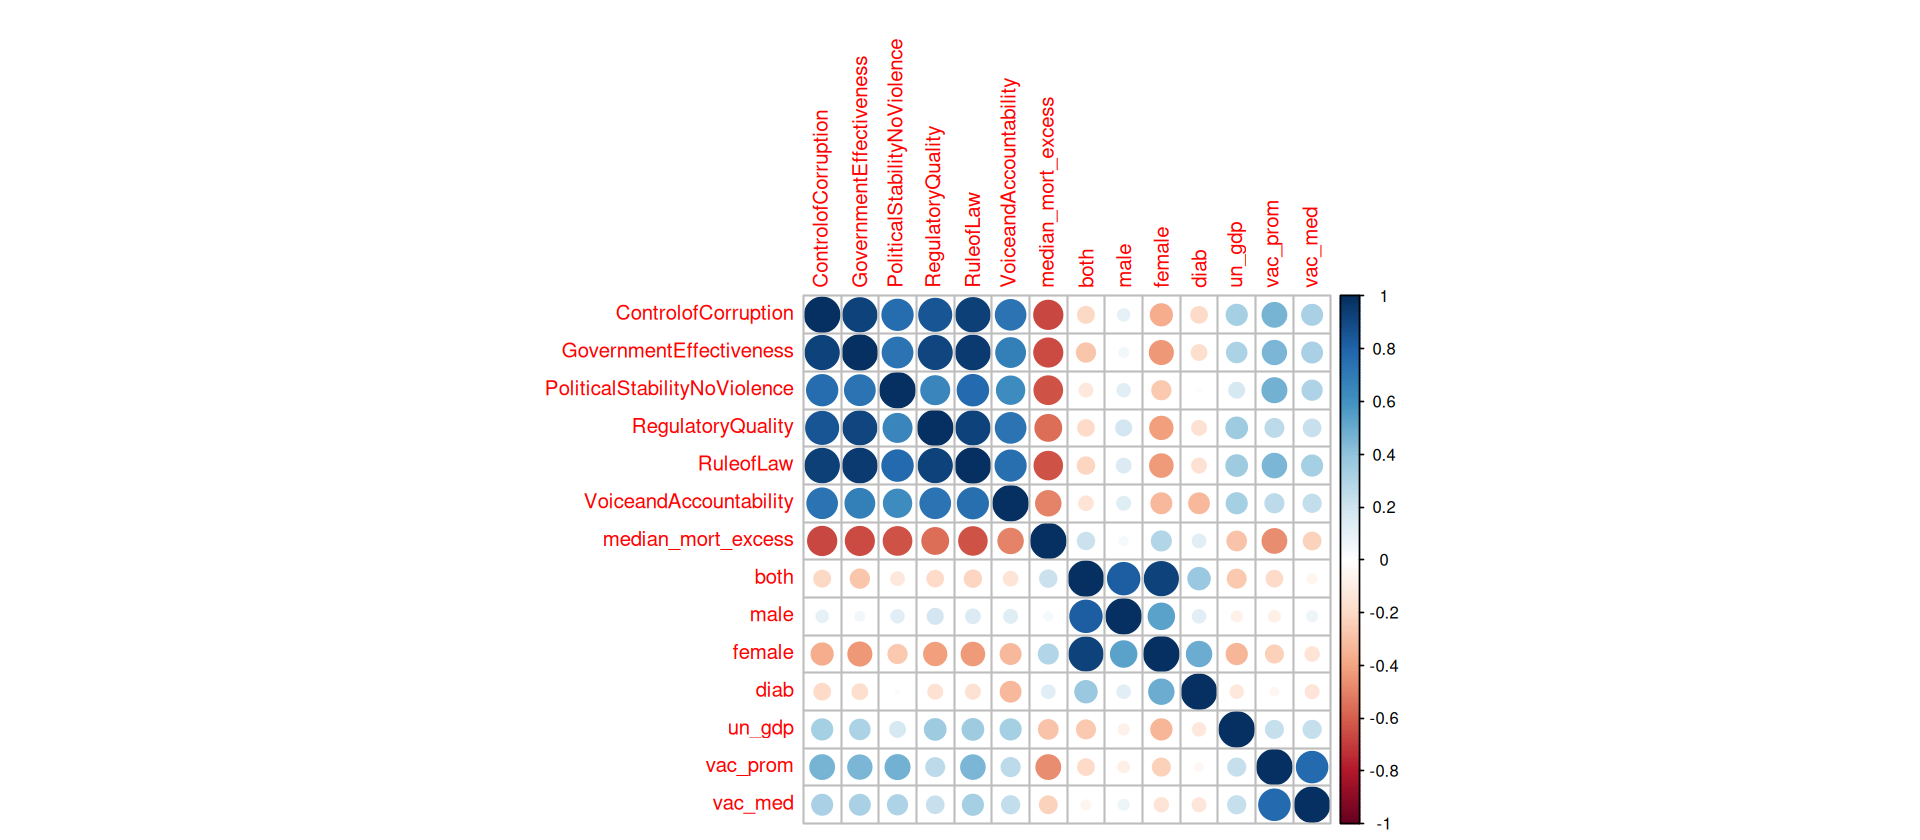

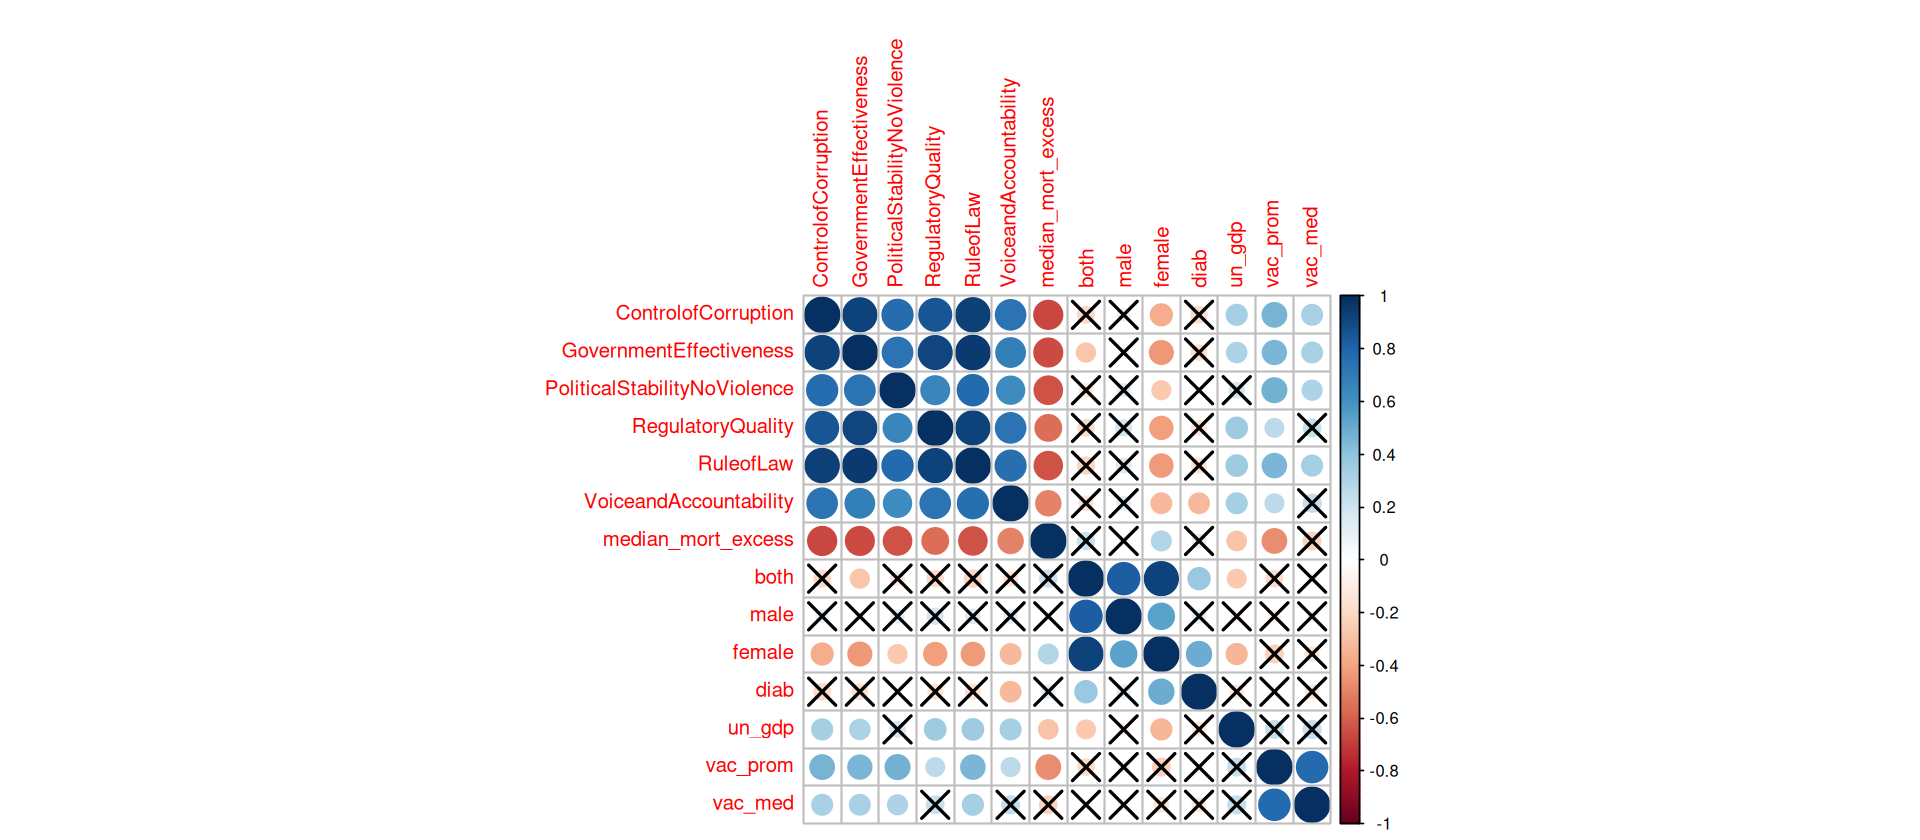

In [38]:
corrplot(cor(db7[,c(4:10,15:21)]))
p.mat = cor.mtest(db7[,c(4:10,15:21)])$p
corrplot(cor(db7[,c(4:10,15:21)]), p.mat = p.mat, sig.level = 0.025)

In [39]:
mod_med_gov_bmi_diab_gdp_vac = lm(data = db7[,c(4:10,16,18,19,20)], median_mort_excess~.)
summary(mod_med_gov_bmi_diab_gdp_vac)
mod_adecuado2 = step(mod_med_gov_bmi_diab_gdp_vac)
summary(mod_adecuado2)


Call:
lm(formula = median_mort_excess ~ ., data = db7[, c(4:10, 16, 
    18, 19, 20)])

Residuals:
     Min       1Q   Median       3Q      Max 
-20.8118  -5.9876  -0.6433   5.4103  21.4749 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   21.6635     1.8215  11.893   <2e-16 ***
ControlofCorruption           -3.4981     3.2040  -1.092   0.2790    
GovernmentEffectiveness       -6.7660     5.0874  -1.330   0.1882    
PoliticalStabilityNoViolence  -5.7926     2.6570  -2.180   0.0329 *  
RegulatoryQuality              0.4170     4.1513   0.100   0.9203    
RuleofLaw                      5.4604     5.3071   1.029   0.3073    
VoiceandAccountability        -0.4337     2.0263  -0.214   0.8312    
male                           0.7520     1.1719   0.642   0.5234    
diab                           0.2920     1.3853   0.211   0.8337    
un_gdp                        -3.1982     3.2143  -0.995   0.3234    
vac_prom               

Start:  AIC=346.09
median_mort_excess ~ ControlofCorruption + GovernmentEffectiveness + 
    PoliticalStabilityNoViolence + RegulatoryQuality + RuleofLaw + 
    VoiceandAccountability + male + diab + un_gdp + vac_prom

                               Df Sum of Sq    RSS    AIC
- RegulatoryQuality             1      0.84 5405.7 344.10
- diab                          1      3.70 5408.5 344.14
- VoiceandAccountability        1      3.81 5408.7 344.14
- male                          1     34.23 5439.1 344.57
- un_gdp                        1     82.32 5487.2 345.24
- RuleofLaw                     1     88.02 5492.9 345.32
- ControlofCorruption           1     99.11 5504.0 345.47
- vac_prom                      1    105.97 5510.8 345.56
<none>                                      5404.8 346.09
- GovernmentEffectiveness       1    147.08 5551.9 346.13
- PoliticalStabilityNoViolence  1    395.21 5800.1 349.45

Step:  AIC=344.1
median_mort_excess ~ ControlofCorruption + GovernmentEffectiveness 


Call:
lm(formula = median_mort_excess ~ GovernmentEffectiveness + PoliticalStabilityNoViolence + 
    vac_prom, data = db7[, c(4:10, 16, 18, 19, 20)])

Residuals:
    Min      1Q  Median      3Q     Max 
-21.563  -5.186  -1.200   4.770  23.773 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    21.940      1.413  15.532  < 2e-16 ***
GovernmentEffectiveness        -5.510      1.830  -3.011  0.00359 ** 
PoliticalStabilityNoViolence   -5.080      2.255  -2.253  0.02731 *  
vac_prom                       -3.479      2.042  -1.704  0.09269 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.944 on 72 degrees of freedom
Multiple R-squared:  0.5048,	Adjusted R-squared:  0.4842 
F-statistic: 24.47 on 3 and 72 DF,  p-value: 5.058e-11


La efectividad del gobierno